In [20]:
import pandas as pd
import numpy as np
import pickle
from PyALE import ale #!pip install PyALE --user
import warnings
import sklearn
import matplotlib.pyplot as plt
from itertools import combinations

In [21]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [22]:
# 경고 메시지를 무시하려면 filterwarnings를 사용합니다.
warnings.filterwarnings('ignore')

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [24]:
print("numpy version:", np.__version__)  # 버전을 맞춰줘야 합니다 1.24.3
print("scikit-learn version:", sklearn.__version__) # 버전을 맞춰줘야 합니다 1.2.2
#!pip install numpy==1.24.3 --user

numpy version: 1.24.3
scikit-learn version: 1.2.2


예술의 전당 PyALE

In [25]:
filename = '../model/gbm_fin_model_sac.sav'
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

GradientBoostingRegressor(learning_rate=0.14, loss='huber', n_estimators=300,
                          random_state=40)


In [26]:
dataset = pd.read_csv('../preprocessed_data/예술의 전당/모델학습및테스트데이터_최종.csv')
dataset

Unnamed: 0  소요시간  관람연령  아동공연 여부  축제 여부  내한공연 여부  공연시작년도  공연시작월  공연시작일  \
0             0    90     4        0      0        0    2022      6     18   
1             1   100     4        0      0        0    2019      8     30   
2             2   100     4        0      0        0    2021      7     28   
3             3   100     4        0      0        0    2022      7     24   
4             4   110     4        0      0        0    2019      7     21   
..          ...   ...   ...      ...    ...      ...     ...    ...    ...   
985         985    90     4        0      0        0    2022      5     21   
986         986    90     4        0      0        0    2020      2     21   
987         987    90     4        0      0        0    2022      4     27   
988         988    90     4        0      0        0    2021      1      2   
989         989    90     4        0      0        0    2020      6      2   

     공연시작시분  공휴일여부  좌석등급개수   평균티켓가격  코로나표준점수  검색량  출연횟수  dayofweek_fri  \
0      1200      0       1  20000.0     0.00    0    16            0.0   
1      1200      0       1  10000.0     0.00    0    11            1.0   
2      1170      0       1  20000.0     4.00    0     3            0.0   
3       840      0       1  20000.0     0.00    0    10            0.0   
4      1200      0       1  20000.0     0.00  640    60            0.0   
..      ...    ...     ...      ...      ...  ...   ...            ...   
985    1200      0       2  45000.0     0.00    0    16            0.0   
986    1170      0       1  30000.0     0.00    0    10            1.0   
987    1170      0       1  20000.0     0.00    0    13            0.0   
988     840      0       1  20000.0     1.75    0     6            0.0   
989    1170      0       1  20000.0     1.00    0     1            0.0   

     dayofweek_sat  dayofweek_sun  dayofweek_thu  dayofweek_tue  \
0              1.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              0.0            0.0            0.0            0.0   
3              0.0            1.0            0.0            0.0   
4              0.0            1.0            0.0            0.0   
..             ...            ...            ...            ...   
985            1.0            0.0            0.0            0.0   
986            0.0            0.0            0.0            0.0   
987            0.0            0.0            0.0            0.0   
988            1.0            0.0            0.0            0.0   
989            0.0            0.0            0.0            1.0   

     dayofweek_wed  대중음악_기타  복합_다원/융복합  서양음악(클래식)_기악  서양음악(클래식)_성악  \
0              0.0      0.0        0.0           1.0           0.0   
1              0.0      0.0        0.0           1.0           0.0   
2              1.0      0.0        0.0           1.0           0.0   
3              0.0      0.0        0.0           1.0           0.0   
4              0.0      0.0        0.0           1.0           0.0   
..             ...      ...        ...           ...           ...   
985            0.0      0.0        0.0           1.0           0.0   
986            0.0      0.0        0.0           1.0           0.0   
987            1.0      0.0        0.0           0.0           1.0   
988            0.0      0.0        0.0           1.0           0.0   
989            0.0      0.0        0.0           1.0           0.0   

     한국음악(국악)_기악  1979SeoulENT.  21세기악회  AYAF앙상블  AnimaChamber  CLASSYLOUNGE  \
0            0.0              0       0        0             0             0   
1            0.0              0       0        0             0             0   
2            0.0              0       0        0             0             0   
3            0.0              0       0        0             0             0   
4            0.0              0       0        0             0             0   
..           ...            ...     ...      ...     

In [27]:
data = dataset.iloc[:,:-1]
data = data.iloc[ : , 1: ]
data

소요시간  관람연령  아동공연 여부  축제 여부  내한공연 여부  공연시작년도  공연시작월  공연시작일  공연시작시분  공휴일여부  \
0      90     4        0      0        0    2022      6     18    1200      0   
1     100     4        0      0        0    2019      8     30    1200      0   
2     100     4        0      0        0    2021      7     28    1170      0   
3     100     4        0      0        0    2022      7     24     840      0   
4     110     4        0      0        0    2019      7     21    1200      0   
..    ...   ...      ...    ...      ...     ...    ...    ...     ...    ...   
985    90     4        0      0        0    2022      5     21    1200      0   
986    90     4        0      0        0    2020      2     21    1170      0   
987    90     4        0      0        0    2022      4     27    1170      0   
988    90     4        0      0        0    2021      1      2     840      0   
989    90     4        0      0        0    2020      6      2    1170      0   

     좌석등급개수   평균티켓가격  코로나표준점수  검색량  출연횟수  dayofweek_fri  dayofweek_sat  \
0         1  20000.0     0.00    0    16            0.0            1.0   
1         1  10000.0     0.00    0    11            1.0            0.0   
2         1  20000.0     4.00    0     3            0.0            0.0   
3         1  20000.0     0.00    0    10            0.0            0.0   
4         1  20000.0     0.00  640    60            0.0            0.0   
..      ...      ...      ...  ...   ...            ...            ...   
985       2  45000.0     0.00    0    16            0.0            1.0   
986       1  30000.0     0.00    0    10            1.0            0.0   
987       1  20000.0     0.00    0    13            0.0            0.0   
988       1  20000.0     1.75    0     6            0.0            1.0   
989       1  20000.0     1.00    0     1            0.0            0.0   

     dayofweek_sun  dayofweek_thu  dayofweek_tue  dayofweek_wed  대중음악_기타  \
0              0.0            0.0            0.0            0.0      0.0   
1              0.0            0.0            0.0            0.0      0.0   
2              0.0            0.0            0.0            1.0      0.0   
3              1.0            0.0            0.0            0.0      0.0   
4              1.0            0.0            0.0            0.0      0.0   
..             ...            ...            ...            ...      ...   
985            0.0            0.0            0.0            0.0      0.0   
986            0.0            0.0            0.0            0.0      0.0   
987            0.0            0.0            0.0            1.0      0.0   
988            0.0            0.0            0.0            0.0      0.0   
989            0.0            0.0            1.0            0.0      0.0   

     복합_다원/융복합  서양음악(클래식)_기악  서양음악(클래식)_성악  한국음악(국악)_기악  1979SeoulENT.  \
0          0.0           1.0           0.0          0.0              0   
1          0.0           1.0           0.0          0.0              0   
2          0.0           1.0           0.0          0.0              0   
3          0.0           1.0           0.0          0.0              0   
4          0.0           1.0           0.0          0.0              0   
..         ...           ...           ...          ...            ...   
985        0.0           1.0           0.0          0.0              0   
986        0.0           1.0           0.0          0.0              0   
987        0.0           0.0           1.0          0.0              0   
988        0.0           1.0           0.0          0.0              0   
989        0.0           1.0           0.0          0.0              0   

     21세기악회  AYAF앙상블  AnimaChamber  CLASSYLOUNGE  J&R예술기획  JJ예술기획  JWEnt.  \
0         0        0             0             0        0       0       0   
1         0        0             0             0        0       0       0   
2         0        0             0             0        0       0       0   
3         0        0             

In [28]:
column_list = data.columns.tolist()
column_list[:15]

['소요시간',
 '관람연령',
 '아동공연 여부',
 '축제 여부',
 '내한공연 여부',
 '공연시작년도',
 '공연시작월',
 '공연시작일',
 '공연시작시분',
 '공휴일여부',
 '좌석등급개수',
 '평균티켓가격',
 '코로나표준점수',
 '검색량',
 '출연횟수']

PyALE._ALE_generic:INFO: Continuous feature detected.


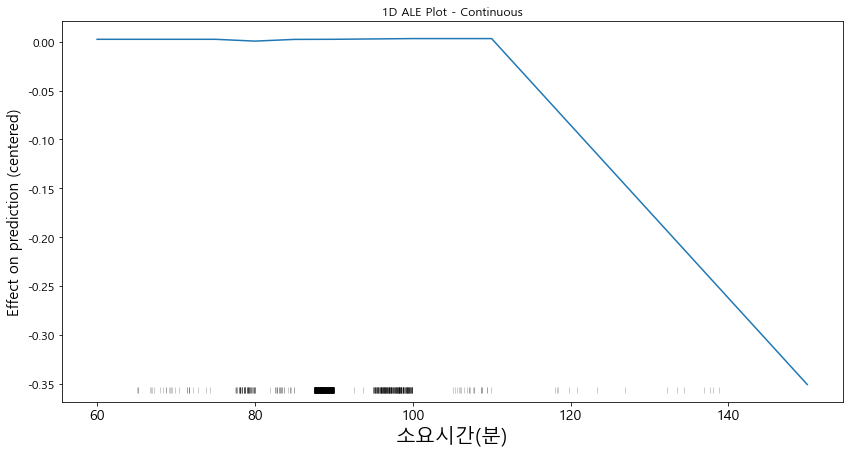

PyALE._ALE_generic:INFO: Discrete feature detected.


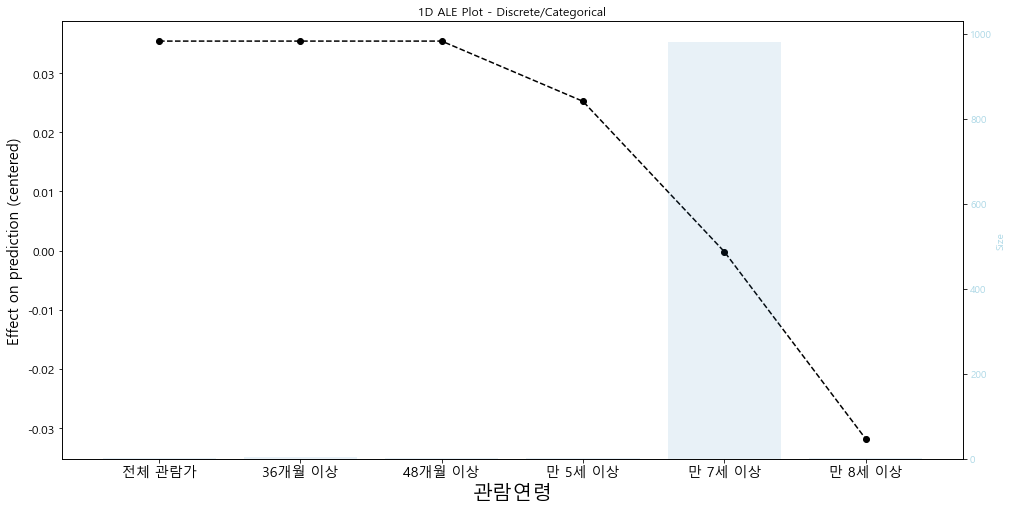

PyALE._ALE_generic:INFO: Discrete feature detected.


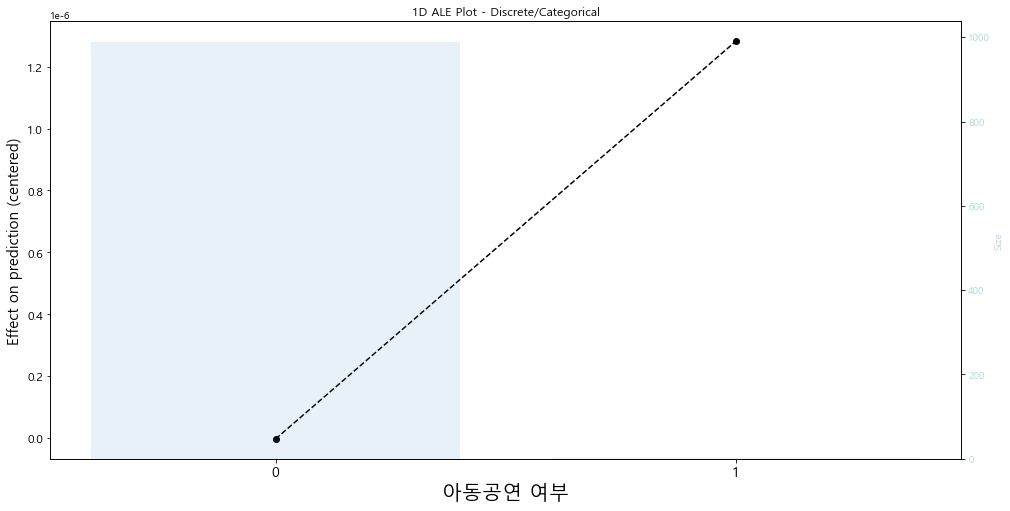

PyALE._ALE_generic:INFO: Discrete feature detected.


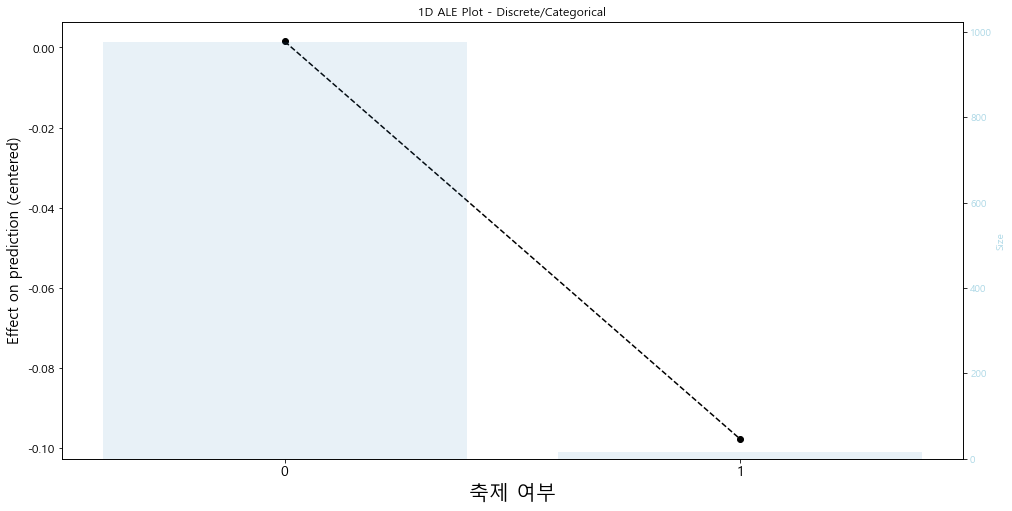

PyALE._ALE_generic:INFO: Discrete feature detected.


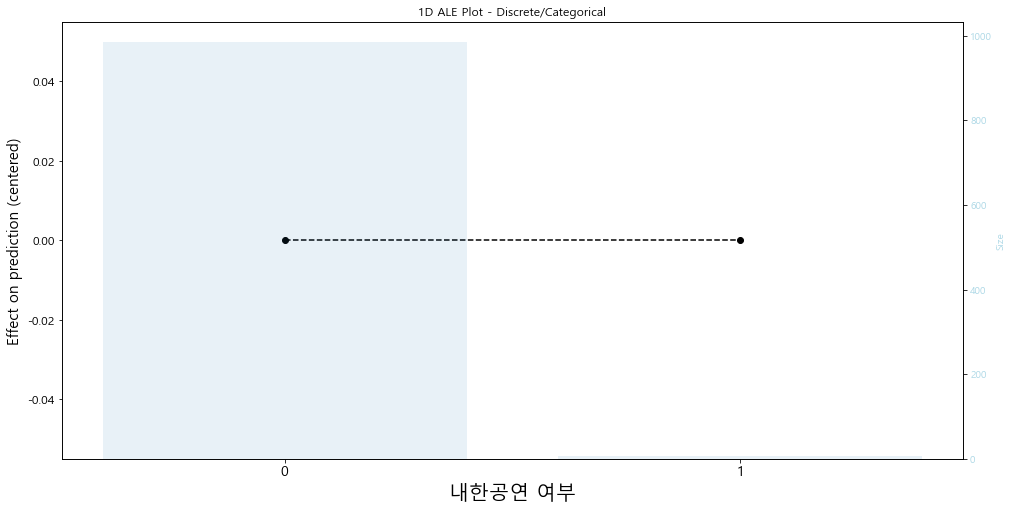

PyALE._ALE_generic:INFO: Discrete feature detected.


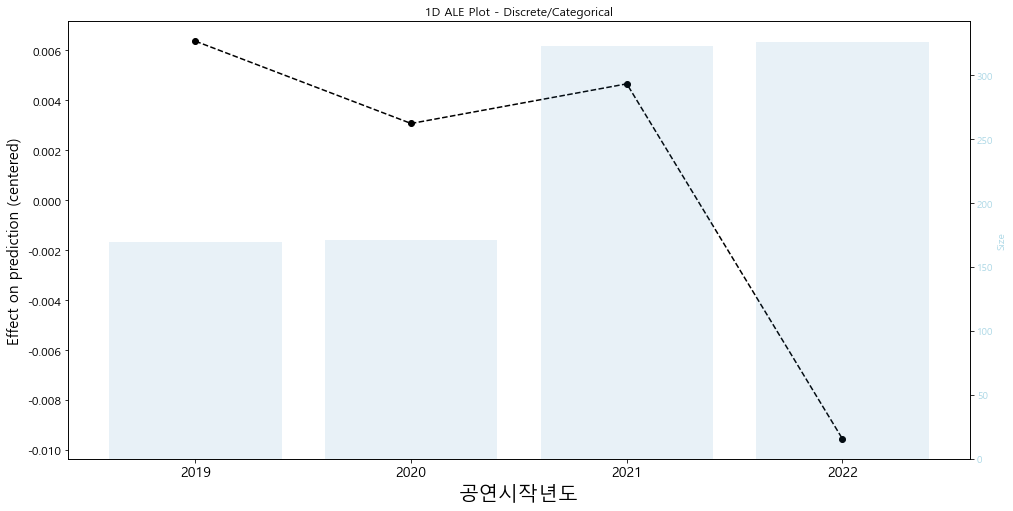

PyALE._ALE_generic:INFO: Continuous feature detected.


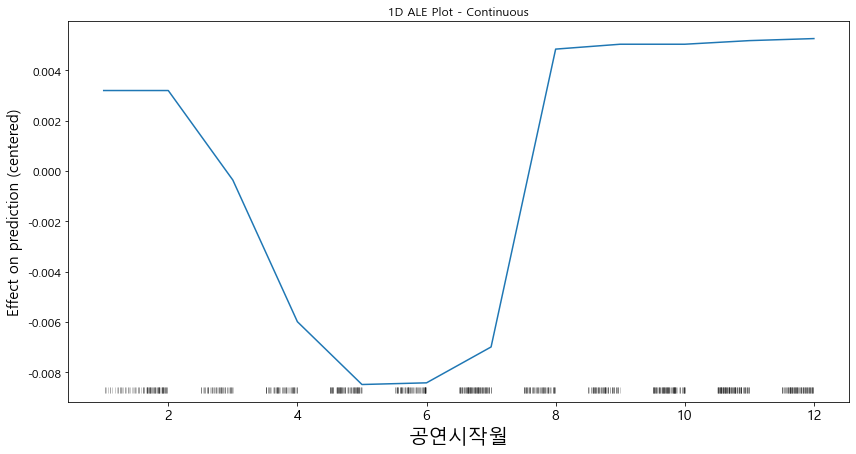

PyALE._ALE_generic:INFO: Continuous feature detected.


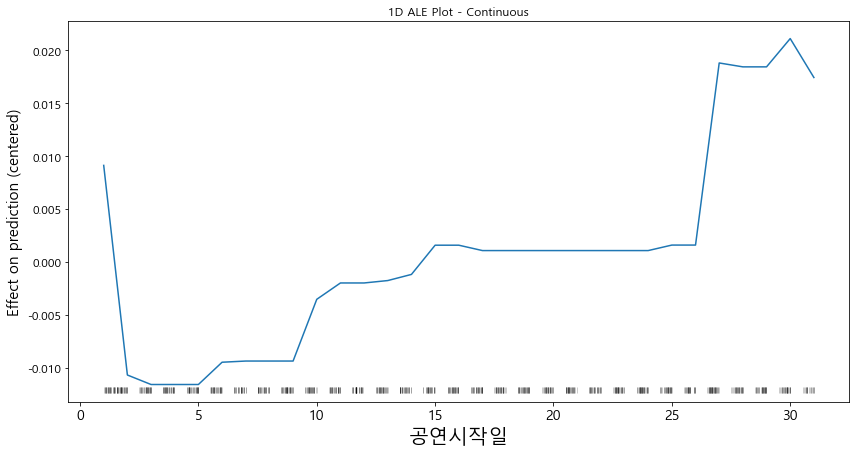

PyALE._ALE_generic:INFO: Discrete feature detected.


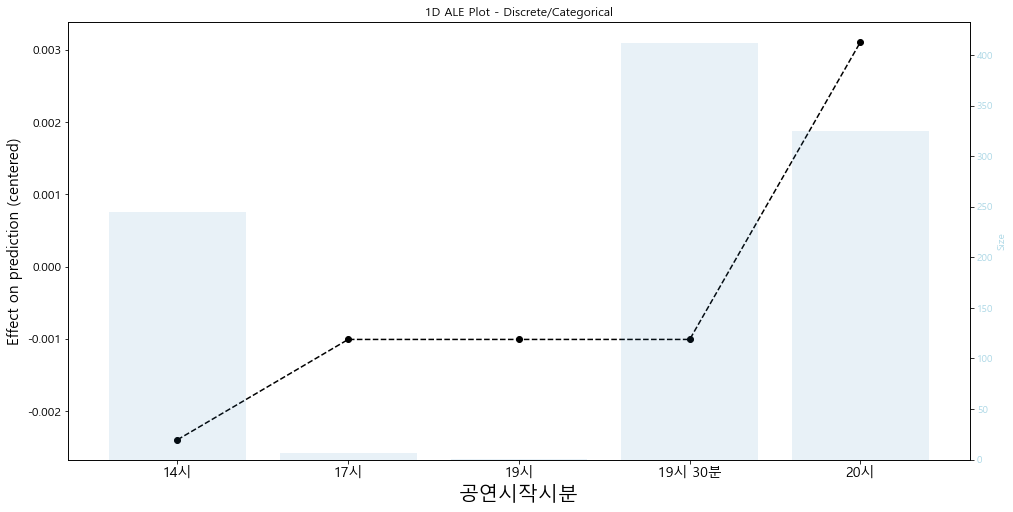

PyALE._ALE_generic:INFO: Discrete feature detected.


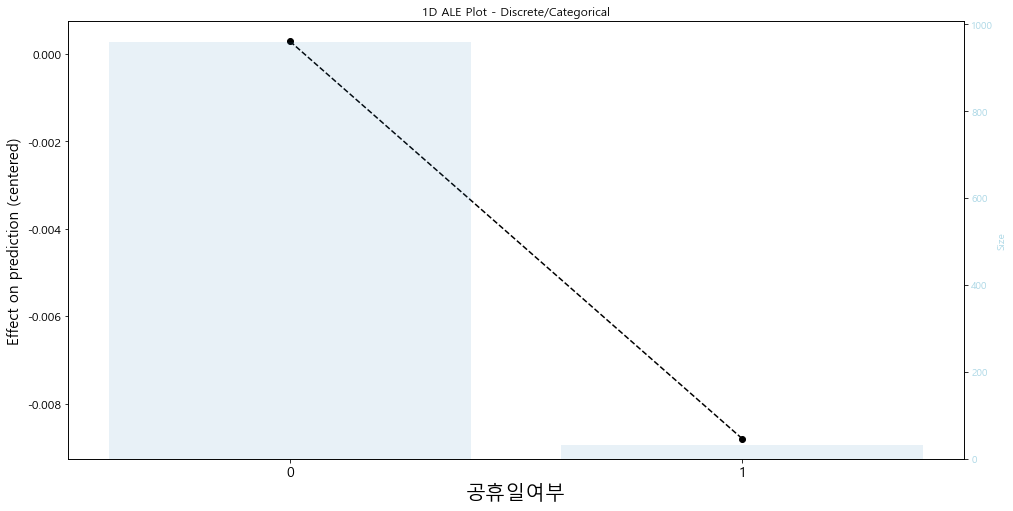

PyALE._ALE_generic:INFO: Discrete feature detected.


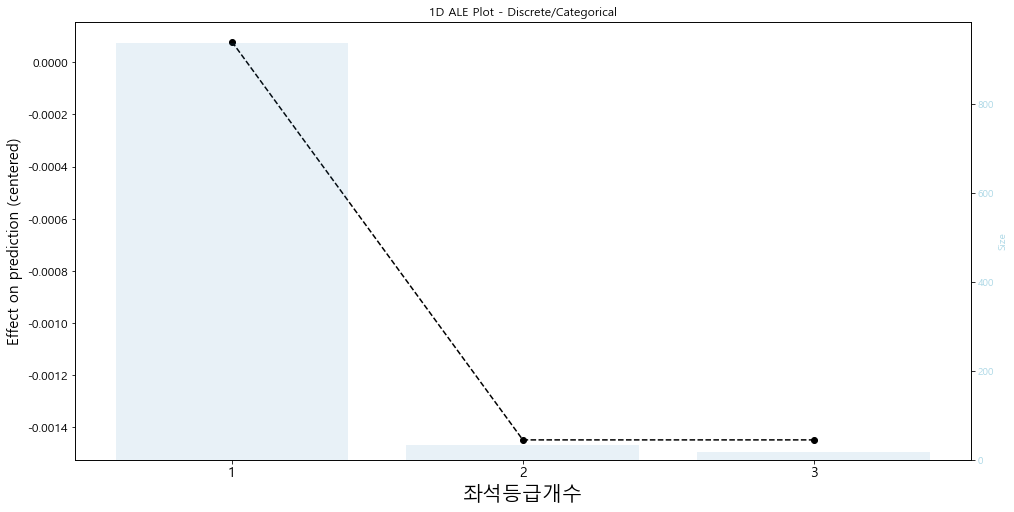

PyALE._ALE_generic:INFO: Continuous feature detected.


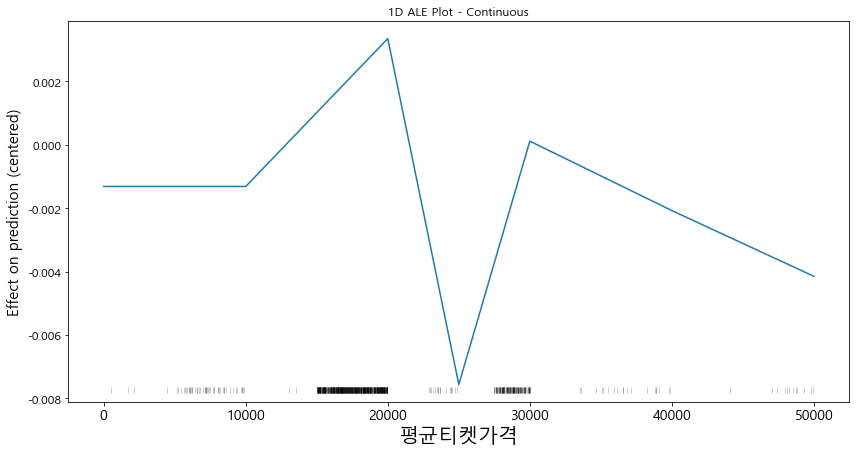

PyALE._ALE_generic:INFO: Discrete feature detected.


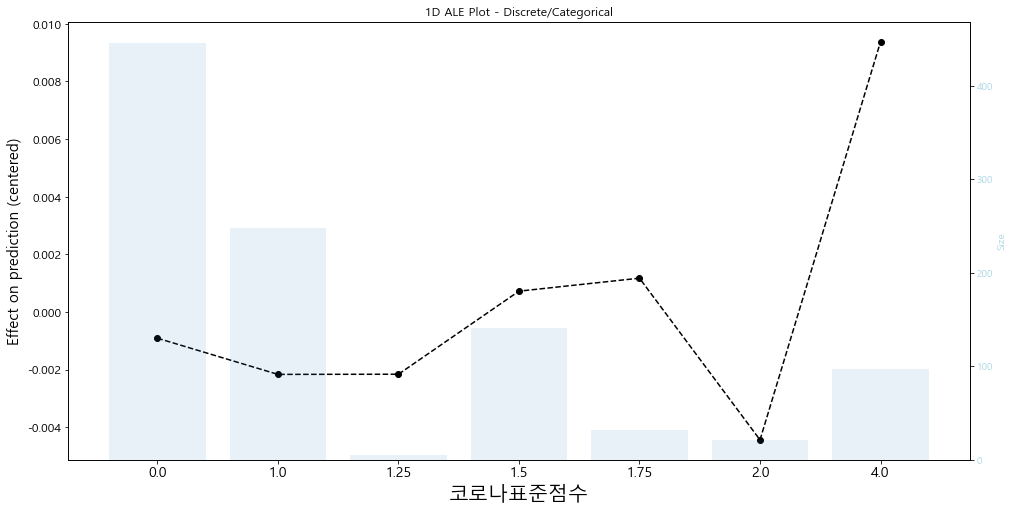

PyALE._ALE_generic:INFO: Continuous feature detected.


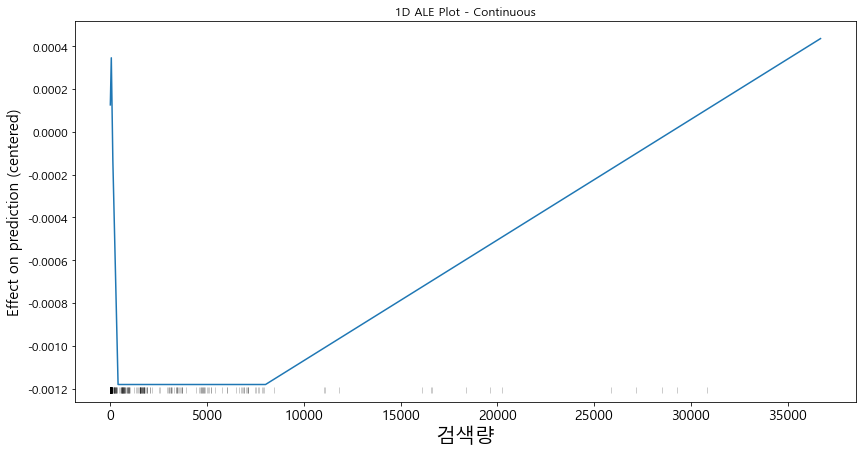

PyALE._ALE_generic:INFO: Continuous feature detected.


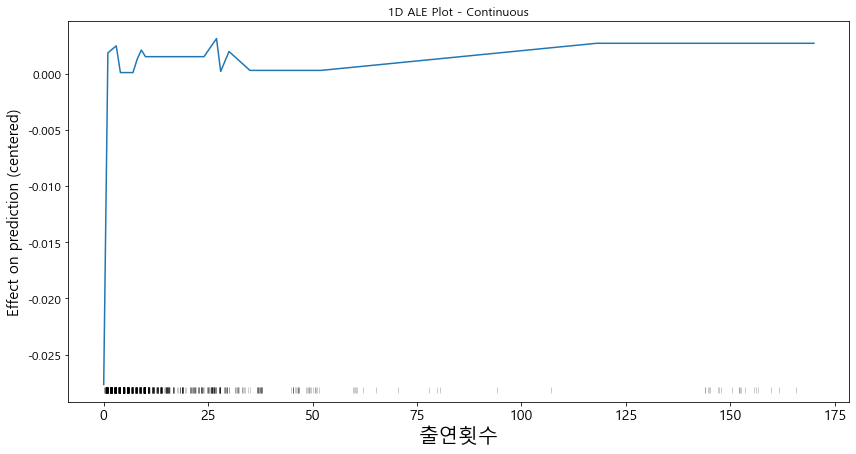

In [29]:
label_mapping = {'전체 관람가':0, '36개월 이상':1, '48개월 이상':2, '만 5세 이상':3, '만 7세 이상':4, '만 8세 이상':5}
reverse_mapping = {v: k for k, v in label_mapping.items()}

column_list = data.columns.tolist()

for col in column_list[:15]:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    ale_eff = ale(
        X=data,
        model=loaded_model,
        feature=[col],
        grid_size=50,
        include_CI=False,
        plot=True,
        fig=fig,
        ax=ax
    )
    
    if col == '관람연령':
        ax.set_xticks(list(reverse_mapping.keys()))
        ax.set_xticklabels(list(reverse_mapping.values()), fontsize=12)
        
    elif col == '공연시작시분':
        # 현재 데이터에서 '공연시작시분'의 고유한 값을 얻기 위해 사용
        unique_vals = np.sort(data['공연시작시분'].unique())
        hours = unique_vals // 60
        minutes = unique_vals % 60
        time_labels = [f"{h}시 {m}분" if m != 0 else f"{h}시" for h, m in zip(hours, minutes)]

        ax.set_xticklabels(time_labels, fontsize=12)

    ax.set_xlabel(col, fontsize=20)
    ax.yaxis.label.set_size(15)
    
    if col == '소요시간':
        ax.set_xlabel('소요시간(분)', fontsize=20)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)

    plt.show()

    # 각 그림마다 고유한 이름으로 저장
    fig.savefig(f'../plots/예술의 전당/ale_plot_1D_{col}.jpg', dpi=300, format='jpg', bbox_inches='tight')

In [30]:
lst=column_list[:15]
for combo in combinations(lst, 2):
    print(combo)

('소요시간', '관람연령')
('소요시간', '아동공연 여부')
('소요시간', '축제 여부')
('소요시간', '내한공연 여부')
('소요시간', '공연시작년도')
('소요시간', '공연시작월')
('소요시간', '공연시작일')
('소요시간', '공연시작시분')
('소요시간', '공휴일여부')
('소요시간', '좌석등급개수')
('소요시간', '평균티켓가격')
('소요시간', '코로나표준점수')
('소요시간', '검색량')
('소요시간', '출연횟수')
('관람연령', '아동공연 여부')
('관람연령', '축제 여부')
('관람연령', '내한공연 여부')
('관람연령', '공연시작년도')
('관람연령', '공연시작월')
('관람연령', '공연시작일')
('관람연령', '공연시작시분')
('관람연령', '공휴일여부')
('관람연령', '좌석등급개수')
('관람연령', '평균티켓가격')
('관람연령', '코로나표준점수')
('관람연령', '검색량')
('관람연령', '출연횟수')
('아동공연 여부', '축제 여부')
('아동공연 여부', '내한공연 여부')
('아동공연 여부', '공연시작년도')
('아동공연 여부', '공연시작월')
('아동공연 여부', '공연시작일')
('아동공연 여부', '공연시작시분')
('아동공연 여부', '공휴일여부')
('아동공연 여부', '좌석등급개수')
('아동공연 여부', '평균티켓가격')
('아동공연 여부', '코로나표준점수')
('아동공연 여부', '검색량')
('아동공연 여부', '출연횟수')
('축제 여부', '내한공연 여부')
('축제 여부', '공연시작년도')
('축제 여부', '공연시작월')
('축제 여부', '공연시작일')
('축제 여부', '공연시작시분')
('축제 여부', '공휴일여부')
('축제 여부', '좌석등급개수')
('축제 여부', '평균티켓가격')
('축제 여부', '코로나표준점수')
('축제 여부', '검색량')
('축제 여부', '출연횟수')
('내한공연 여부', '공연시작년도')
('내한공연 여

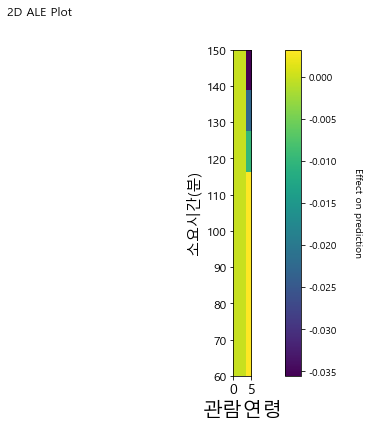

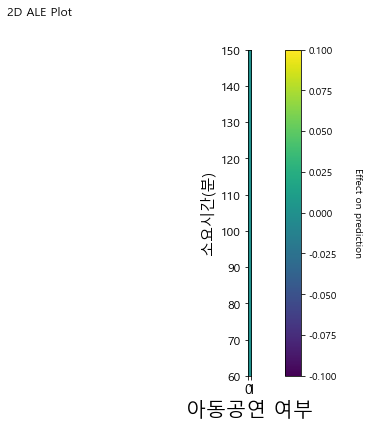

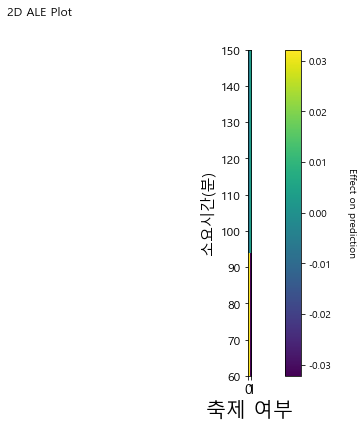

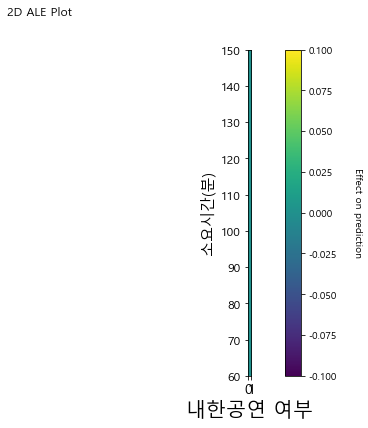

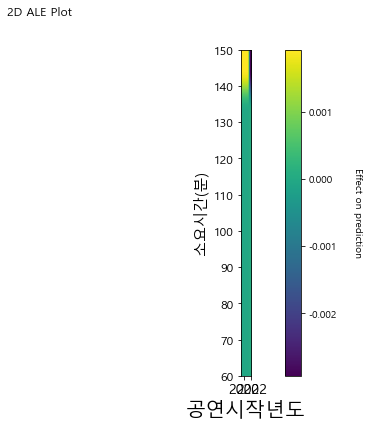

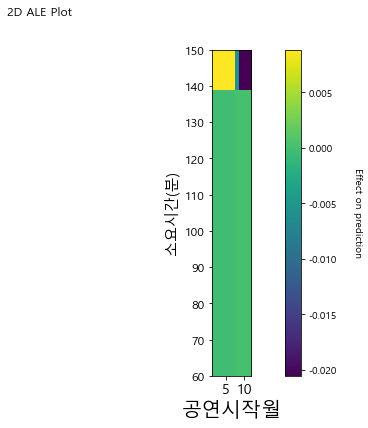

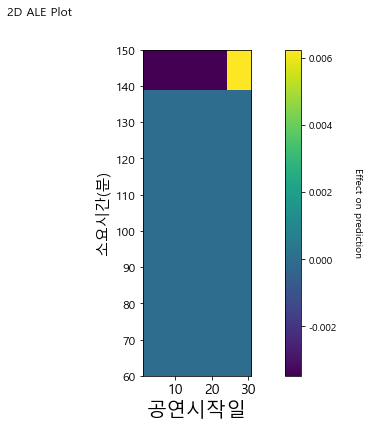

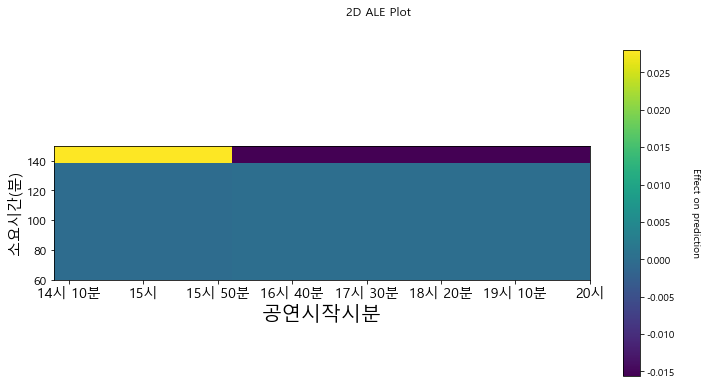

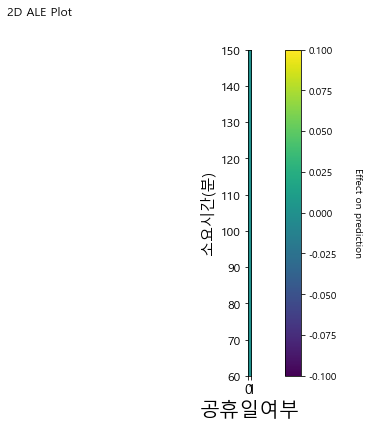

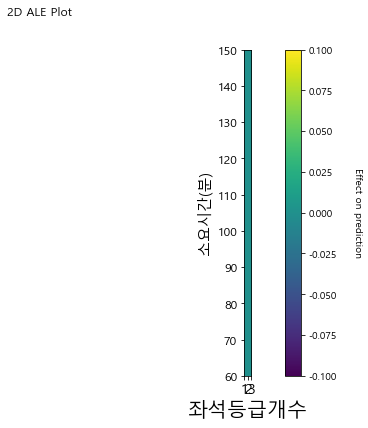

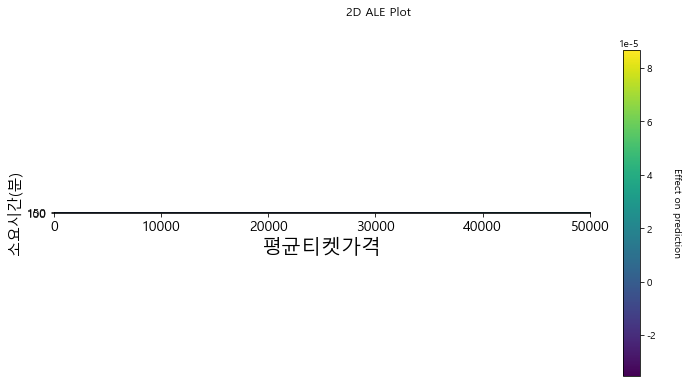

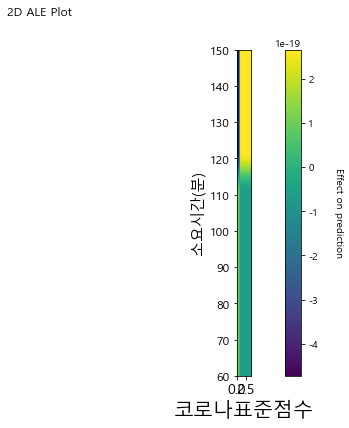

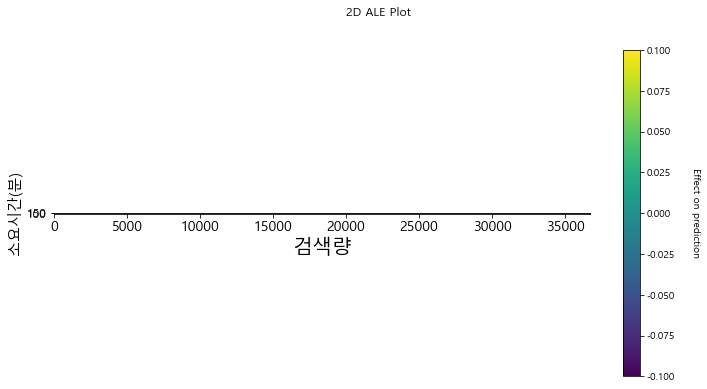

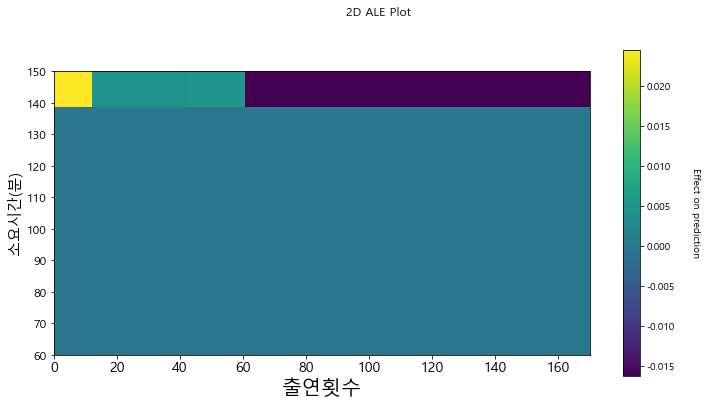

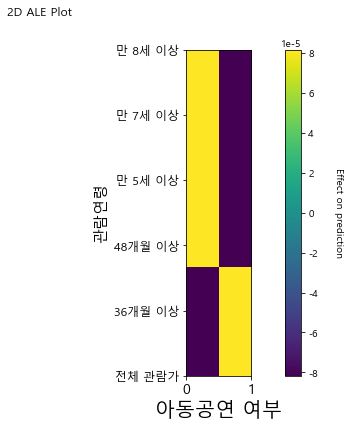

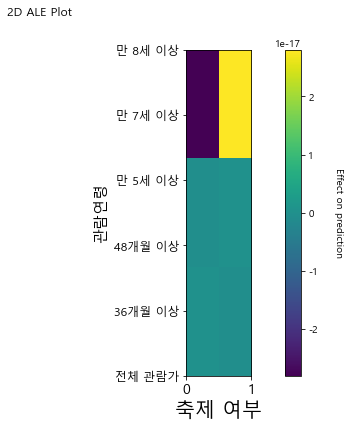

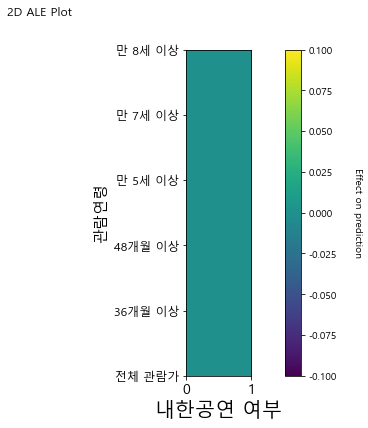

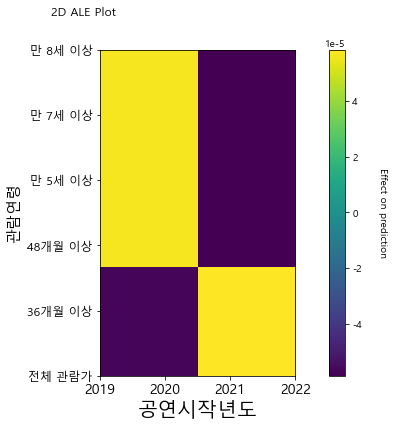

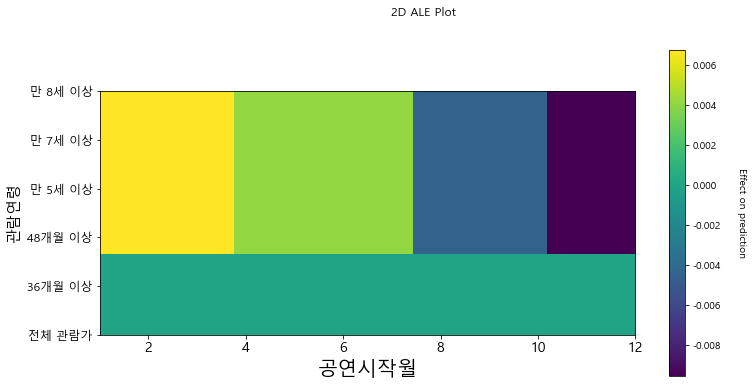

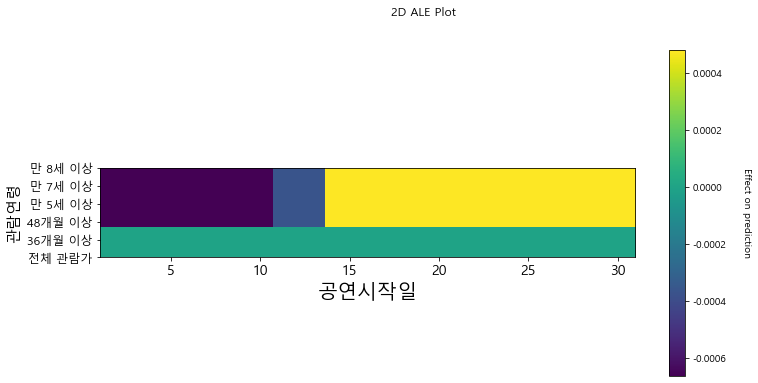

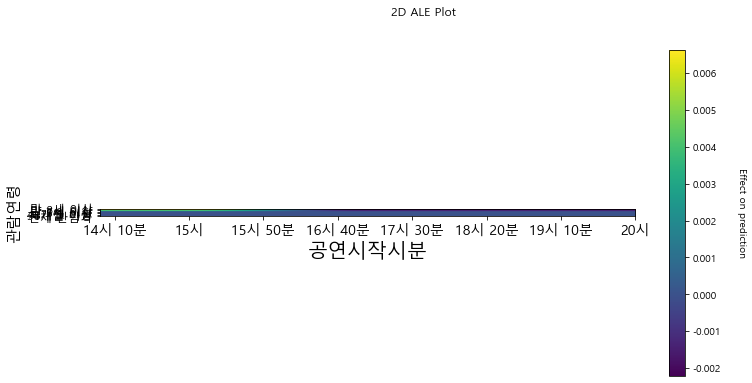

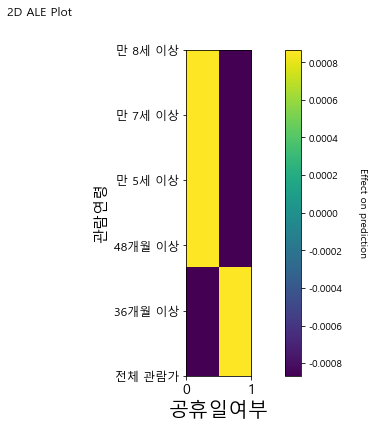

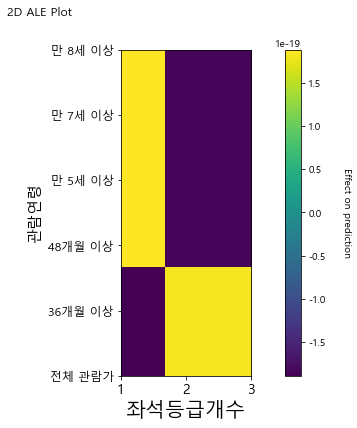

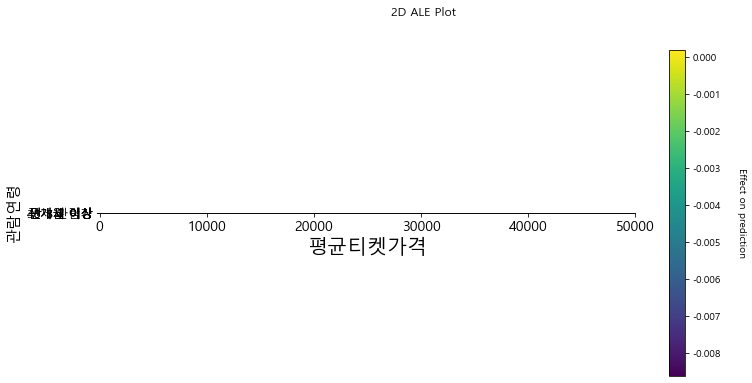

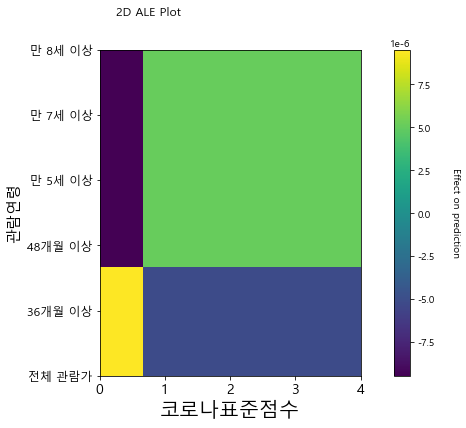

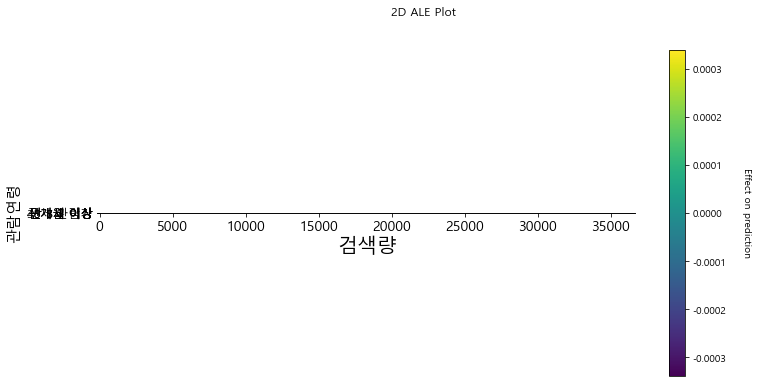

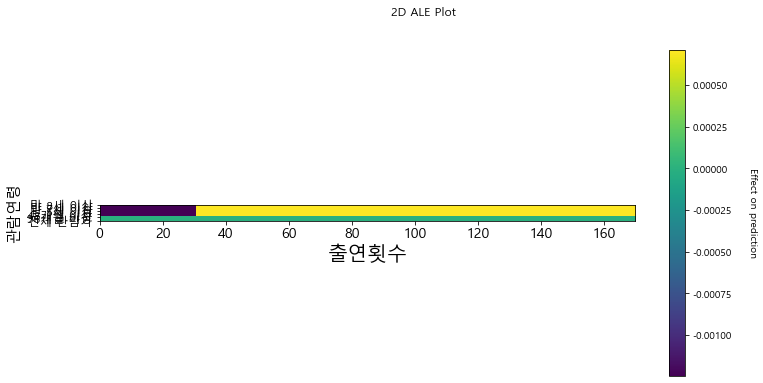

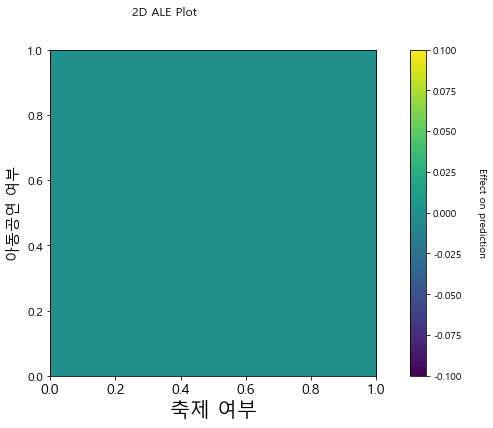

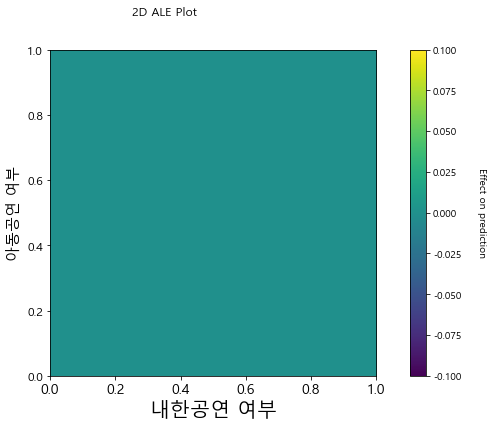

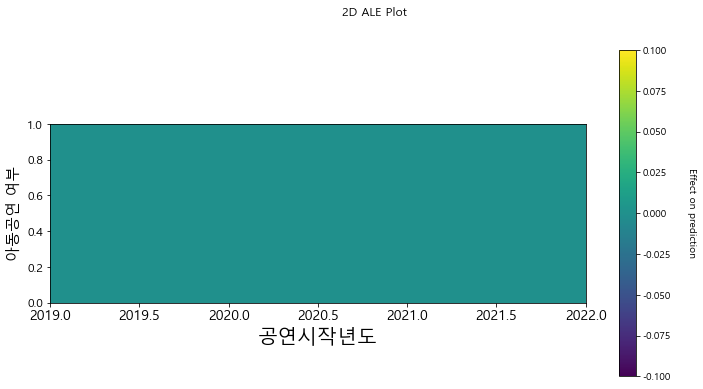

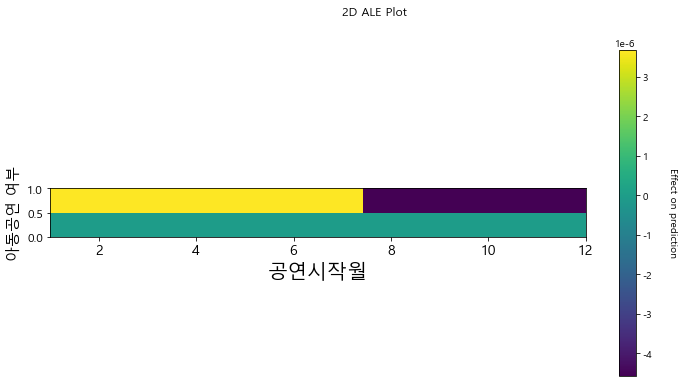

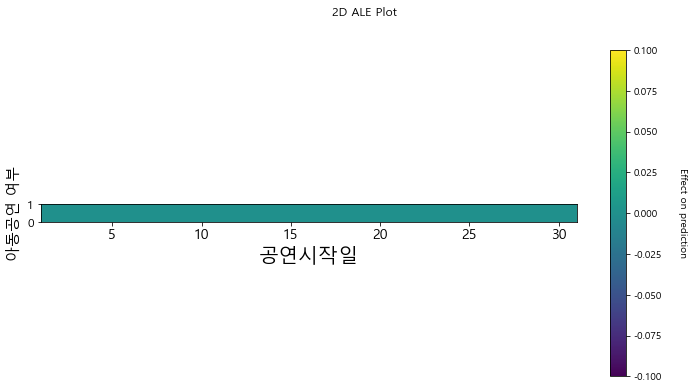

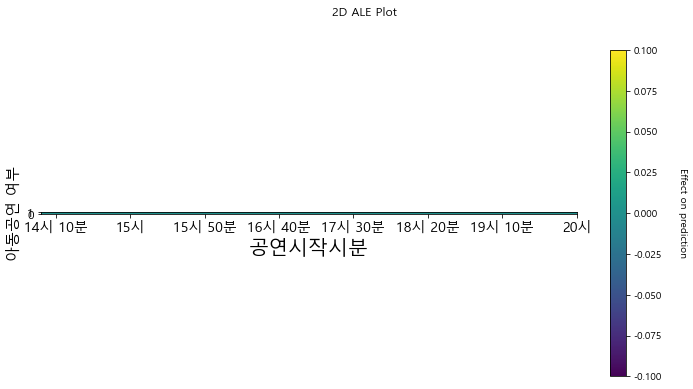

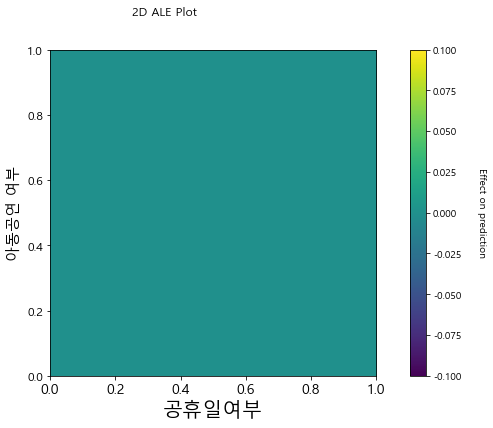

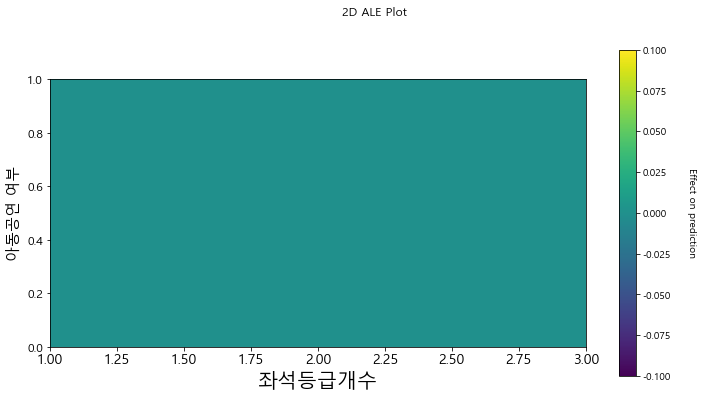

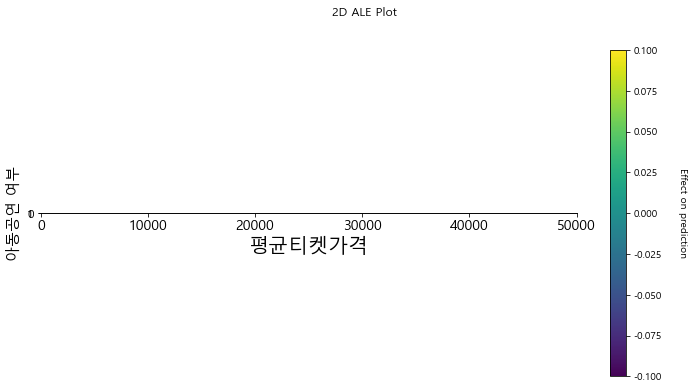

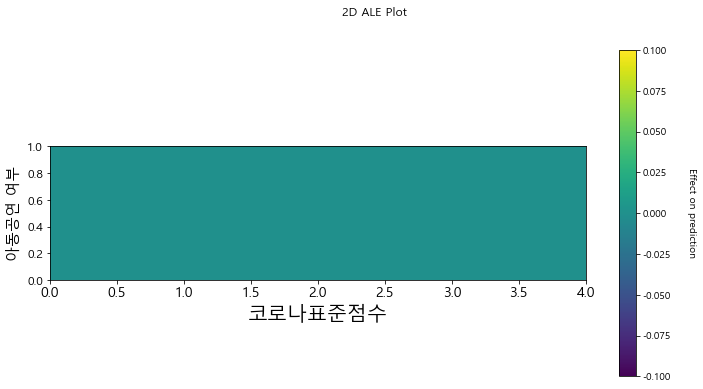

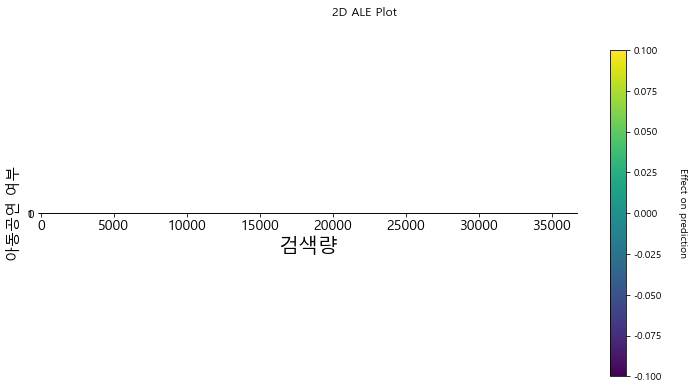

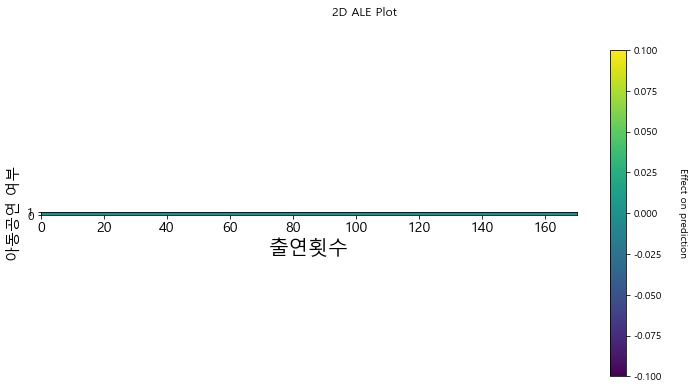

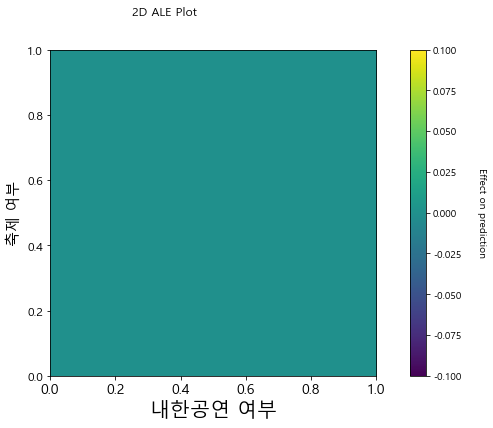

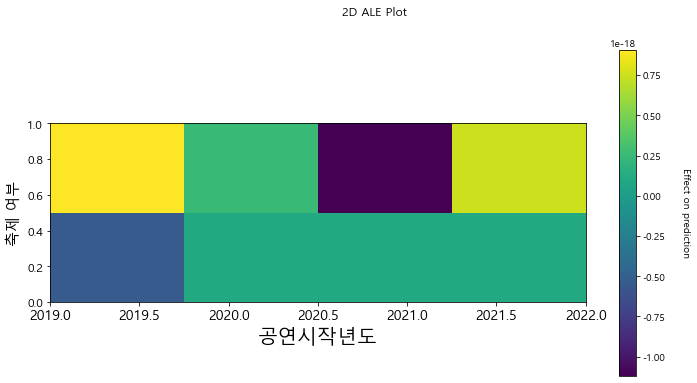

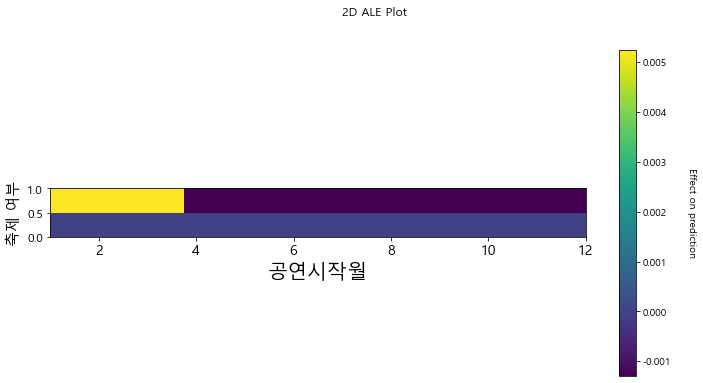

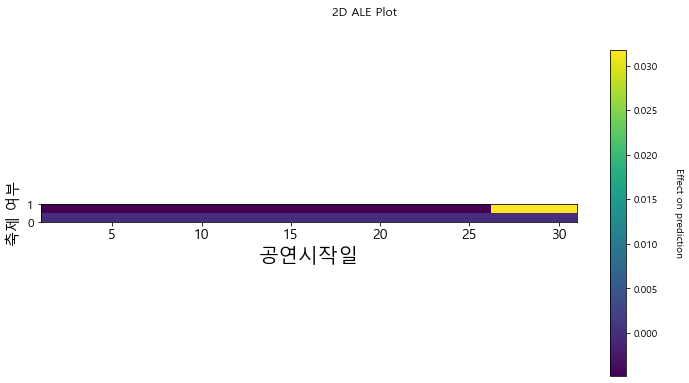

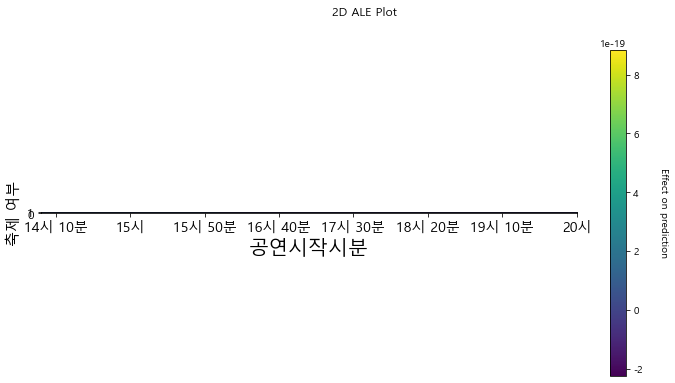

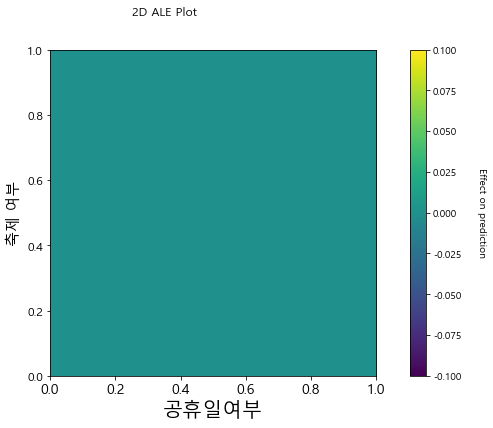

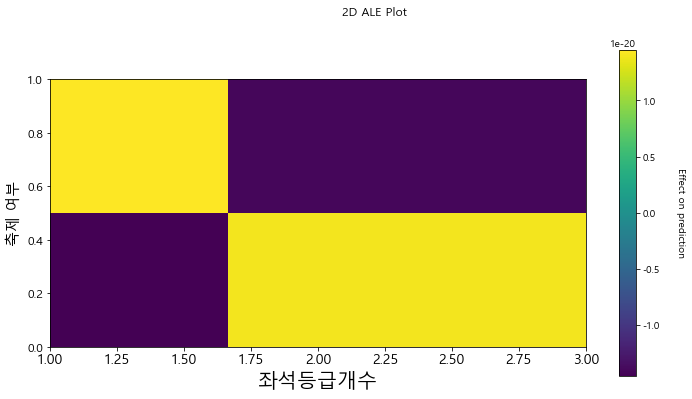

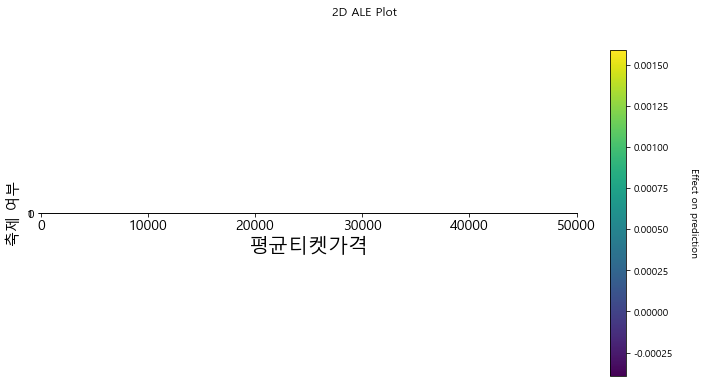

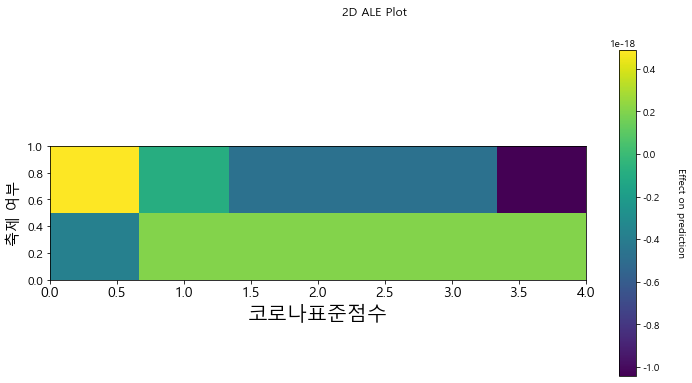

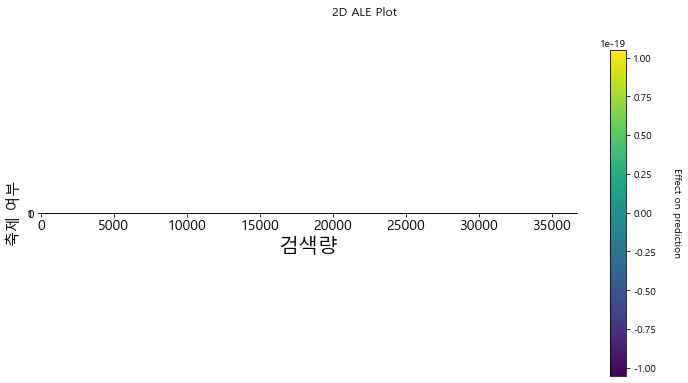

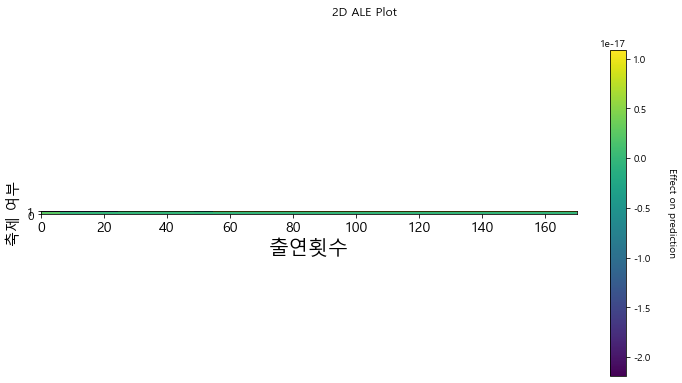

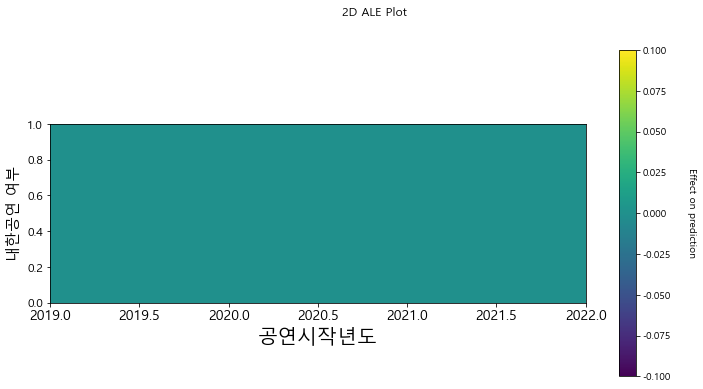

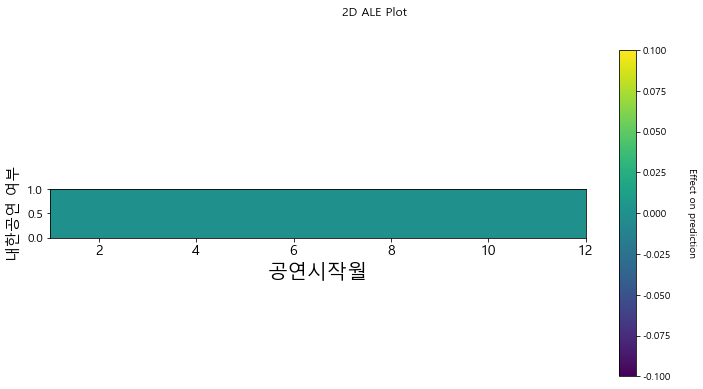

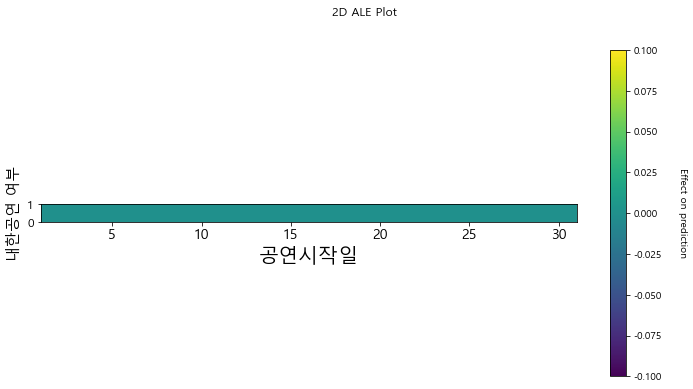

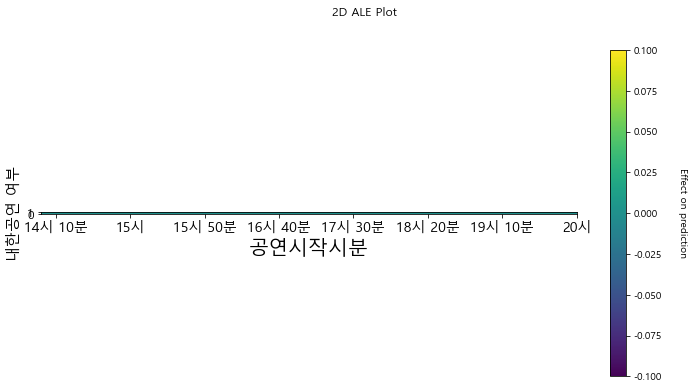

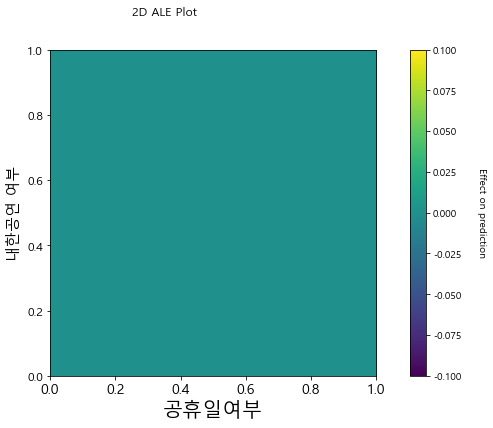

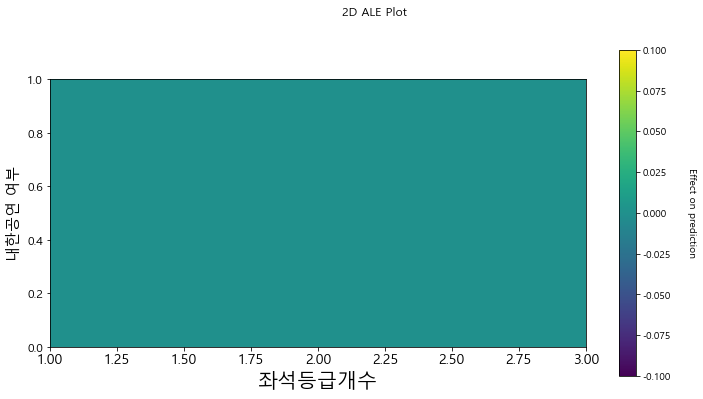

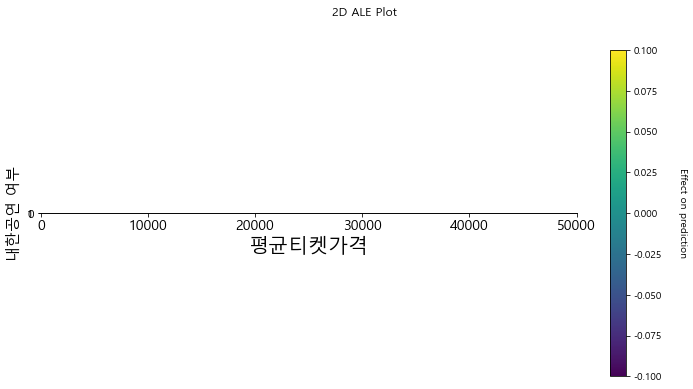

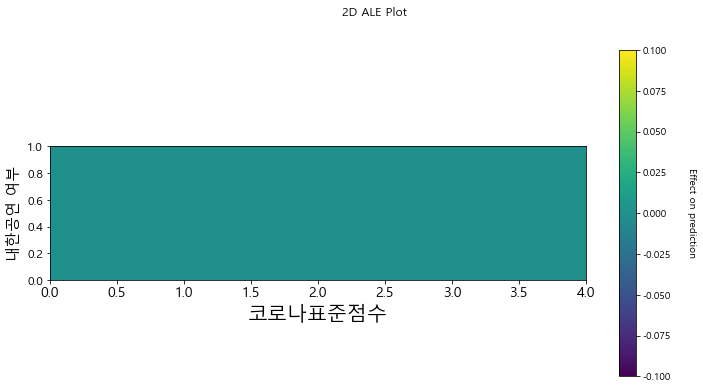

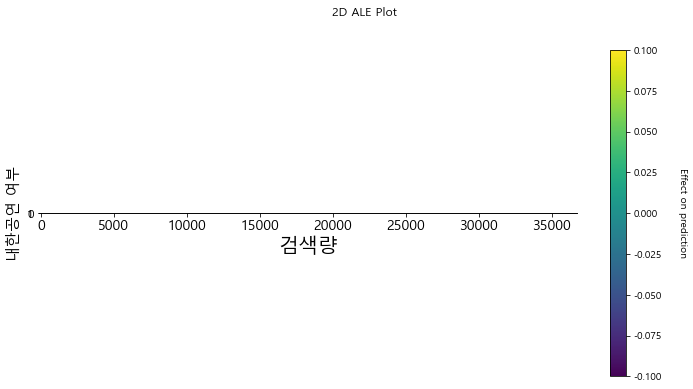

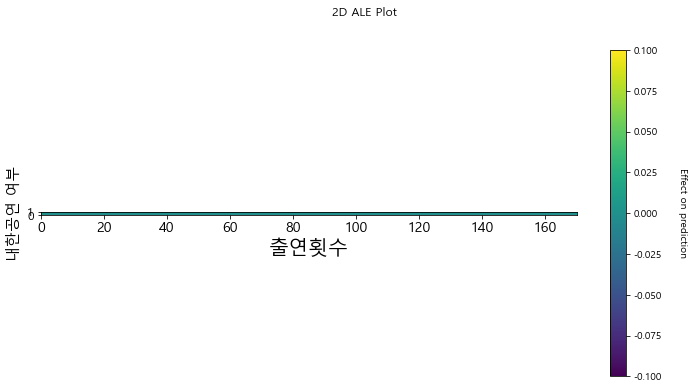

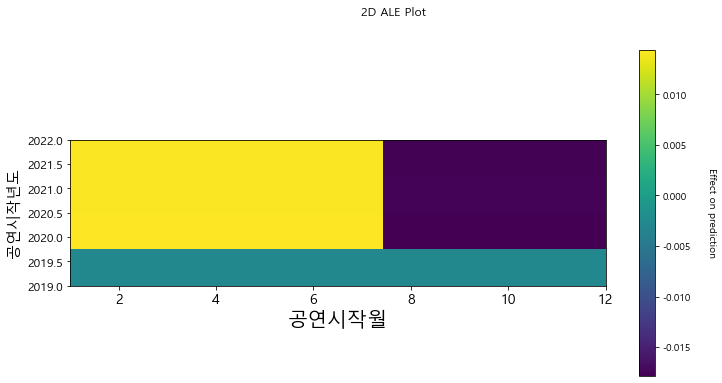

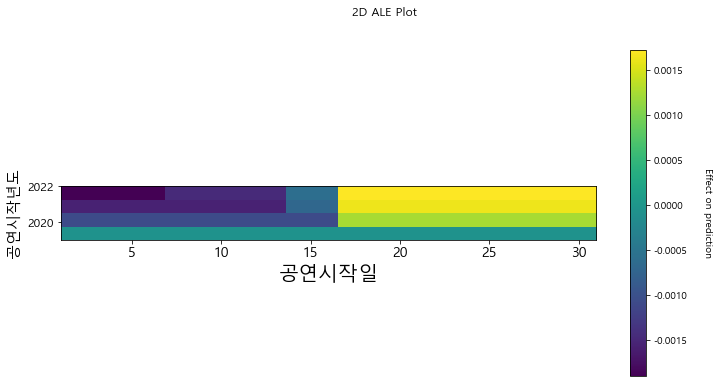

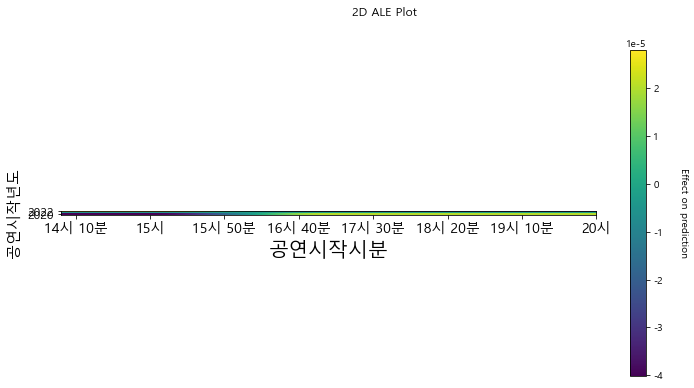

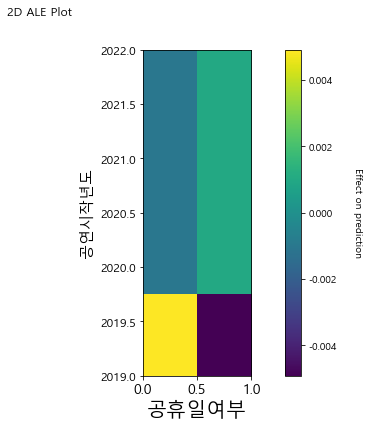

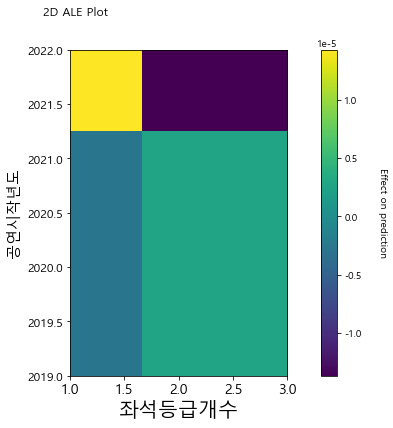

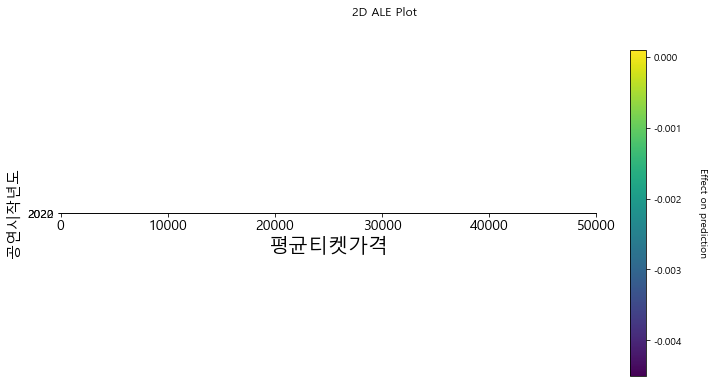

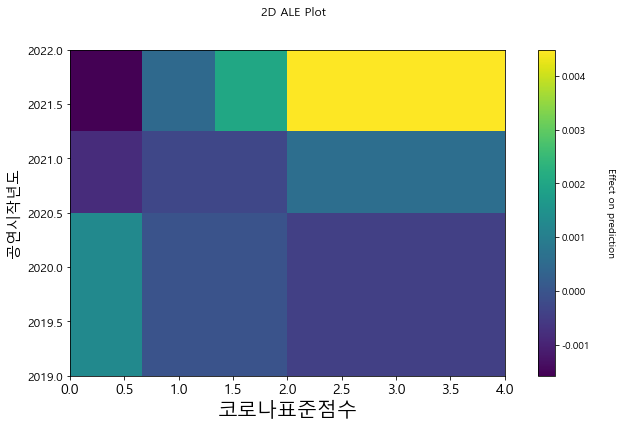

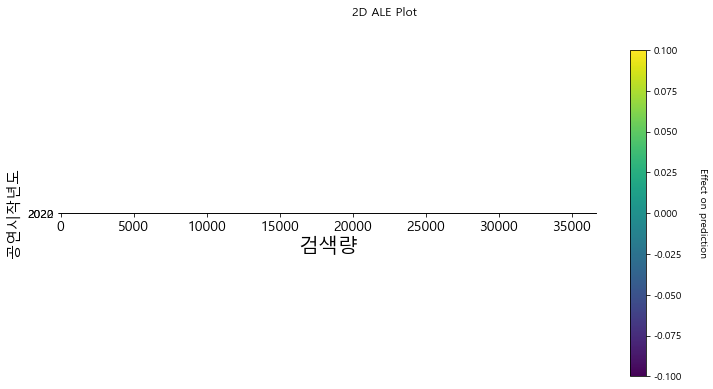

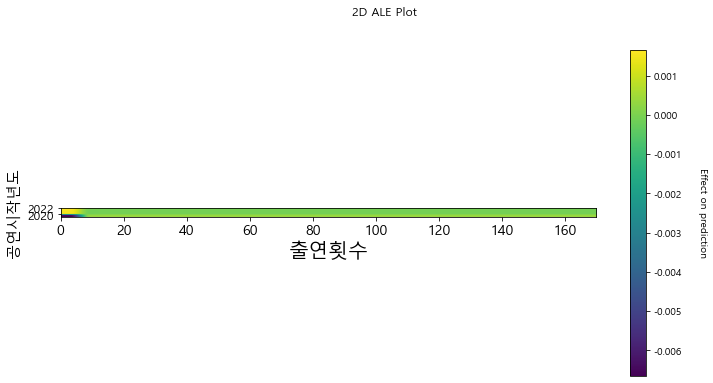

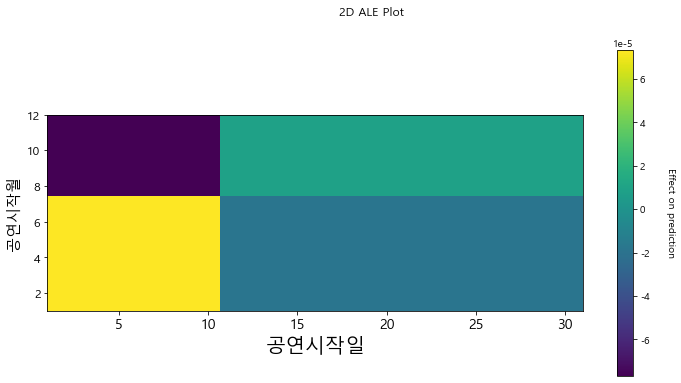

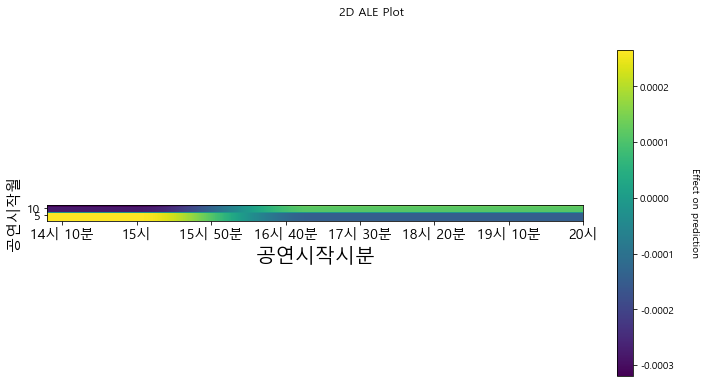

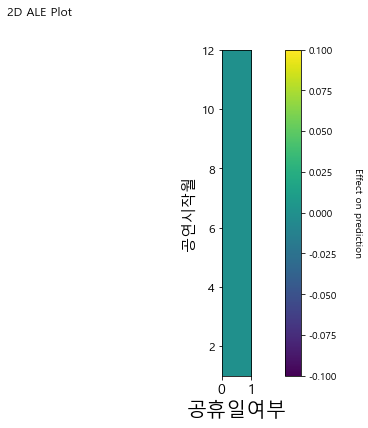

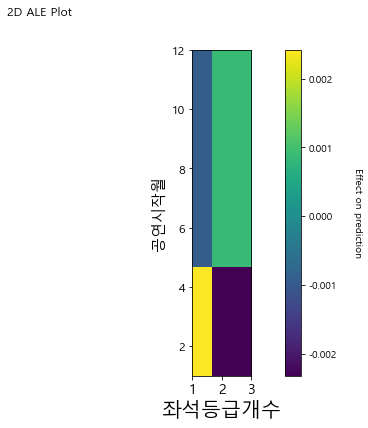

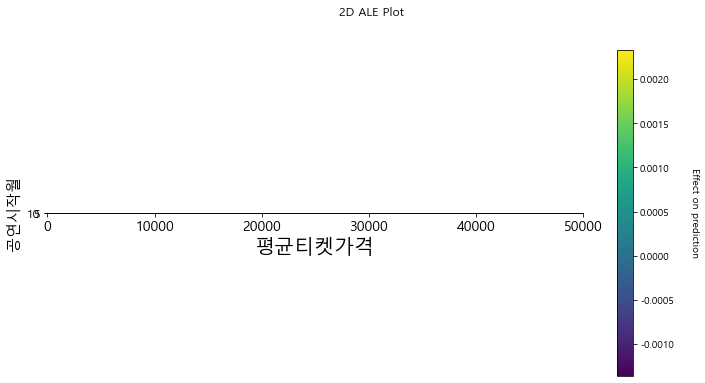

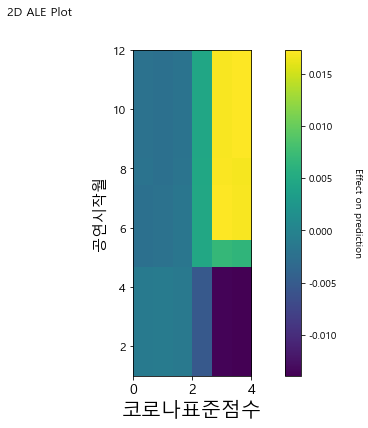

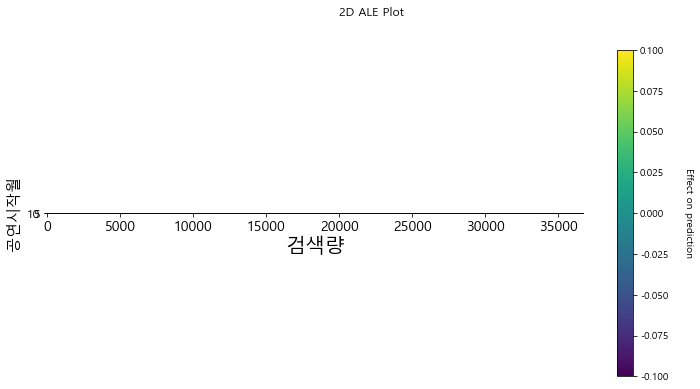

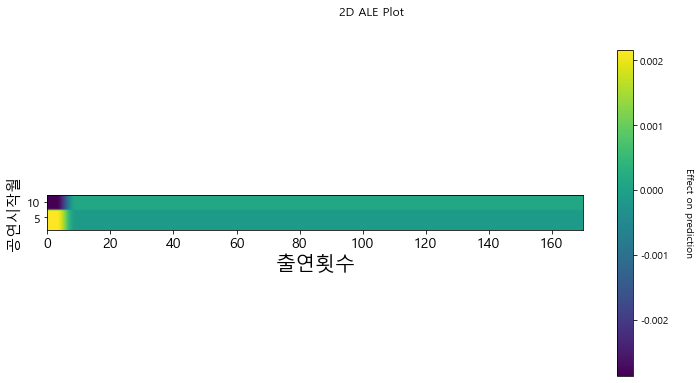

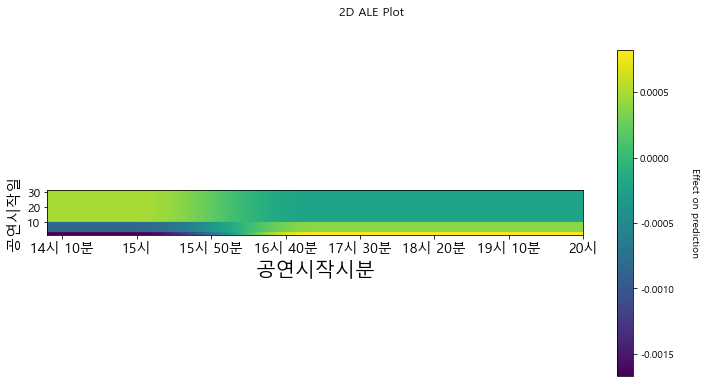

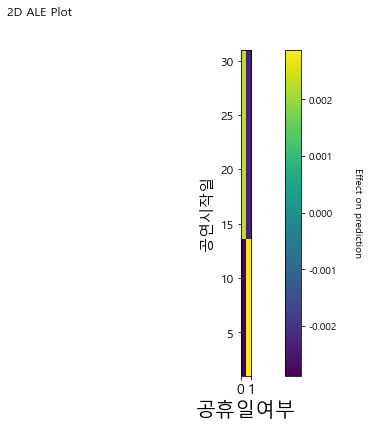

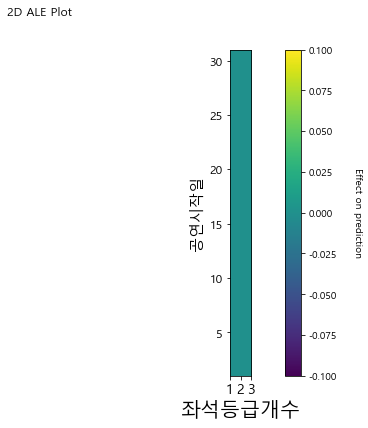

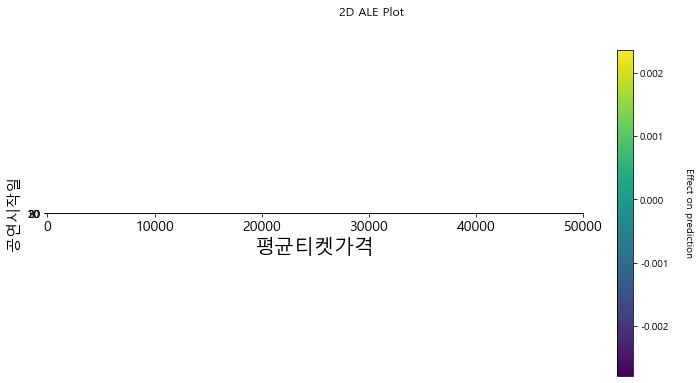

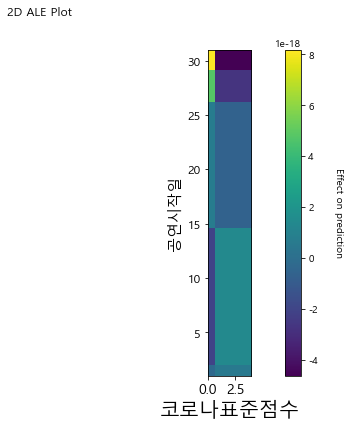

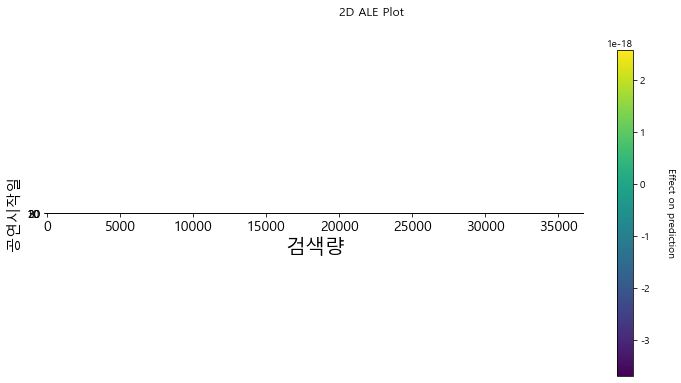

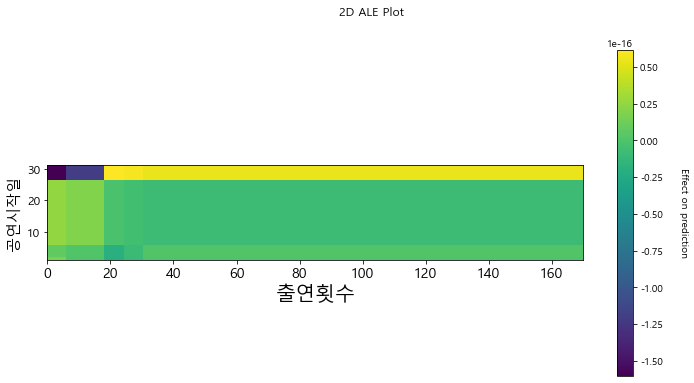

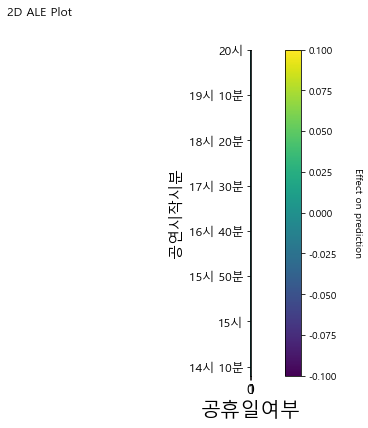

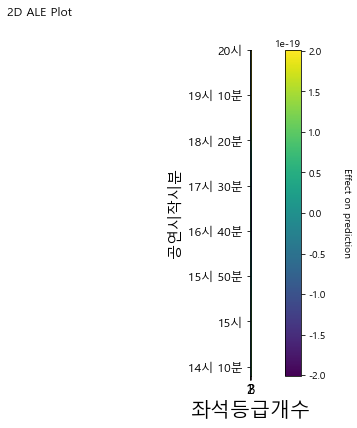

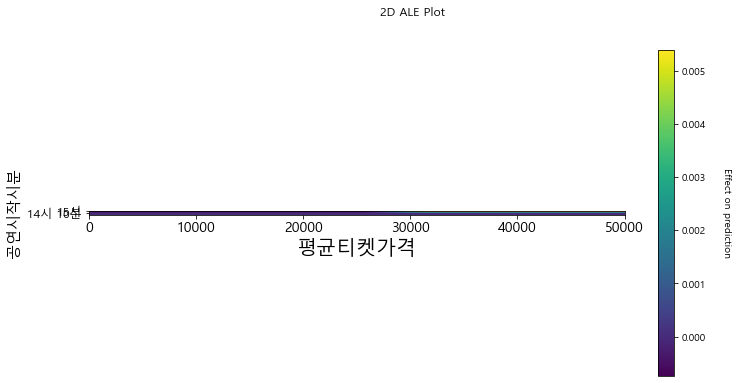

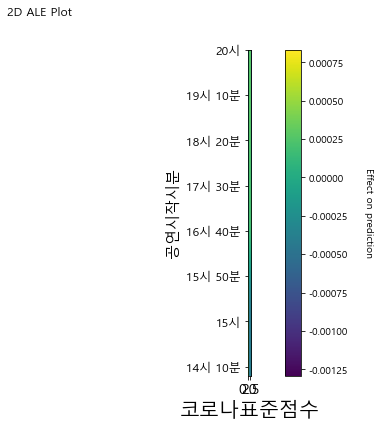

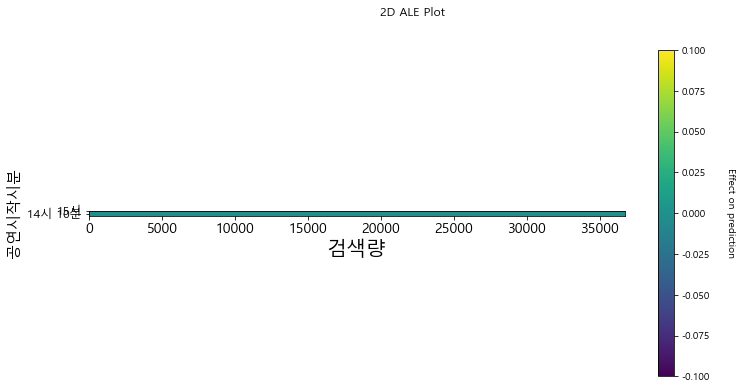

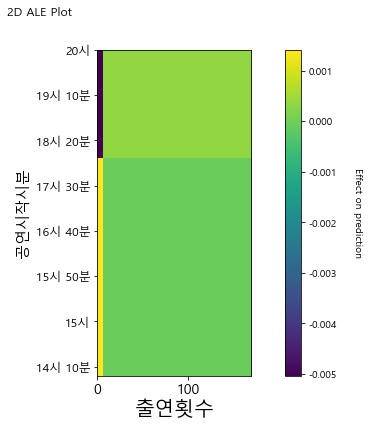

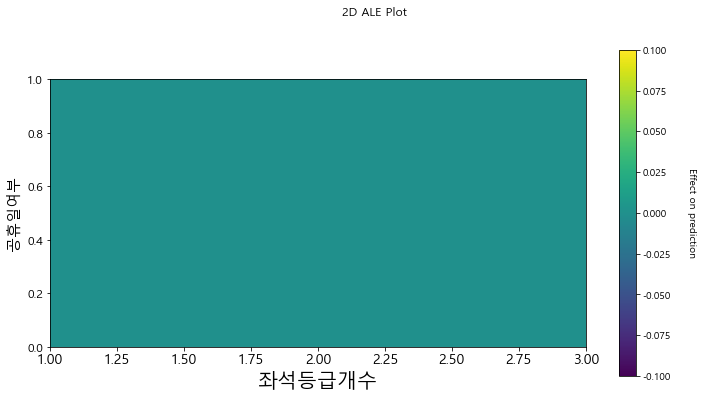

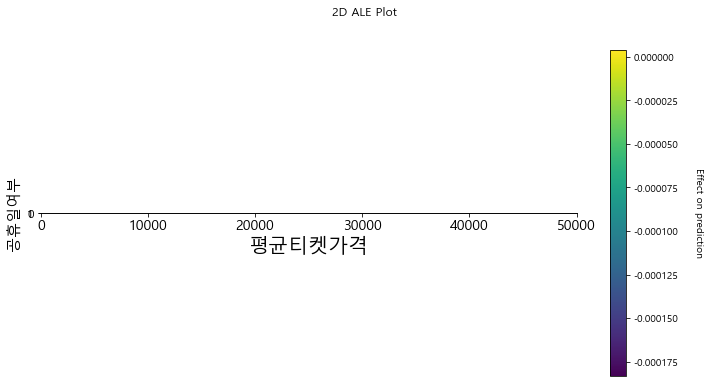

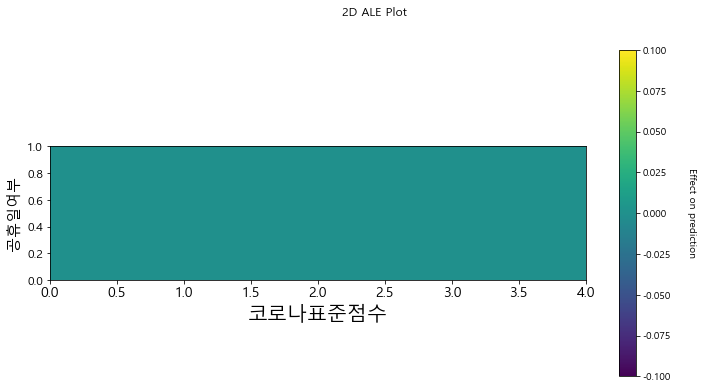

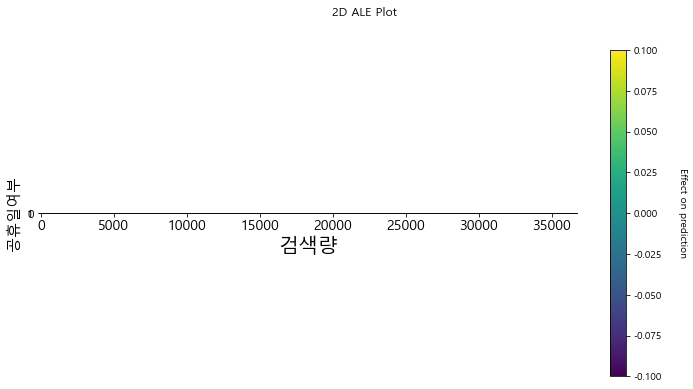

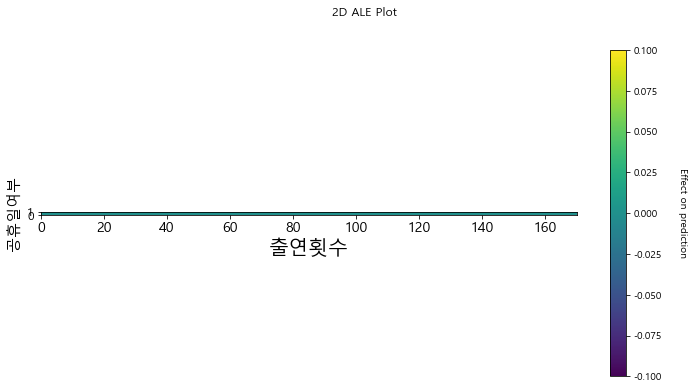

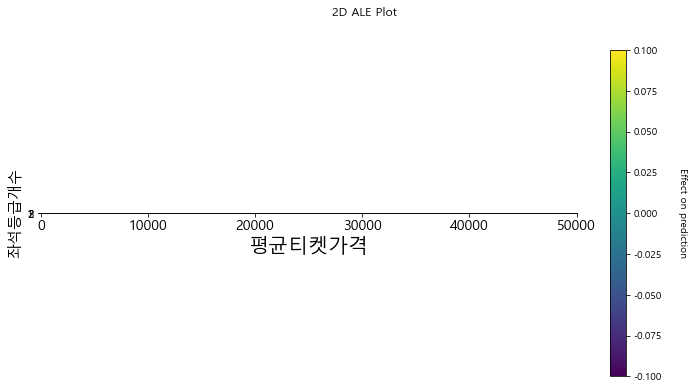

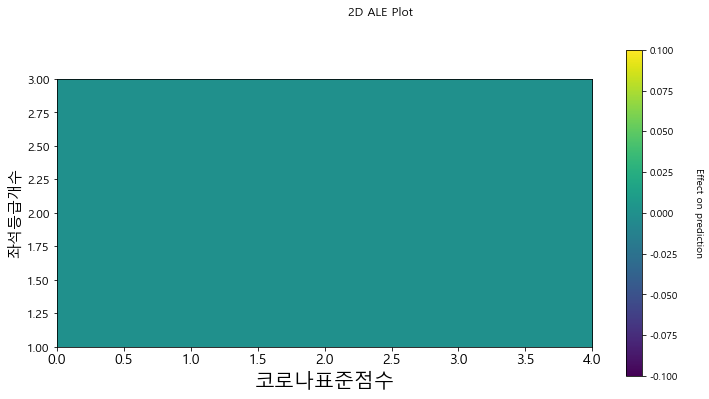

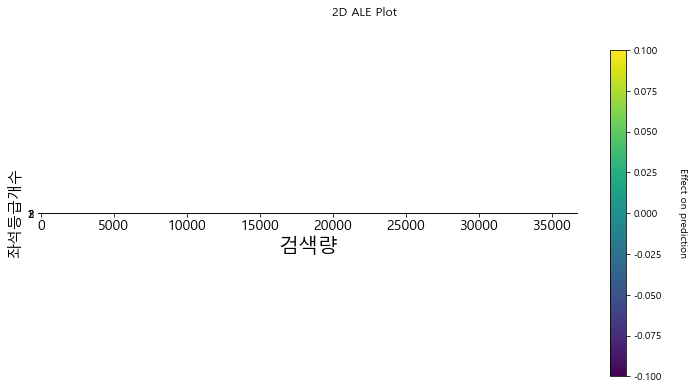

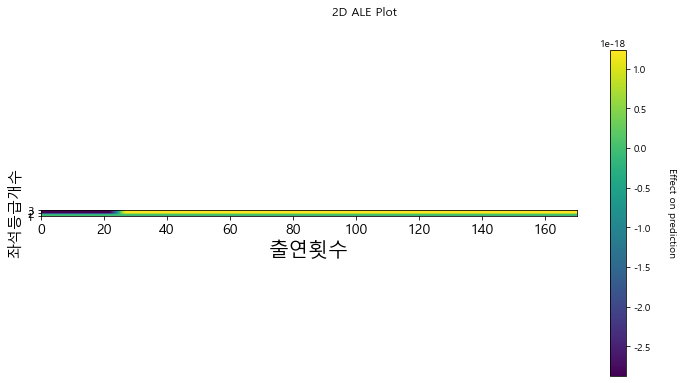

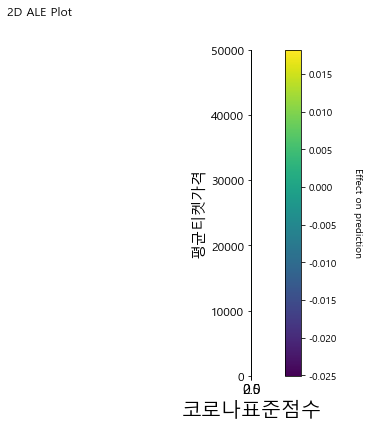

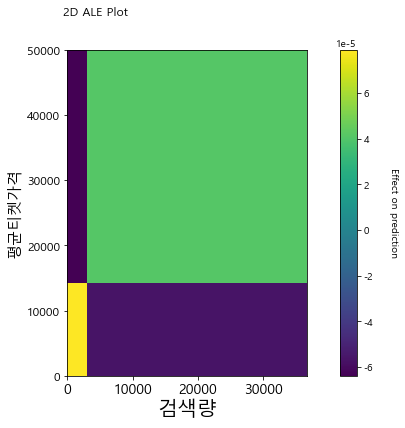

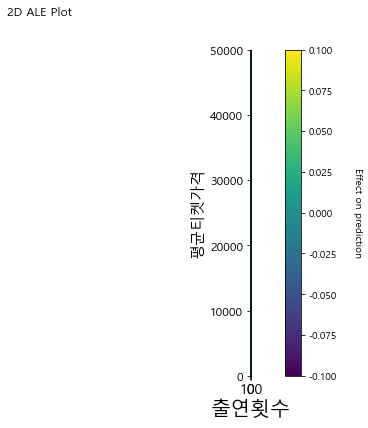

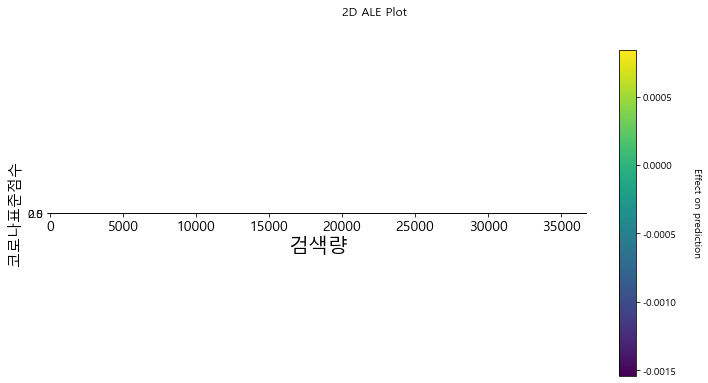

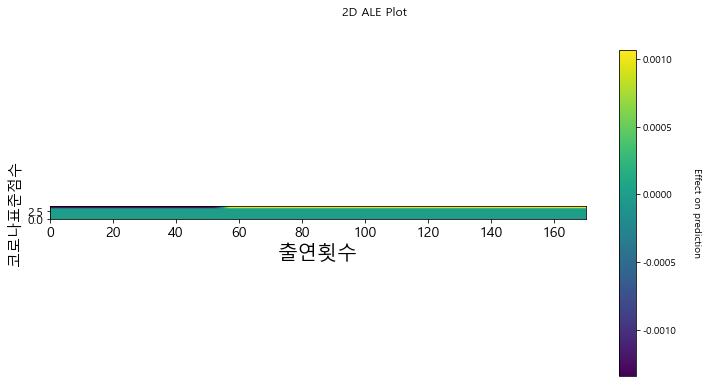

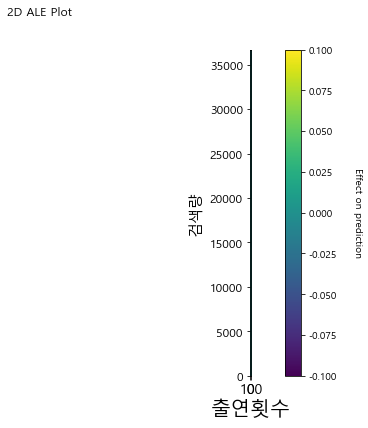

In [31]:
label_mapping = {'전체 관람가':0, '36개월 이상':1, '48개월 이상':2, '만 5세 이상':3, '만 7세 이상':4, '만 8세 이상':5}
reverse_mapping = {v: k for k, v in label_mapping.items()}

for combo in combinations(lst, 2):
    fig, ax = plt.subplots(figsize=(12, 6))  # 여기서 figsize를 변경하여 그림의 크기를 조절합니다.
    
    ale_eff = ale(
        X=data,
        model=loaded_model,
        feature=[combo[0], combo[1]],
        grid_size=50,
        plot=True,
        fig=fig,
        ax=ax
    )
    if combo[0] == '관람연령':
        ax.set_yticks(list(reverse_mapping.keys()))
        ax.set_yticklabels(list(reverse_mapping.values()), fontsize=12)
    if combo[0] == '공연시작시분':
        values = ax.get_yticks().astype(int)
        hours = values // 60
        minutes = values % 60
        time_labels = [f"{h}시 {m}분" if m != 0 else f"{h}시" for h, m in zip(hours, minutes)]
        ax.set_yticklabels(time_labels, fontsize=12)

    if combo[1] == '공연시작시분':
        values = ax.get_xticks().astype(int)
        hours = values // 60
        minutes = values % 60
        time_labels = [f"{h}시 {m}분" if m != 0 else f"{h}시" for h, m in zip(hours, minutes)]
        ax.set_xticklabels(time_labels, fontsize=12)

    if combo[1] == '소요시간':
        ax.set_xlabel('소요시간(분)', fontsize=120)
        
    if combo[0] == '소요시간':
        ax.set_ylabel('소요시간(분)', fontsize=17)
        
        # x축 라벨의 글꼴 크기 변경
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(15)
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)
    
    
    
    plt.show()  # 각 플롯을 별도로 보려면 이 코드를 사용하세요.
    
    fig.savefig(f'../plots/예술의 전당/ale_plot_2D_x({combo[1]})_y({combo[0]}).jpg', dpi=300, format='jpg', bbox_inches='tight')

대구콘서트하우스 PyALE

In [32]:
filename = '../model/gbm_fin_model_dae.sav'
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model)

GradientBoostingRegressor(alpha=0.7, criterion='squared_error',
                          learning_rate=0.15, loss='huber', n_estimators=150,
                          random_state=40)


In [33]:
dataset = pd.read_csv('../preprocessed_data/대구콘서트하우스/모델학습및테스트데이터_최종.csv')
dataset

Unnamed: 0  소요시간  관람연령  아동공연 여부  축제 여부  내한공연 여부  단독판매여부  공연시작년도  공연시작월  \
0             0   100     7        0      0        0       0    2022      7   
1             1    60     7        0      1        0       0    2020      8   
2             2    90     7        0      0        0       1    2022      5   
3             3    90     7        0      0        0       0    2022      4   
4             4    60     7        0      0        0       1    2022      4   
..          ...   ...   ...      ...    ...      ...     ...     ...    ...   
273         273    70     7        0      0        0       0    2021      9   
274         274    90     8        0      0        0       0    2019     12   
275         275    90     4        0      0        0       0    2021      9   
276         276    90     7        0      0        0       1    2021     11   
277         277    60     7        0      0        0       0    2022      4   

     공연시작일  공연시작시분  공휴일여부  좌석등급개수   평균티켓가격  코로나표준점수   검색량  출연횟수  \
0       22    1170      0       1  30000.0        0  2820    10   
1       19     960      0       1  20000.0        1  1670    31   
2       20    1170      0       1  10000.0        0     0     3   
3       16    1140      0       1      0.0        1     0     2   
4       22    1170      0       1  10000.0        0     0     3   
..     ...     ...    ...     ...      ...      ...   ...   ...   
273     26     960      0       1  20000.0        3     0     5   
274     12    1170      0       1  20000.0        0     0     6   
275     11    1020      0       1      0.0        3     0     1   
276     17    1170      0       1  10000.0        1     0     1   
277      6    1170      0       1      0.0        1     0     3   

     dayofweek_fri  dayofweek_mon  dayofweek_sat  dayofweek_sun  \
0              1.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              1.0            0.0            0.0            0.0   
3              0.0            0.0            1.0            0.0   
4              1.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
273            0.0            0.0            0.0            1.0   
274            0.0            0.0            0.0            0.0   
275            0.0            0.0            1.0            0.0   
276            0.0            0.0            0.0            0.0   
277            0.0            0.0            0.0            0.0   

     dayofweek_thu  dayofweek_tue  dayofweek_wed  대중무용_스트리트/스포츠댄스  대중음악_기타  \
0              0.0            0.0            0.0              0.0      0.0   
1              0.0            0.0            1.0              0.0      0.0   
2              0.0            0.0            0.0              0.0      0.0   
3              0.0            0.0            0.0              0.0      0.0   
4              0.0            0.0            0.0              0.0      0.0   
..             ...            ...            ...              ...      ...   
273            0.0            0.0            0.0              0.0      0.0   
274            1.0            0.0            0.0              0.0      0.0   
275            0.0            0.0            0.0              0.0      0.0   
276            0.0            0.0            1.0              0.0      0.0   
277            0.0            0.0            1.0              0.0      0.0   

     대중음악_재즈/월드뮤직  뮤지컬_악극  복합_다원/융복합  복합_복합  서양음악(클래식)_기악  서양음악(클래식)_성악  \
0             0.0     0.0        0.0    0.0           1.0           0.0   
1             0.0     0.0        0.0    0.0           1.0           0.0   
2             0.0     0.0        0.0    0.0           1.0           0.0   
3             0.0     0.0        0.0    0.0           1.0           0.0   
4             0.0     0.0        0.0    0.0           1.0           0.0   
..            ...     ...        ...    ...           ...  

In [34]:
data = dataset.iloc[:,:-1]
data = data.iloc[ : , 1: ]
data

소요시간  관람연령  아동공연 여부  축제 여부  내한공연 여부  단독판매여부  공연시작년도  공연시작월  공연시작일  \
0     100     7        0      0        0       0    2022      7     22   
1      60     7        0      1        0       0    2020      8     19   
2      90     7        0      0        0       1    2022      5     20   
3      90     7        0      0        0       0    2022      4     16   
4      60     7        0      0        0       1    2022      4     22   
..    ...   ...      ...    ...      ...     ...     ...    ...    ...   
273    70     7        0      0        0       0    2021      9     26   
274    90     8        0      0        0       0    2019     12     12   
275    90     4        0      0        0       0    2021      9     11   
276    90     7        0      0        0       1    2021     11     17   
277    60     7        0      0        0       0    2022      4      6   

     공연시작시분  공휴일여부  좌석등급개수   평균티켓가격  코로나표준점수   검색량  출연횟수  dayofweek_fri  \
0      1170      0       1  30000.0        0  2820    10            1.0   
1       960      0       1  20000.0        1  1670    31            0.0   
2      1170      0       1  10000.0        0     0     3            1.0   
3      1140      0       1      0.0        1     0     2            0.0   
4      1170      0       1  10000.0        0     0     3            1.0   
..      ...    ...     ...      ...      ...   ...   ...            ...   
273     960      0       1  20000.0        3     0     5            0.0   
274    1170      0       1  20000.0        0     0     6            0.0   
275    1020      0       1      0.0        3     0     1            0.0   
276    1170      0       1  10000.0        1     0     1            0.0   
277    1170      0       1      0.0        1     0     3            0.0   

     dayofweek_mon  dayofweek_sat  dayofweek_sun  dayofweek_thu  \
0              0.0            0.0            0.0            0.0   
1              0.0            0.0            0.0            0.0   
2              0.0            0.0            0.0            0.0   
3              0.0            1.0            0.0            0.0   
4              0.0            0.0            0.0            0.0   
..             ...            ...            ...            ...   
273            0.0            0.0            1.0            0.0   
274            0.0            0.0            0.0            1.0   
275            0.0            1.0            0.0            0.0   
276            0.0            0.0            0.0            0.0   
277            0.0            0.0            0.0            0.0   

     dayofweek_tue  dayofweek_wed  대중무용_스트리트/스포츠댄스  대중음악_기타  대중음악_재즈/월드뮤직  \
0              0.0            0.0              0.0      0.0           0.0   
1              0.0            1.0              0.0      0.0           0.0   
2              0.0            0.0              0.0      0.0           0.0   
3              0.0            0.0              0.0      0.0           0.0   
4              0.0            0.0              0.0      0.0           0.0   
..             ...            ...              ...      ...           ...   
273            0.0            0.0              0.0      0.0           0.0   
274            0.0            0.0              0.0      0.0           0.0   
275            0.0            0.0              0.0      0.0           0.0   
276            0.0            1.0              0.0      0.0           0.0   
277            0.0            1.0              0.0      0.0           0.0   

     뮤지컬_악극  복합_다원/융복합  복합_복합  서양음악(클래식)_기악  서양음악(클래식)_성악  서양음악(클래식)_오페라  \
0       0.0        0.0    0.0           1.0           0.0            0.0   
1       0.0        0.0    0.0           1.0           0.0            0.0   
2       0.0        0.0    0.0           1.0           0.0            0.0   
3       0.0        0.0    0.0           1.0           0.0            0.0   
4       0.0        0.0    0.0           1.0           0.0            0.0   
..      ...        ...    ...

In [35]:
column_list = data.columns.tolist()
column_list[:16]

['소요시간',
 '관람연령',
 '아동공연 여부',
 '축제 여부',
 '내한공연 여부',
 '단독판매여부',
 '공연시작년도',
 '공연시작월',
 '공연시작일',
 '공연시작시분',
 '공휴일여부',
 '좌석등급개수',
 '평균티켓가격',
 '코로나표준점수',
 '검색량',
 '출연횟수']

PyALE._ALE_generic:INFO: Continuous feature detected.


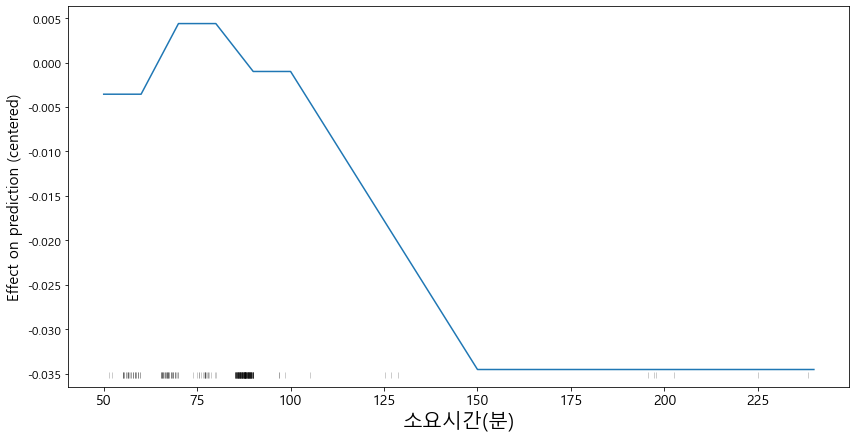

PyALE._ALE_generic:INFO: Discrete feature detected.


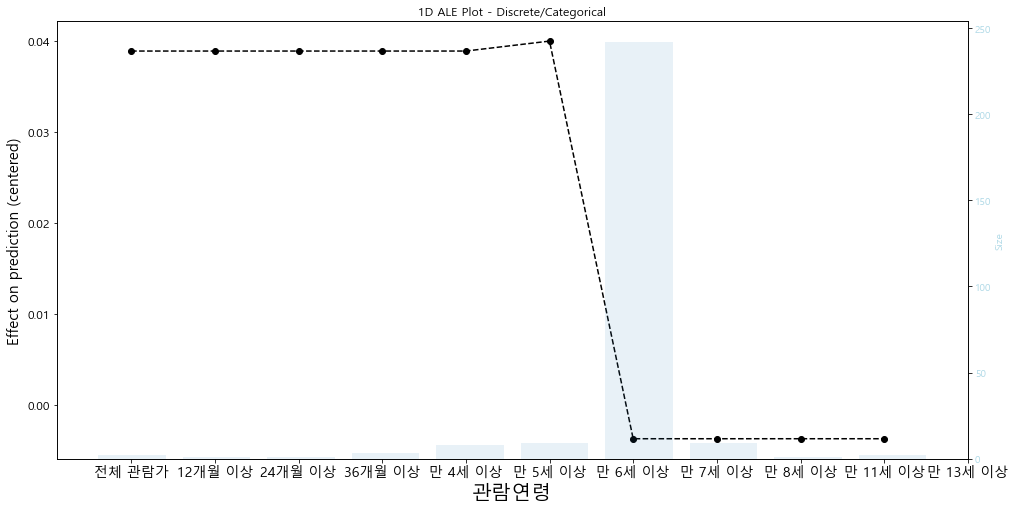

PyALE._ALE_generic:INFO: Discrete feature detected.


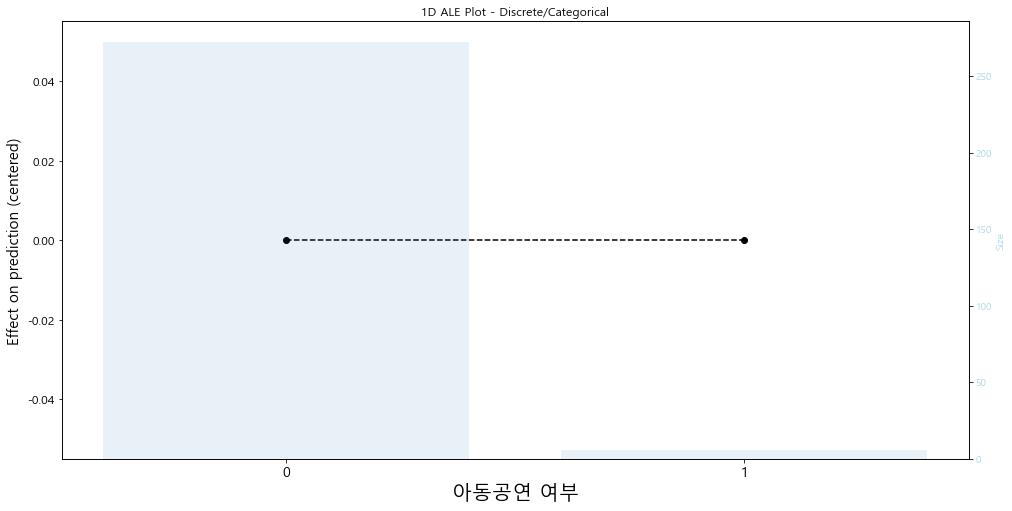

PyALE._ALE_generic:INFO: Discrete feature detected.


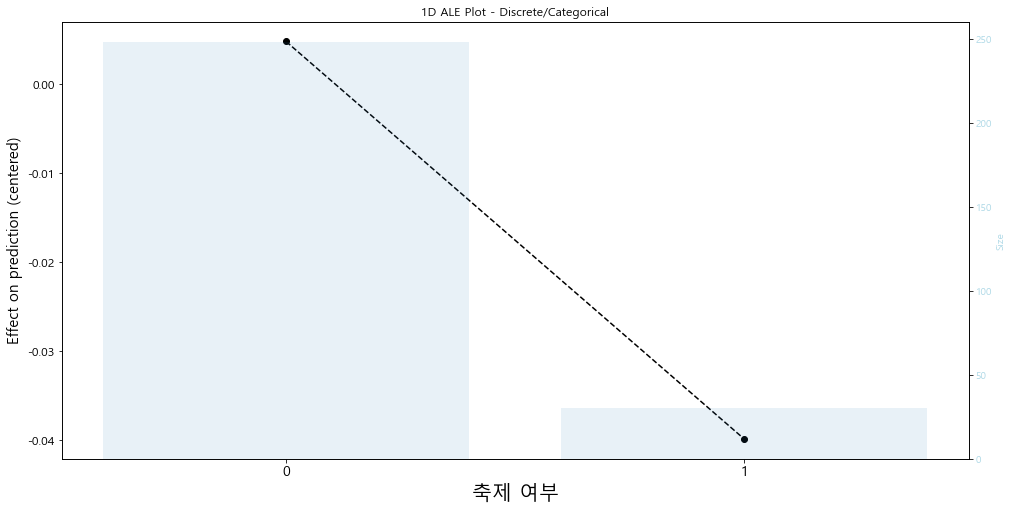

PyALE._ALE_generic:INFO: Discrete feature detected.


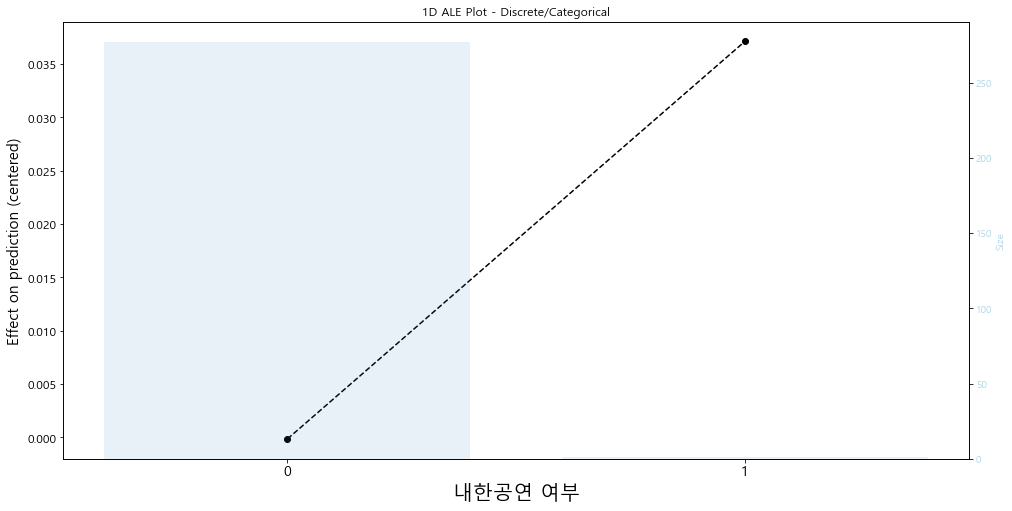

PyALE._ALE_generic:INFO: Discrete feature detected.


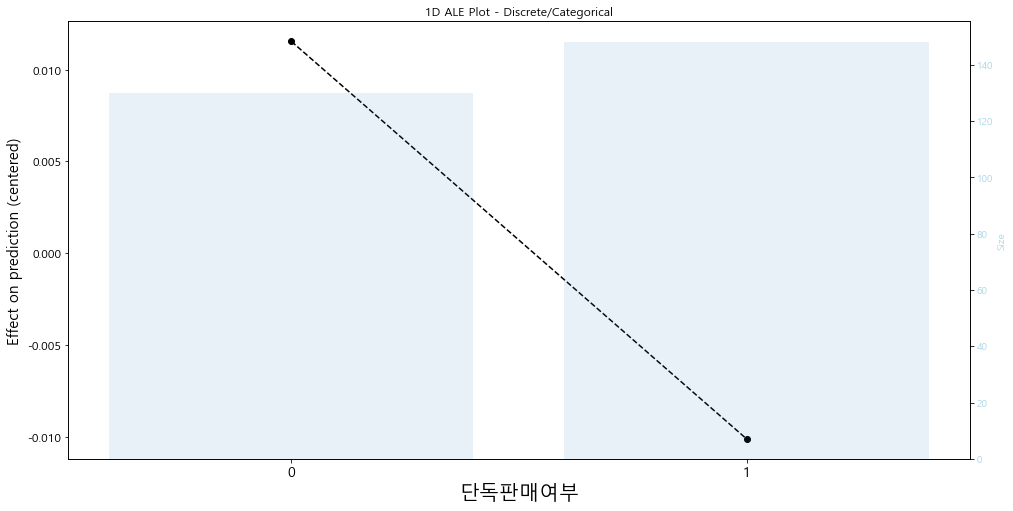

PyALE._ALE_generic:INFO: Discrete feature detected.


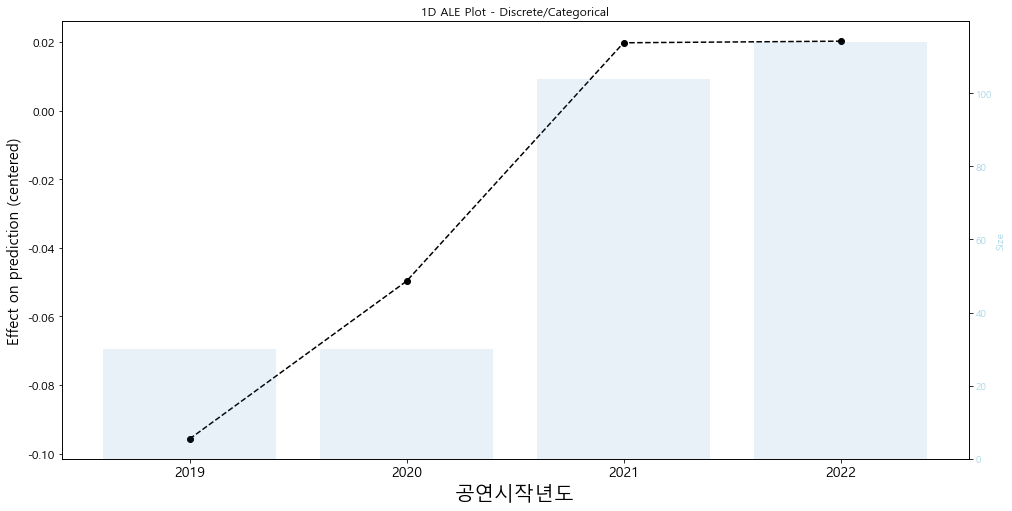

PyALE._ALE_generic:INFO: Continuous feature detected.


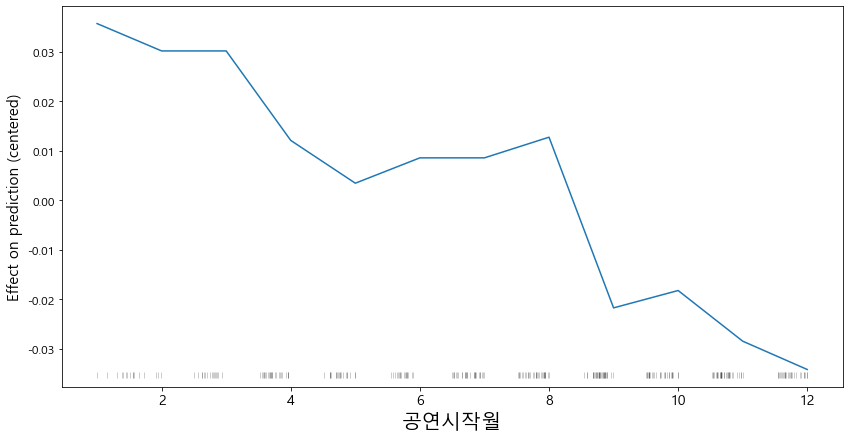

PyALE._ALE_generic:INFO: Continuous feature detected.


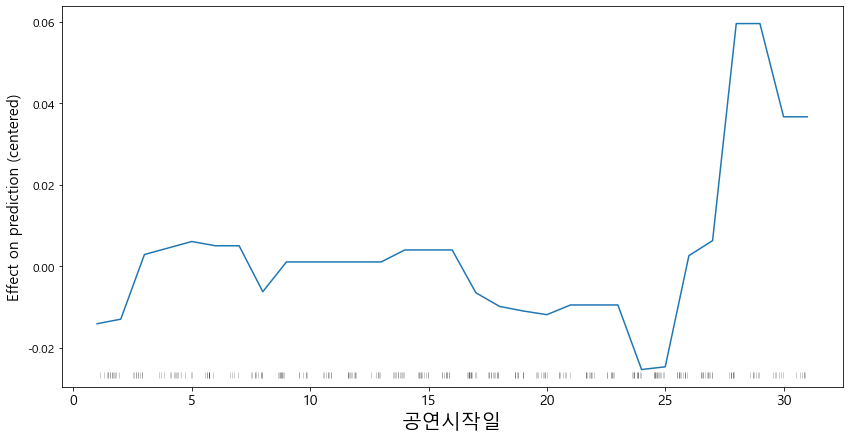

PyALE._ALE_generic:INFO: Continuous feature detected.


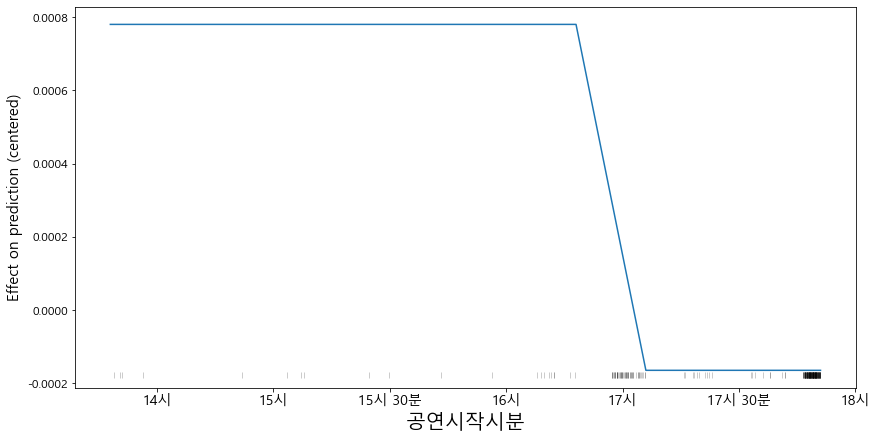

PyALE._ALE_generic:INFO: Discrete feature detected.


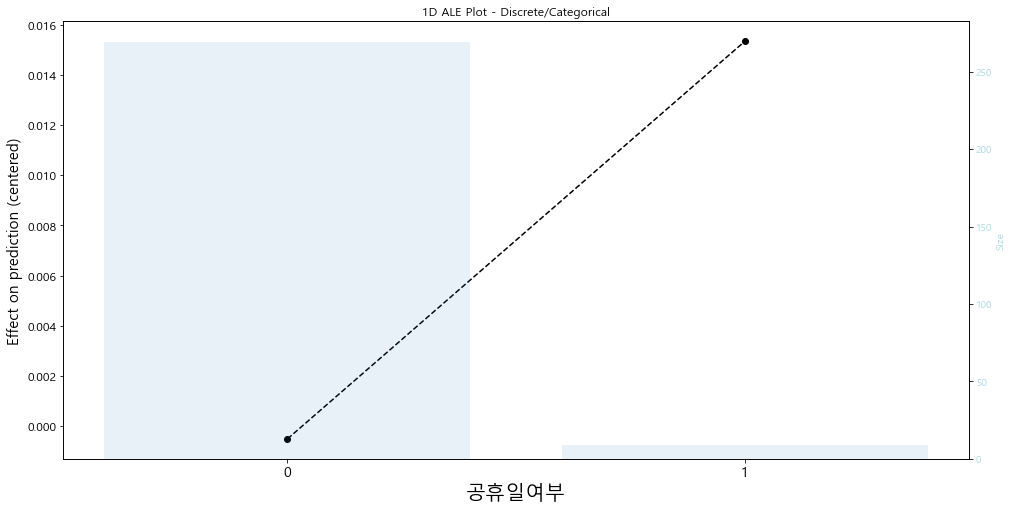

PyALE._ALE_generic:INFO: Discrete feature detected.


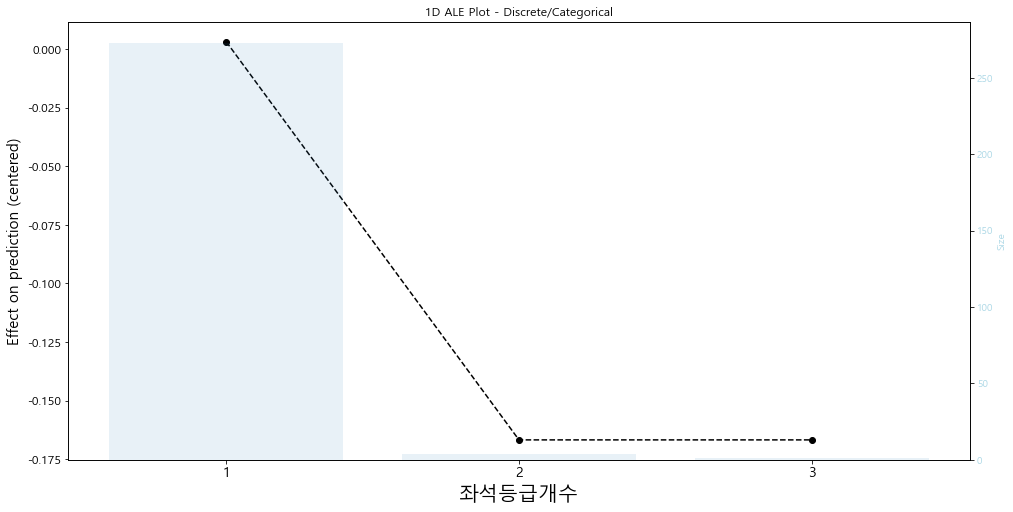

PyALE._ALE_generic:INFO: Discrete feature detected.


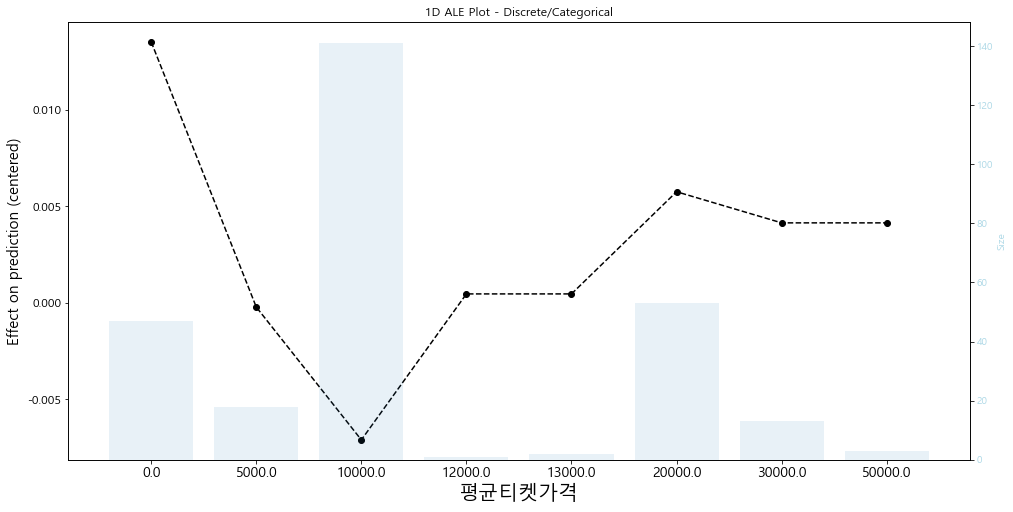

PyALE._ALE_generic:INFO: Discrete feature detected.


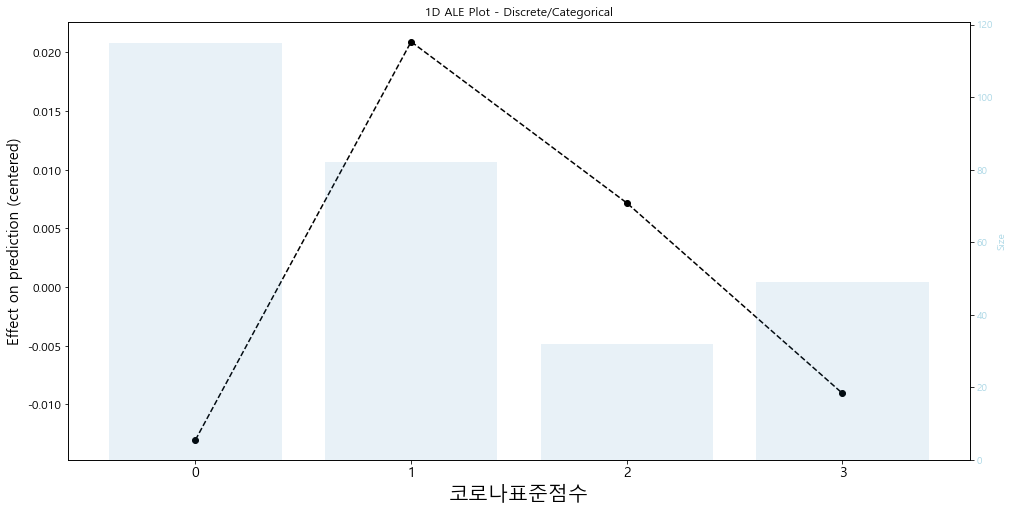

PyALE._ALE_generic:INFO: Continuous feature detected.


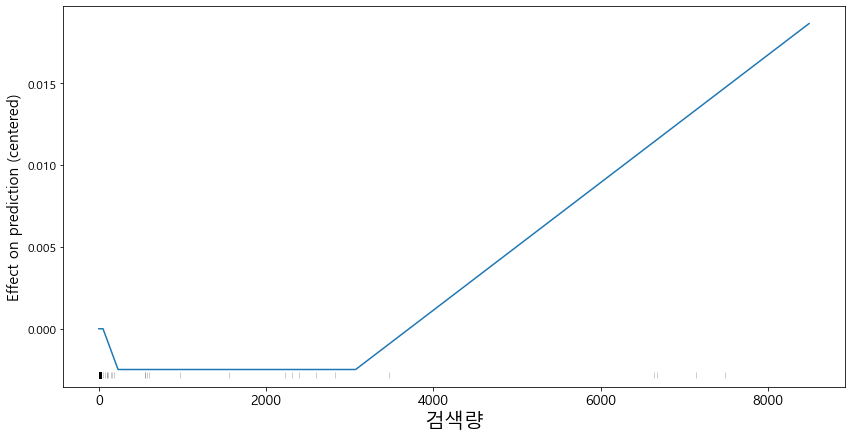

PyALE._ALE_generic:INFO: Continuous feature detected.


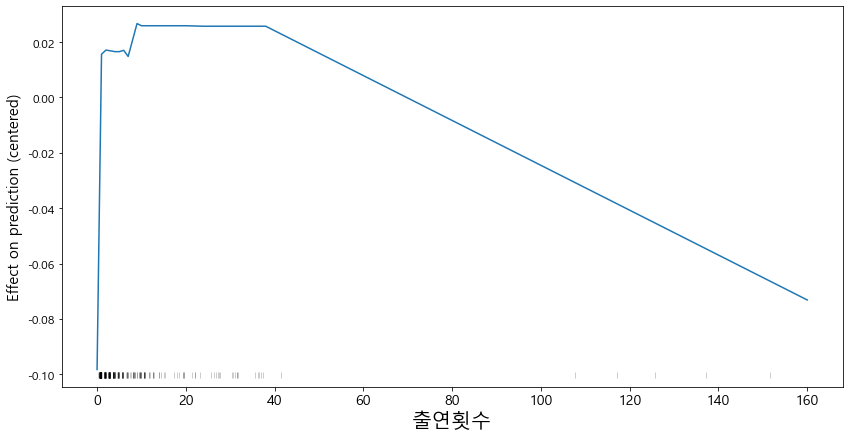

In [40]:
label_mapping = {'전체 관람가':0, '12개월 이상': 1, '24개월 이상':2, '36개월 이상':3, '48개월 이상':4, '만 4세 이상':4, '만 5세 이상':5, 
            '만 6세 이상':6, '만 7세 이상':7, '만 8세 이상':8, '만 11세 이상':9, '만 13세 이상': 10}
reverse_mapping = {v: k for k, v in label_mapping.items()}

column_list = data.columns.tolist()

for col in column_list[:16]:
    fig, ax = plt.subplots(figsize=(14, 7))
    
    ale_eff = ale(
        X=data,
        model=loaded_model,
        feature=[col],
        grid_size=50,
        include_CI=False,
        plot=True,
        fig=fig,
        ax=ax
    )
    
    if col == '관람연령':
        ax.set_xticks(list(reverse_mapping.keys()))
        ax.set_xticklabels(list(reverse_mapping.values()), fontsize=12)
        
    elif col == '공연시작시분':
        # 현재 데이터에서 '공연시작시분'의 고유한 값을 얻기 위해 사용
        unique_vals = np.sort(data['공연시작시분'].unique())
        hours = unique_vals // 60
        minutes = unique_vals % 60
        time_labels = [f"{h}시 {m}분" if m != 0 else f"{h}시" for h, m in zip(hours, minutes)]

        ax.set_xticklabels(time_labels, fontsize=12)

    ax.set_xlabel(col, fontsize=20)
    ax.yaxis.label.set_size(15)
    
    if col == '소요시간':
        ax.set_xlabel('소요시간(분)', fontsize=20)

    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)

    plt.show()

    # 각 그림마다 고유한 이름으로 저장
    fig.savefig(f'../plots/대구콘서트하우스/ale_plot_1D_{col}.jpg', dpi=300, format='jpg', bbox_inches='tight')

In [37]:
lst=column_list[:16]
for combo in combinations(lst, 2):
    print(combo)

('소요시간', '관람연령')
('소요시간', '아동공연 여부')
('소요시간', '축제 여부')
('소요시간', '내한공연 여부')
('소요시간', '단독판매여부')
('소요시간', '공연시작년도')
('소요시간', '공연시작월')
('소요시간', '공연시작일')
('소요시간', '공연시작시분')
('소요시간', '공휴일여부')
('소요시간', '좌석등급개수')
('소요시간', '평균티켓가격')
('소요시간', '코로나표준점수')
('소요시간', '검색량')
('소요시간', '출연횟수')
('관람연령', '아동공연 여부')
('관람연령', '축제 여부')
('관람연령', '내한공연 여부')
('관람연령', '단독판매여부')
('관람연령', '공연시작년도')
('관람연령', '공연시작월')
('관람연령', '공연시작일')
('관람연령', '공연시작시분')
('관람연령', '공휴일여부')
('관람연령', '좌석등급개수')
('관람연령', '평균티켓가격')
('관람연령', '코로나표준점수')
('관람연령', '검색량')
('관람연령', '출연횟수')
('아동공연 여부', '축제 여부')
('아동공연 여부', '내한공연 여부')
('아동공연 여부', '단독판매여부')
('아동공연 여부', '공연시작년도')
('아동공연 여부', '공연시작월')
('아동공연 여부', '공연시작일')
('아동공연 여부', '공연시작시분')
('아동공연 여부', '공휴일여부')
('아동공연 여부', '좌석등급개수')
('아동공연 여부', '평균티켓가격')
('아동공연 여부', '코로나표준점수')
('아동공연 여부', '검색량')
('아동공연 여부', '출연횟수')
('축제 여부', '내한공연 여부')
('축제 여부', '단독판매여부')
('축제 여부', '공연시작년도')
('축제 여부', '공연시작월')
('축제 여부', '공연시작일')
('축제 여부', '공연시작시분')
('축제 여부', '공휴일여부')
('축제 여부', '좌석등급개수')
('축제 여부', '평균티켓가격')
('축제 여

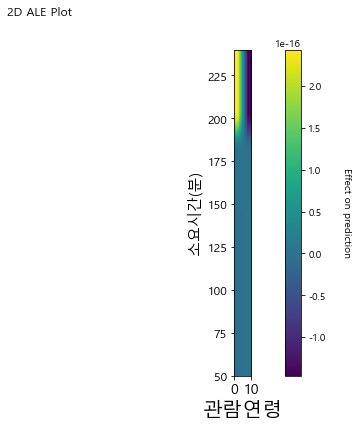

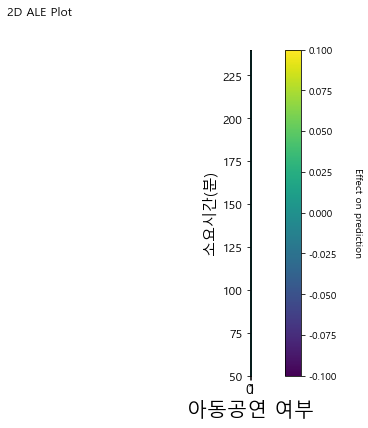

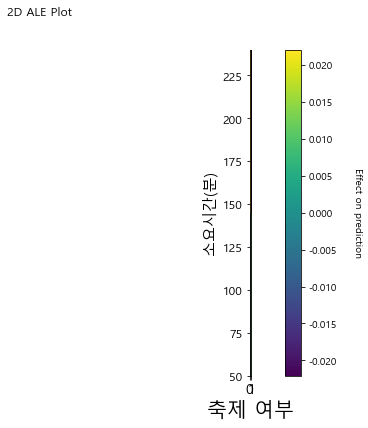

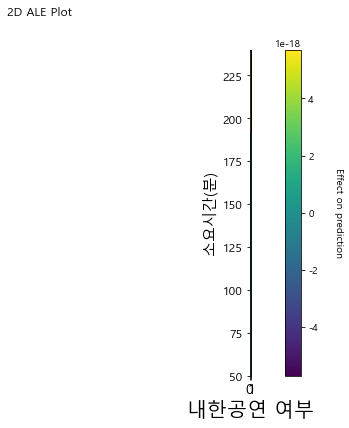

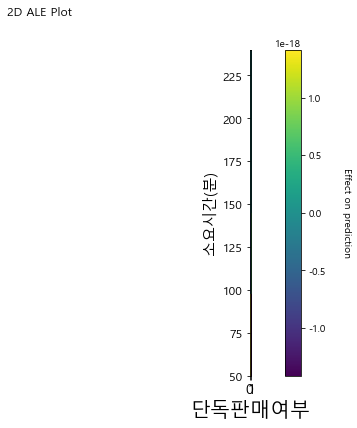

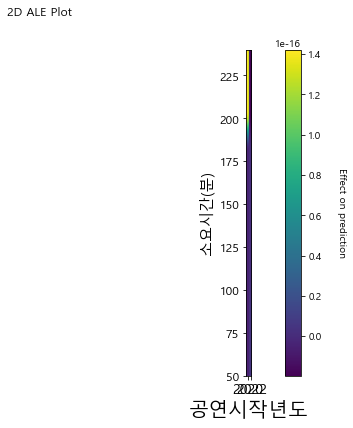

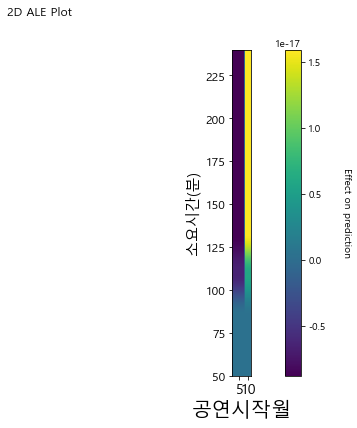

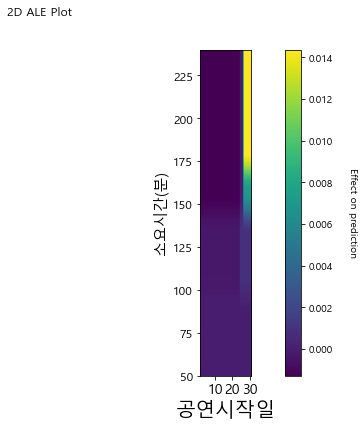

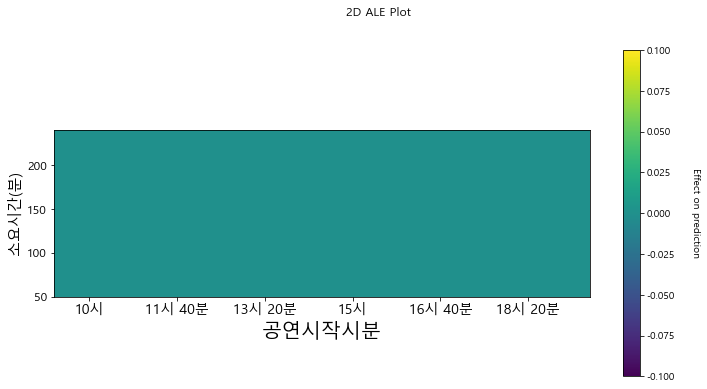

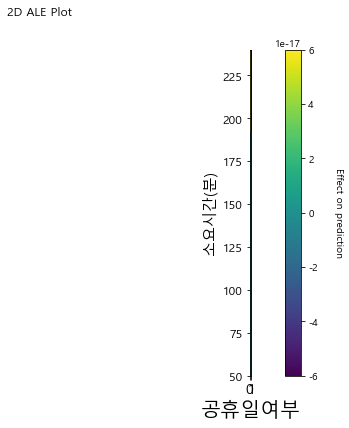

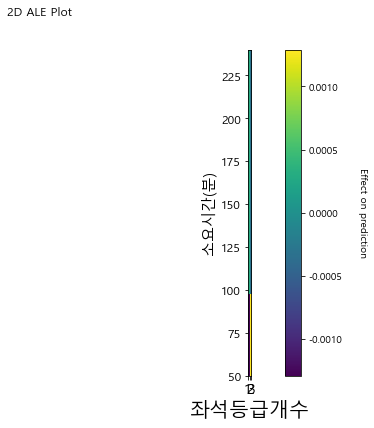

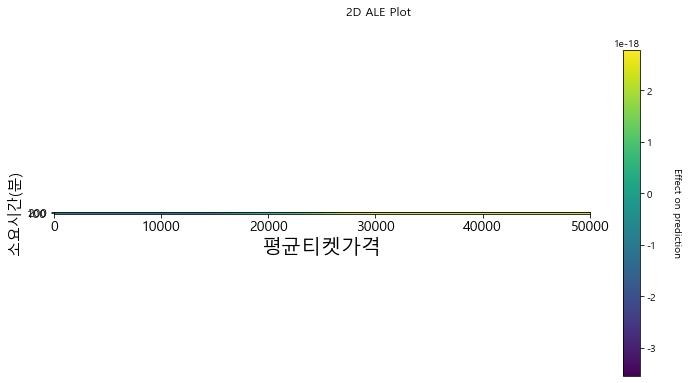

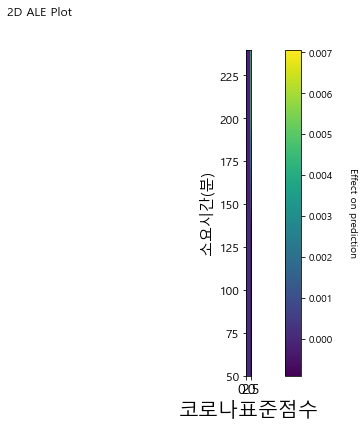

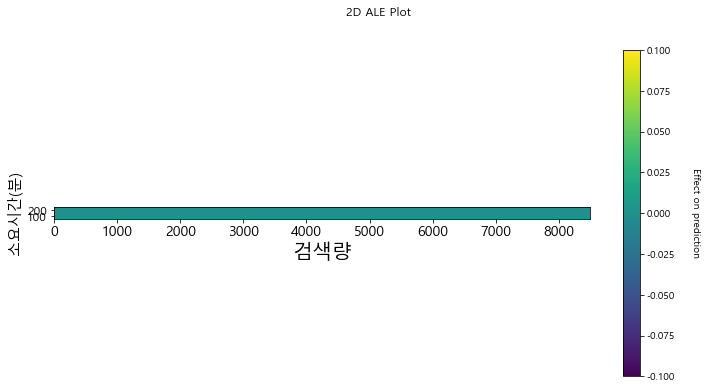

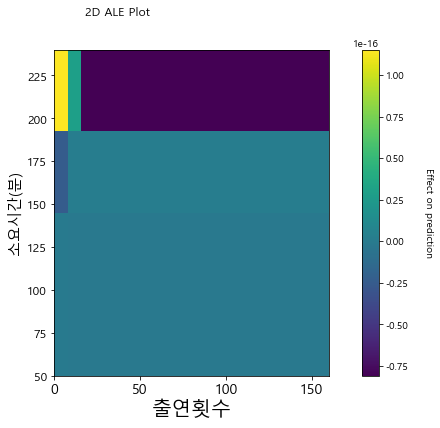

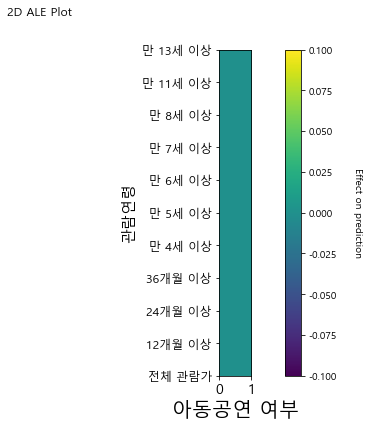

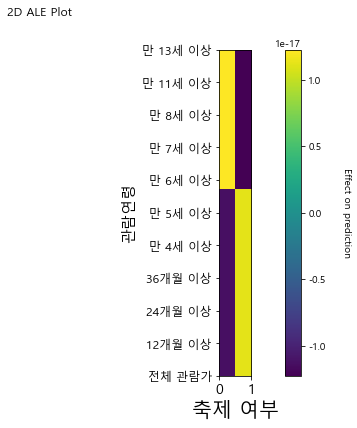

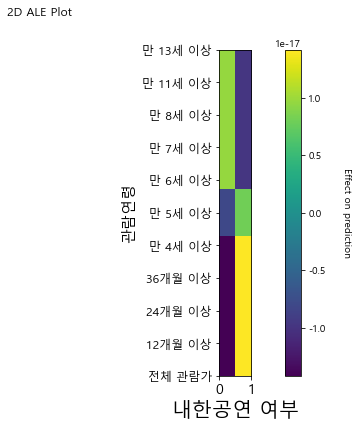

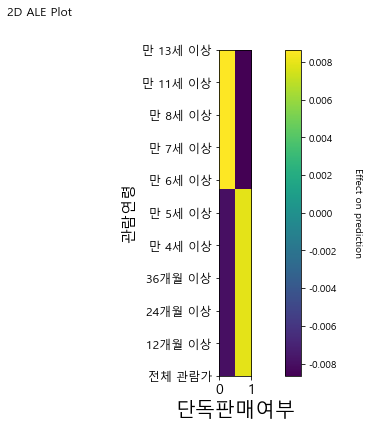

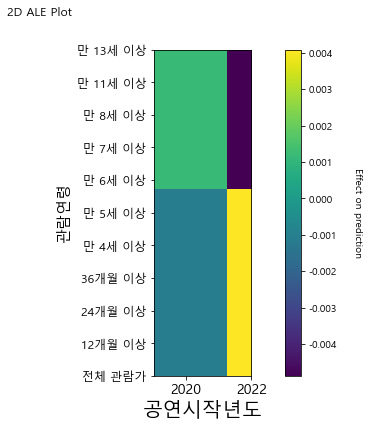

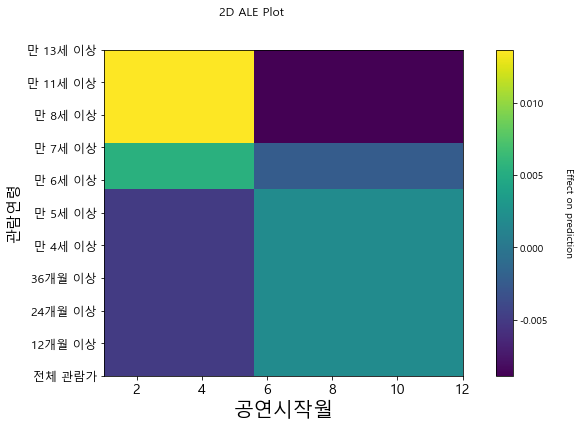

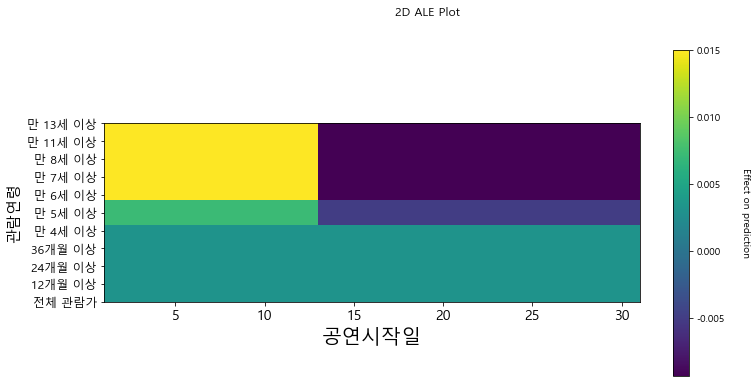

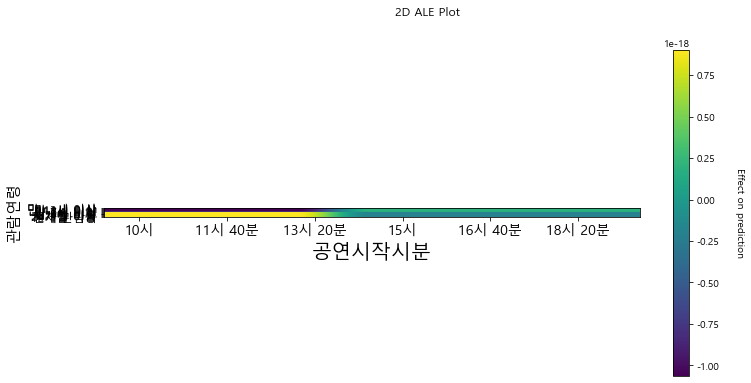

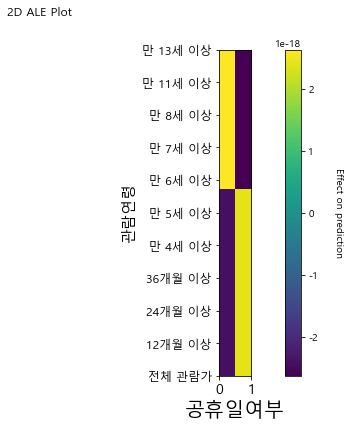

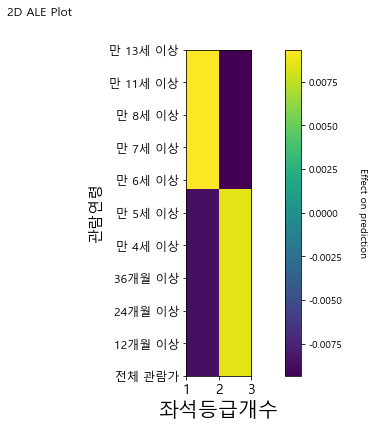

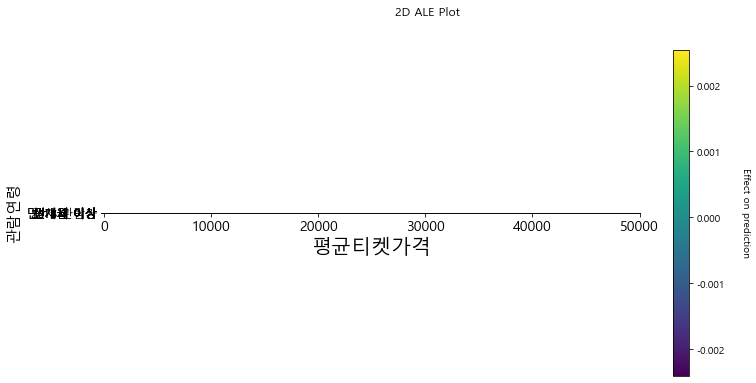

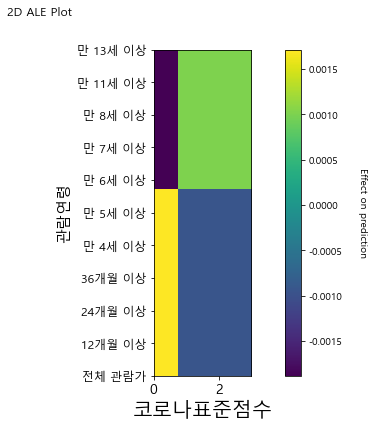

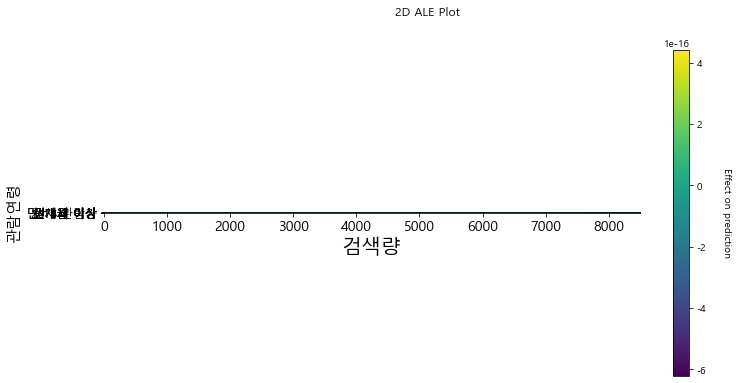

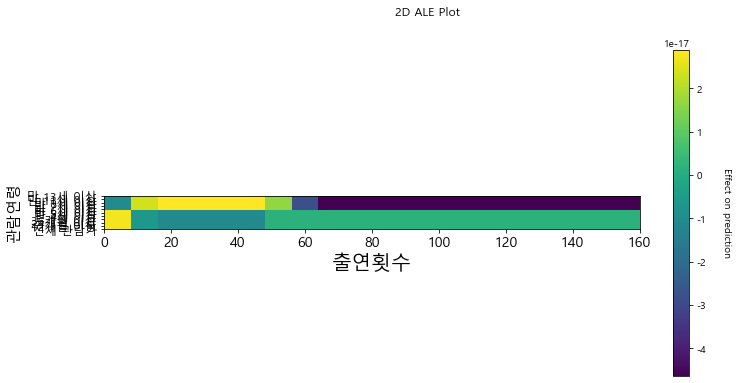

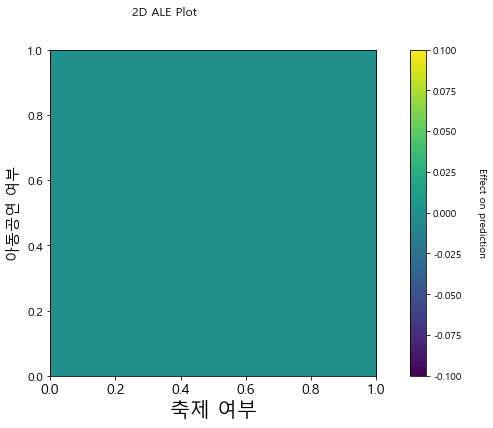

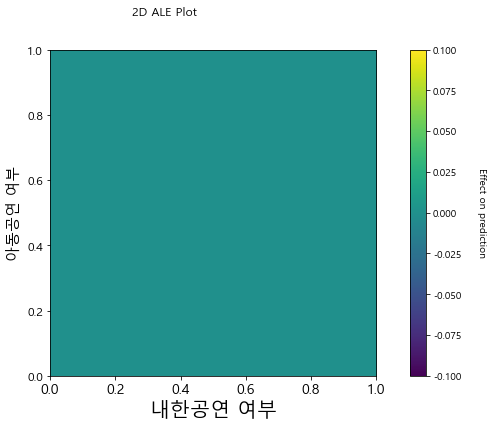

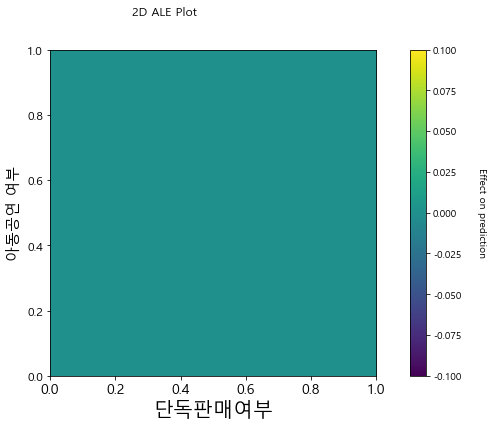

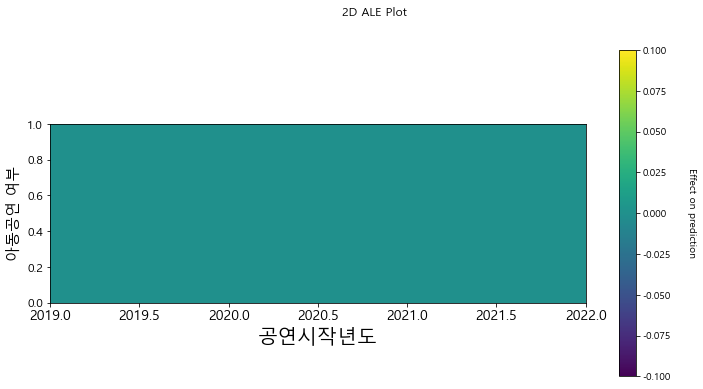

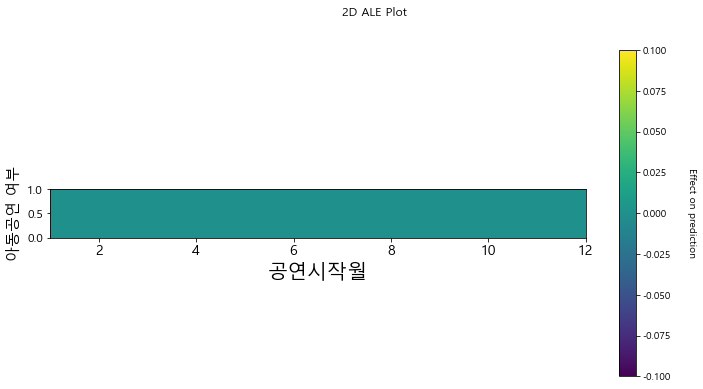

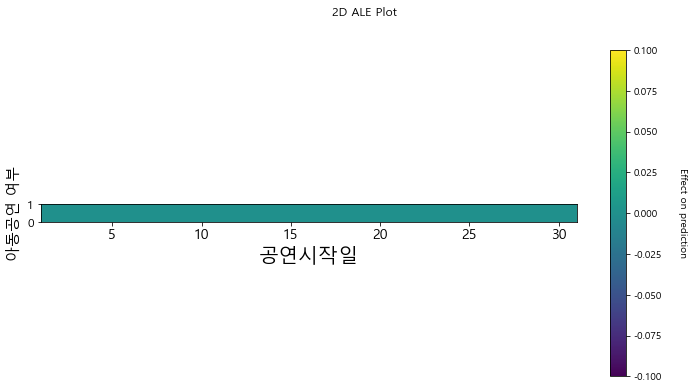

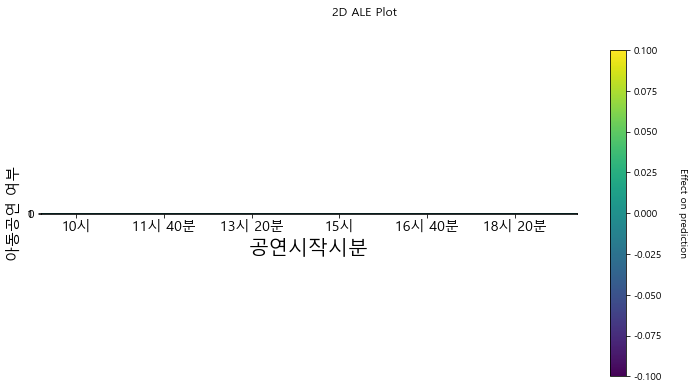

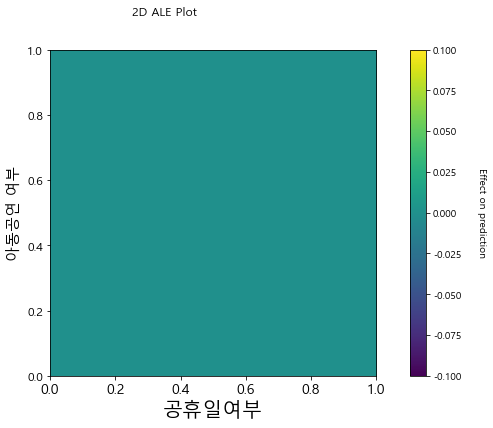

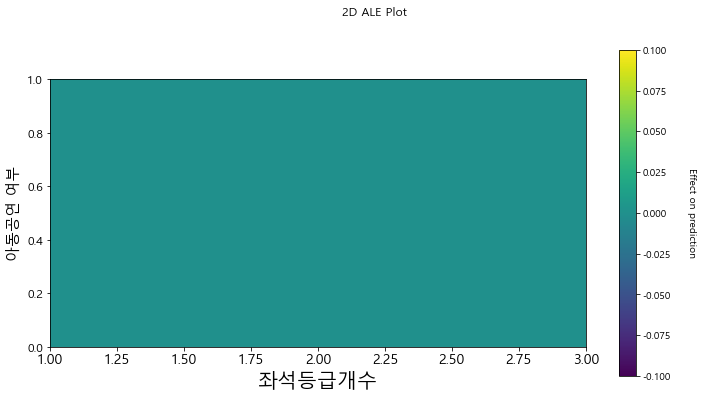

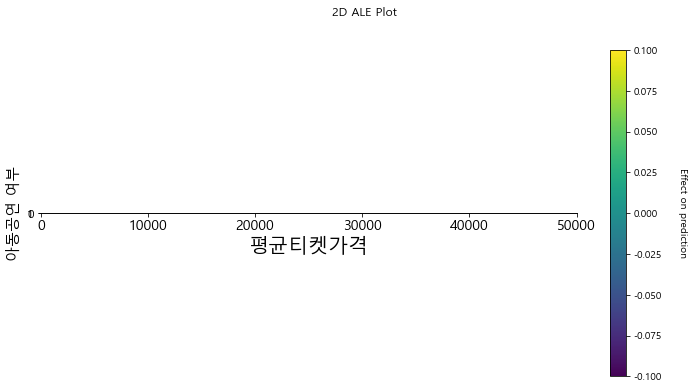

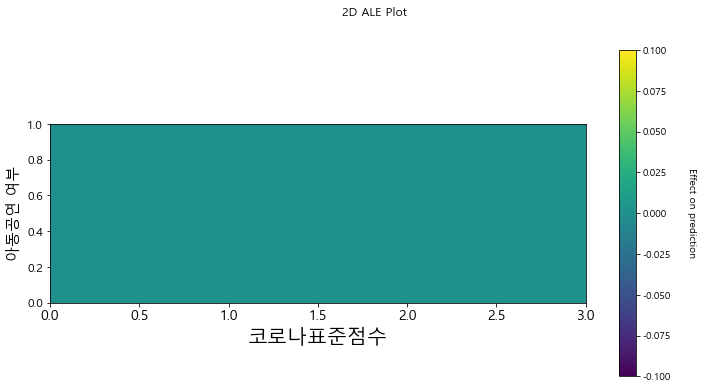

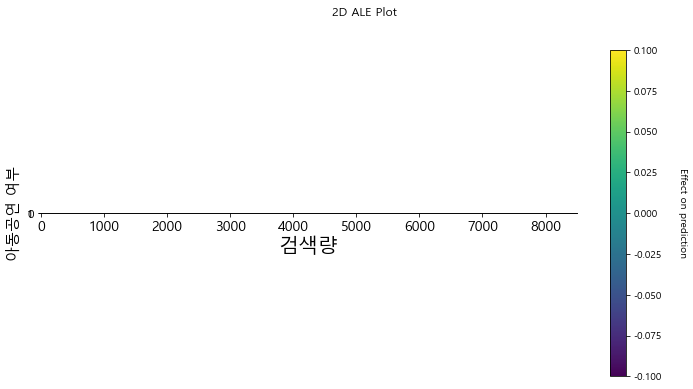

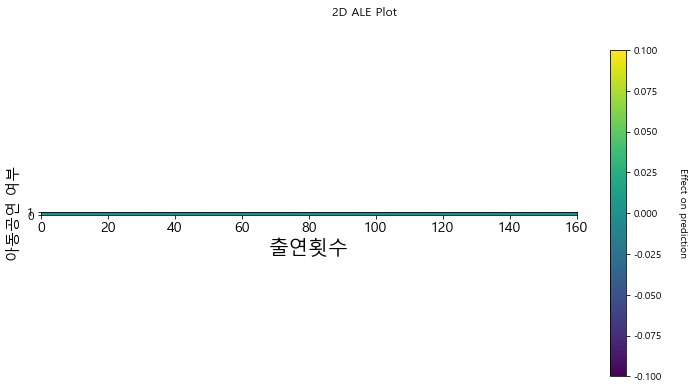

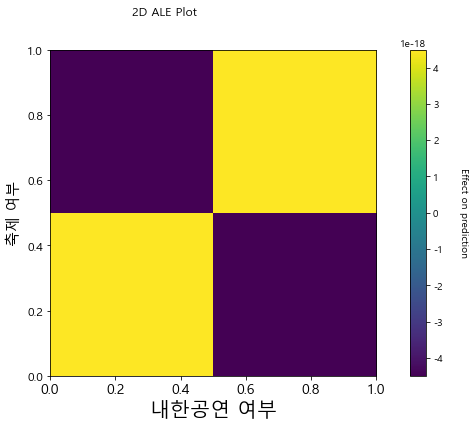

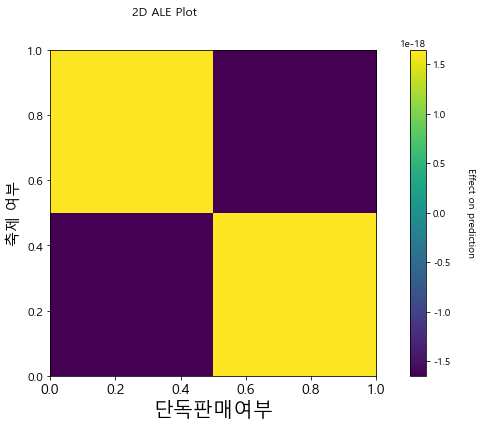

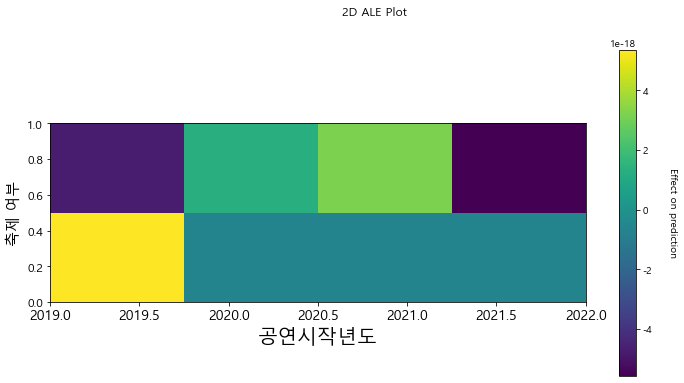

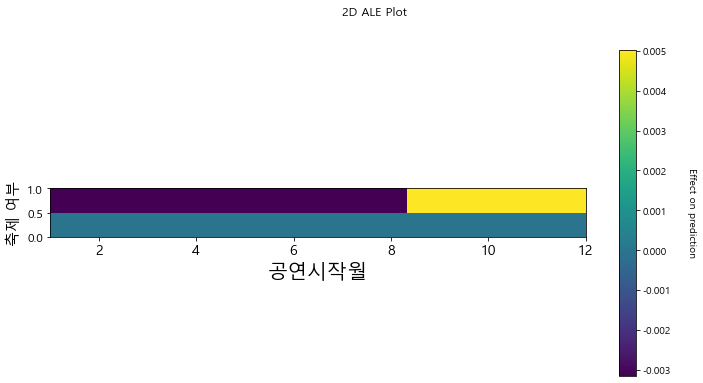

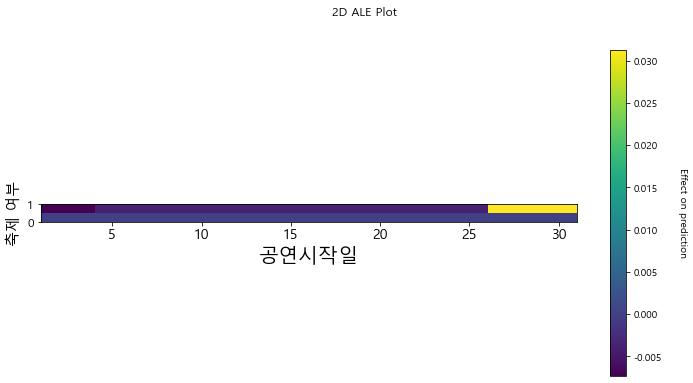

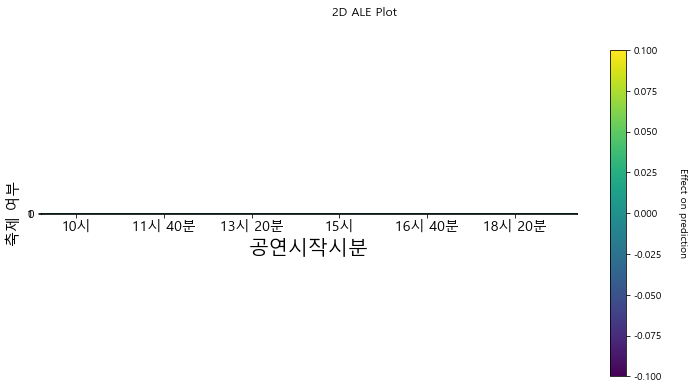

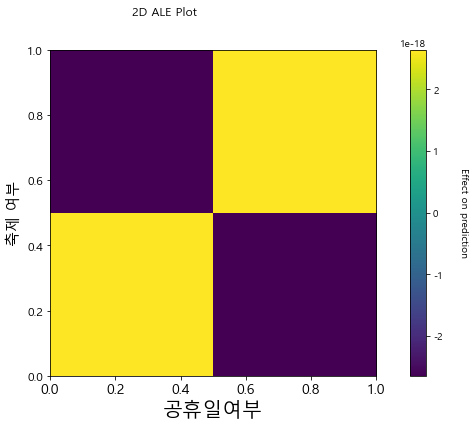

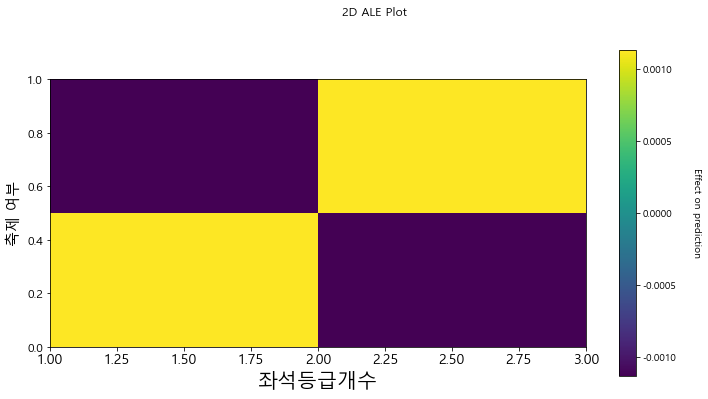

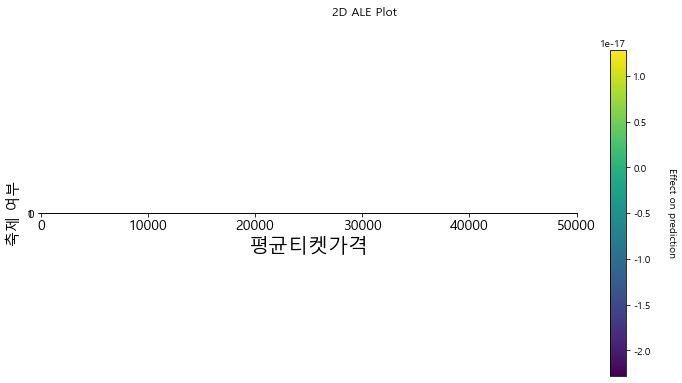

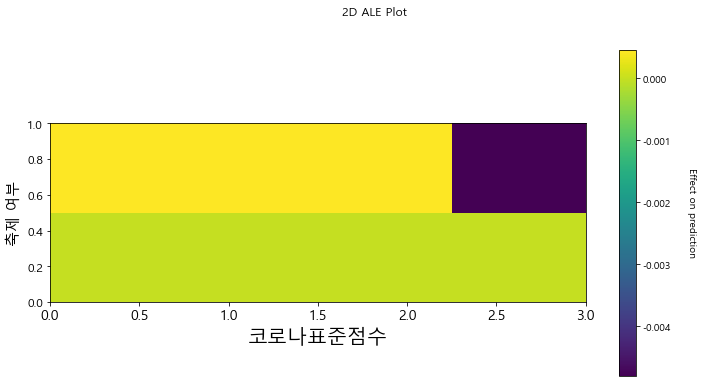

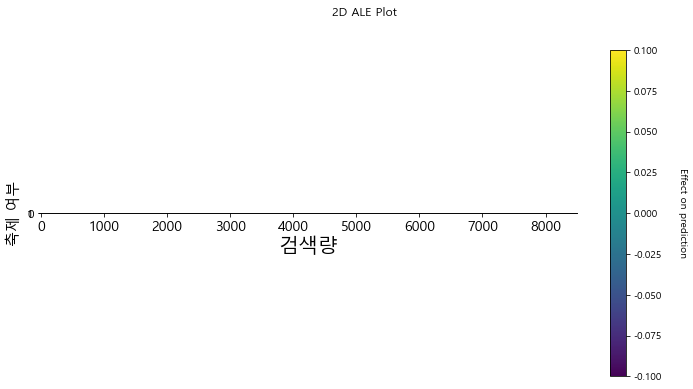

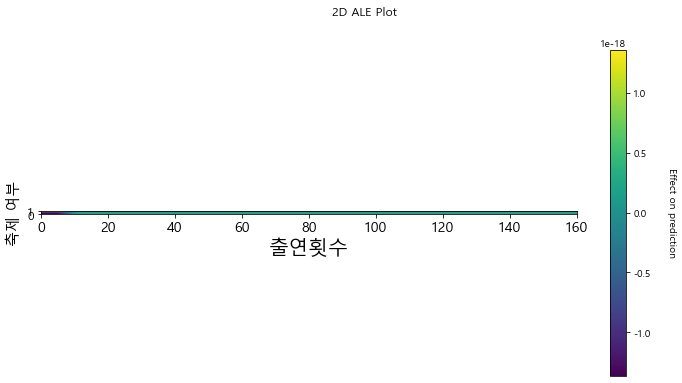

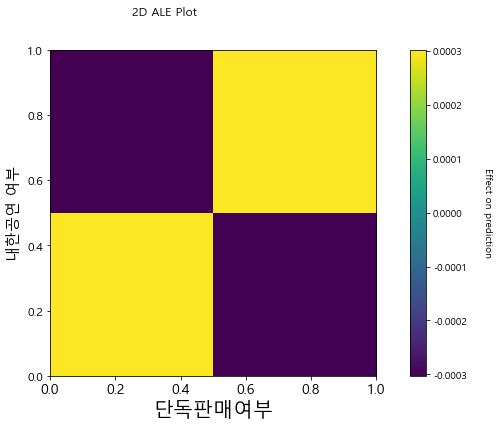

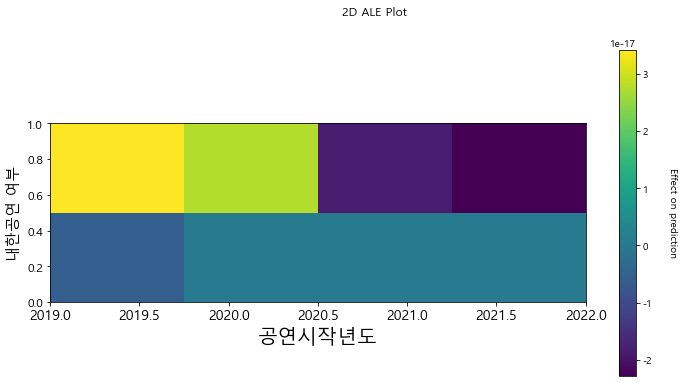

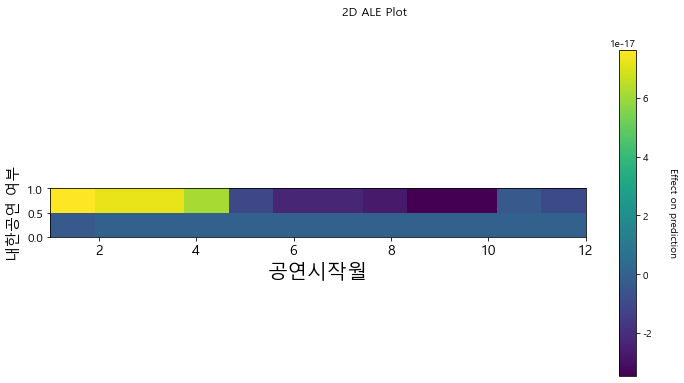

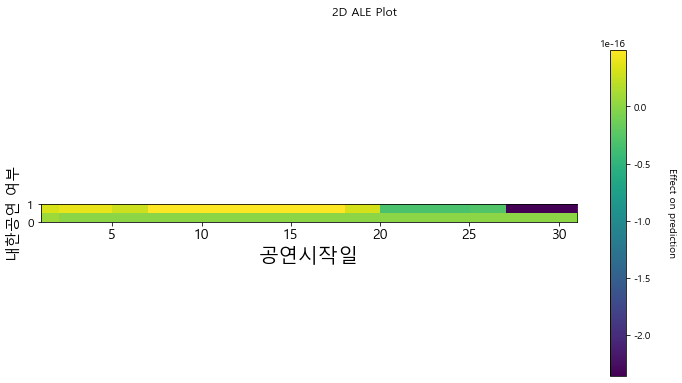

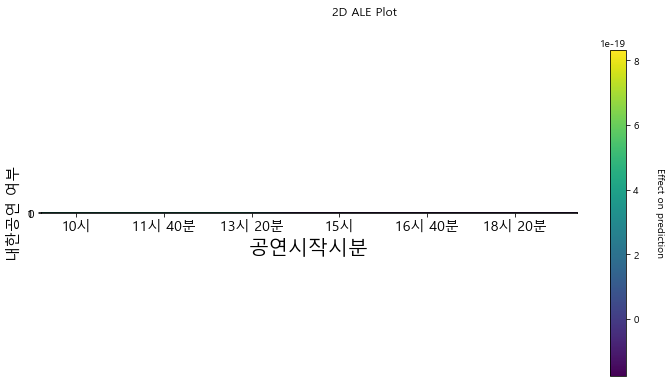

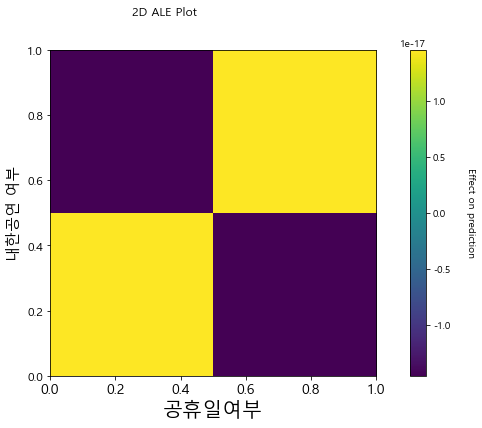

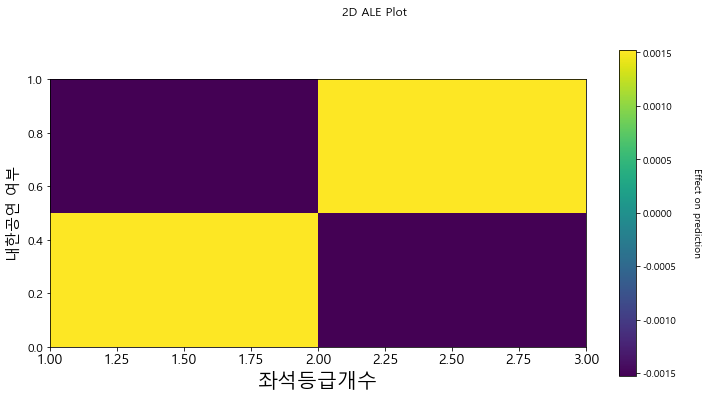

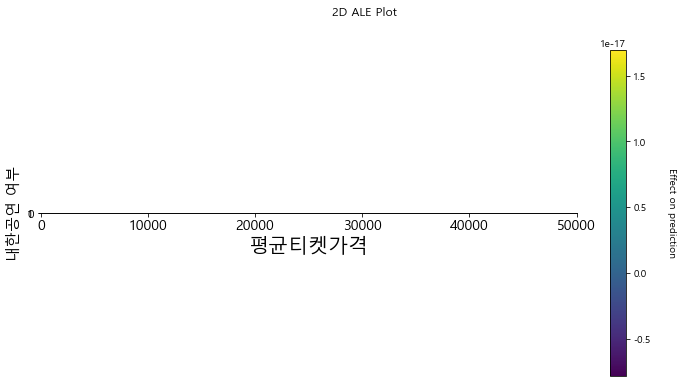

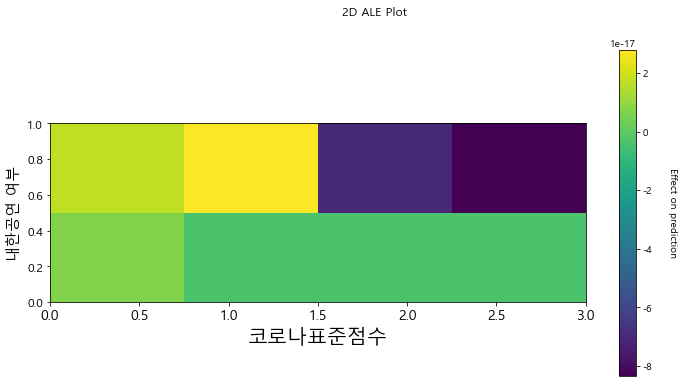

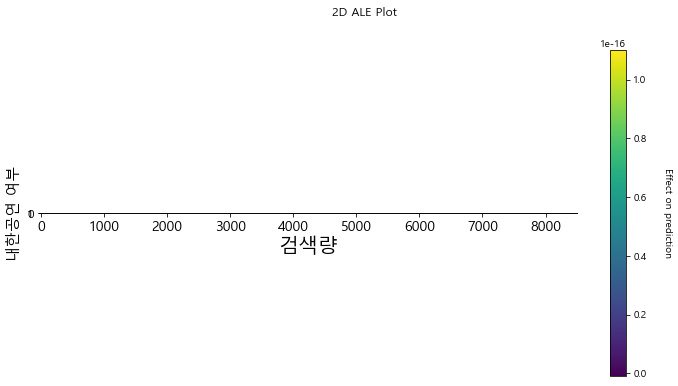

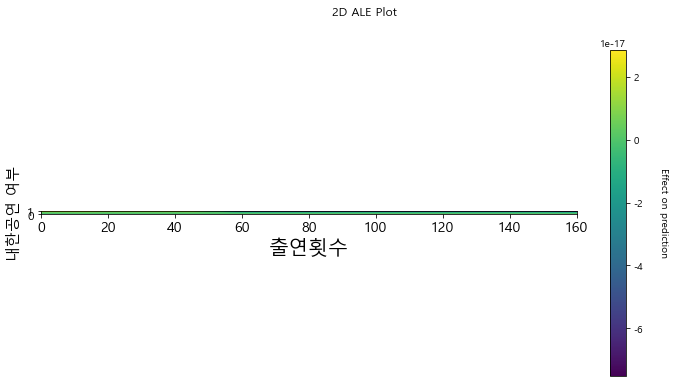

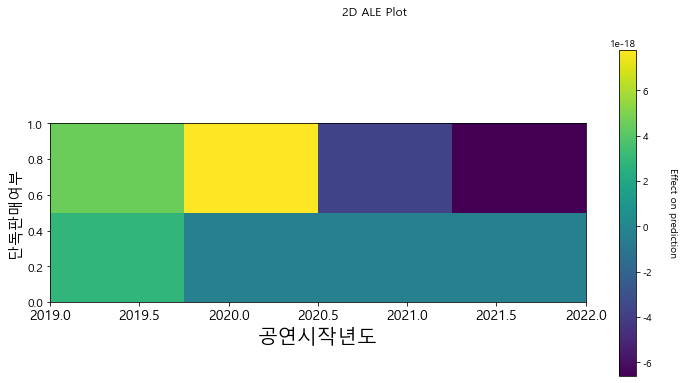

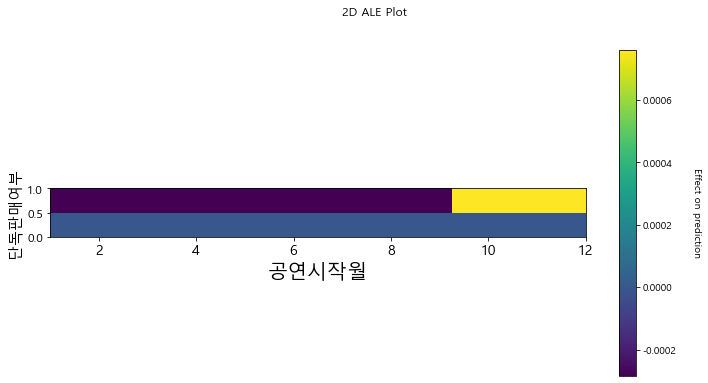

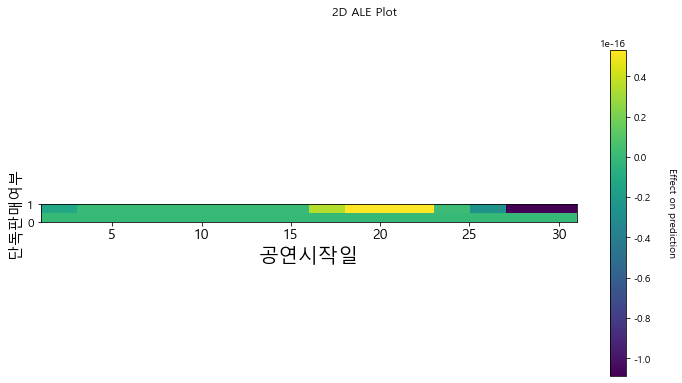

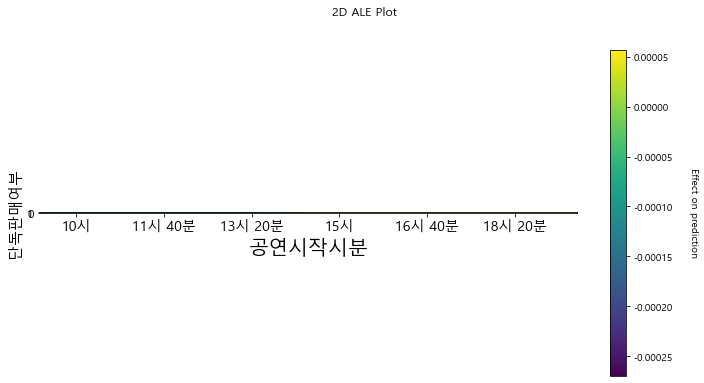

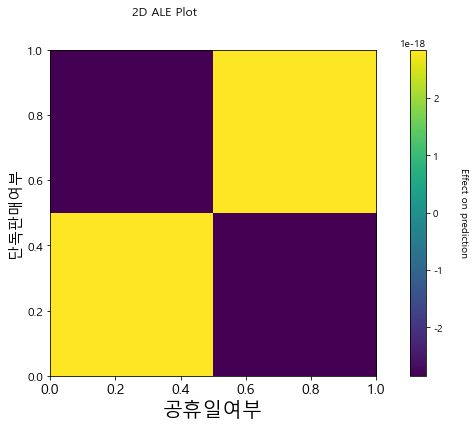

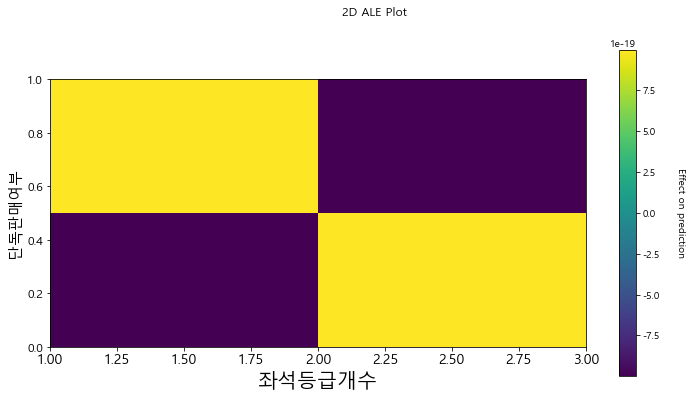

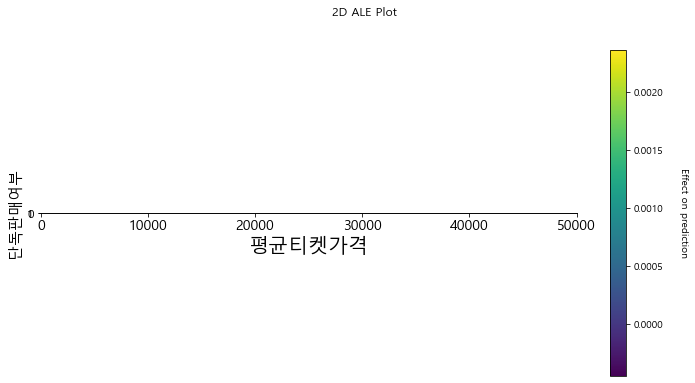

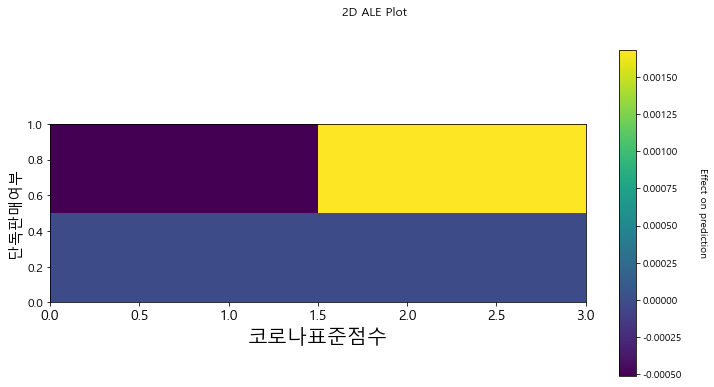

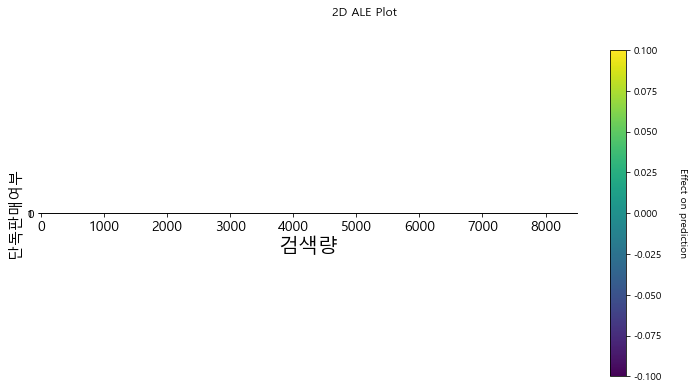

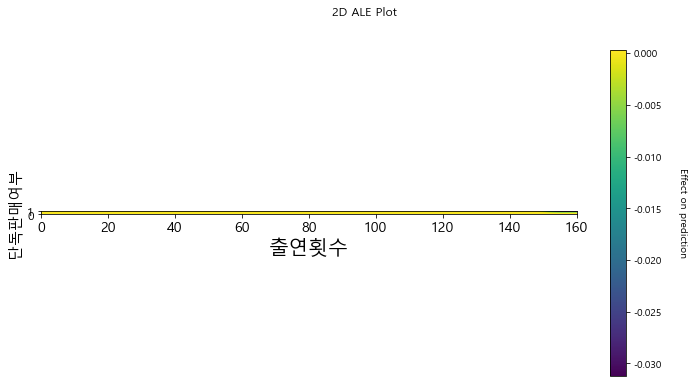

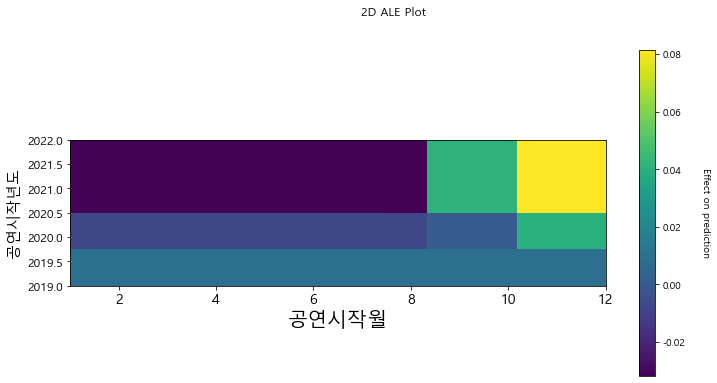

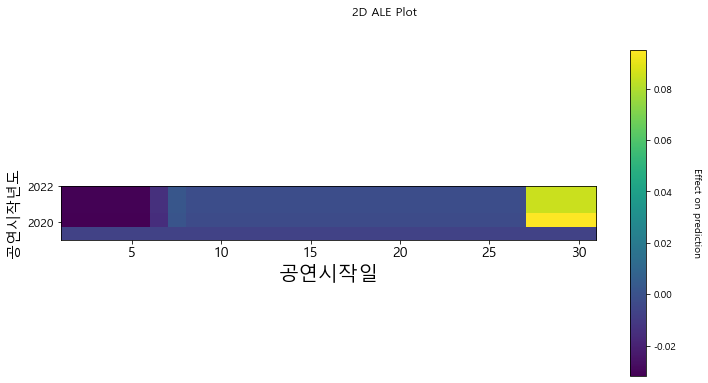

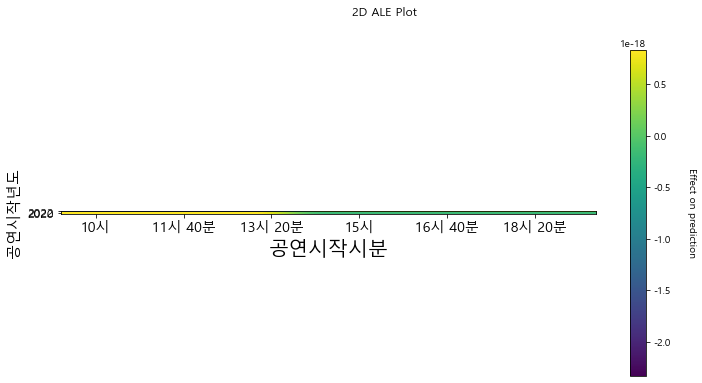

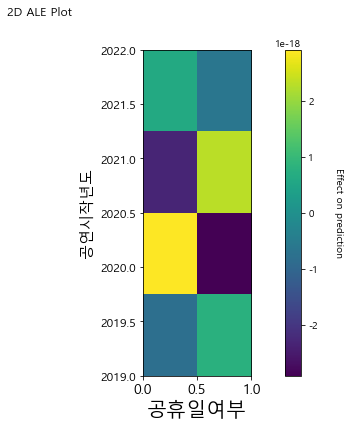

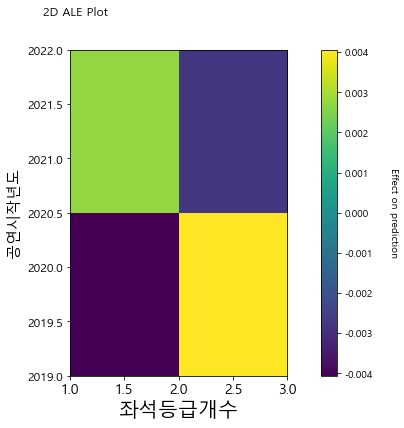

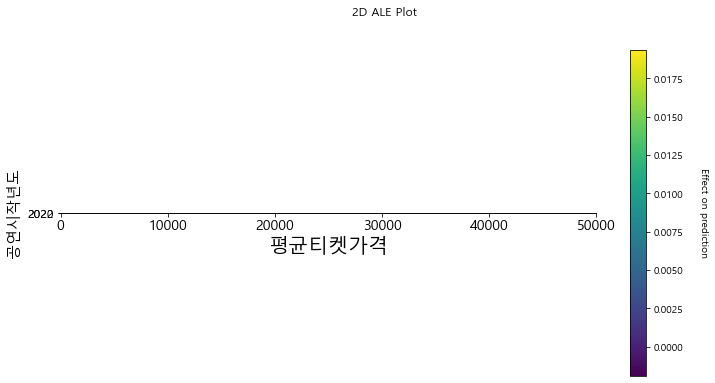

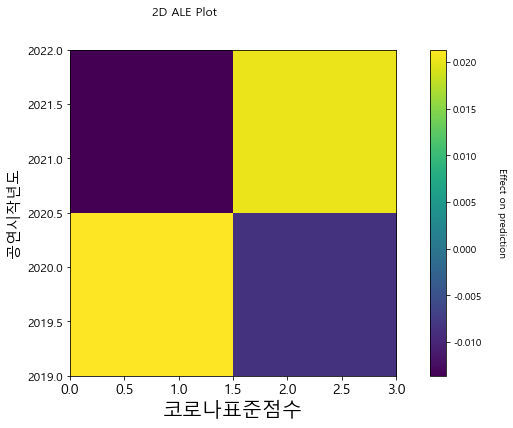

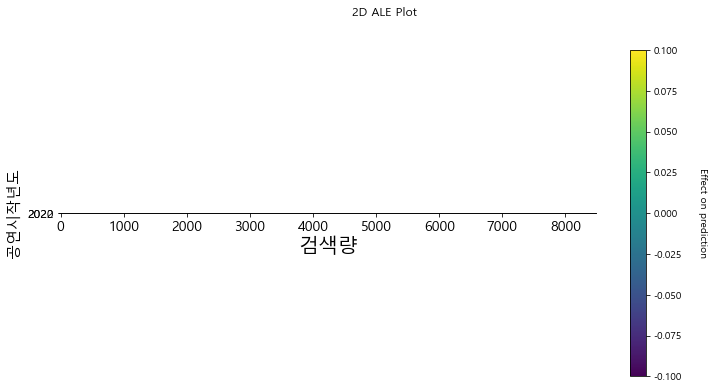

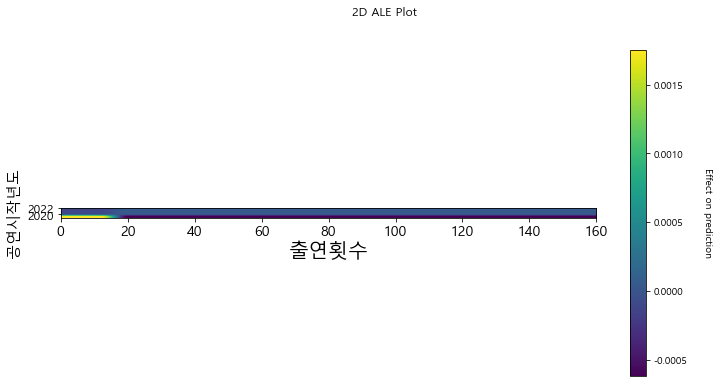

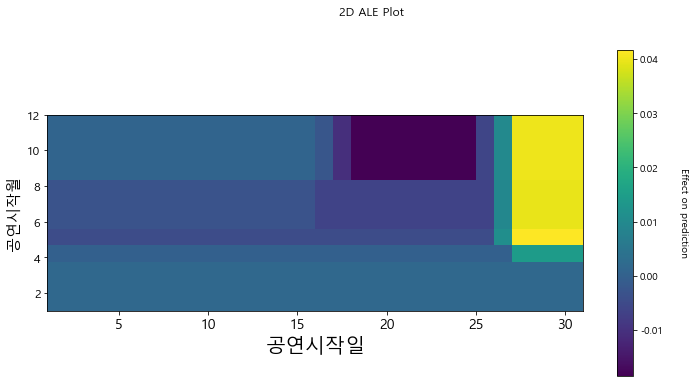

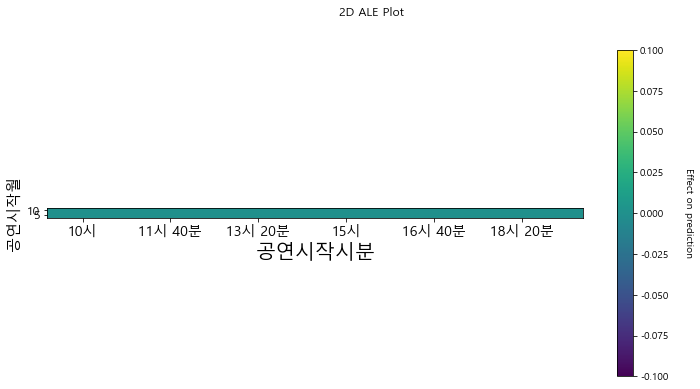

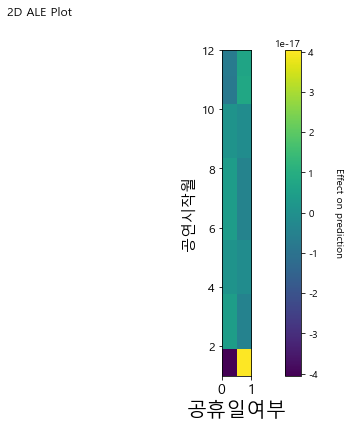

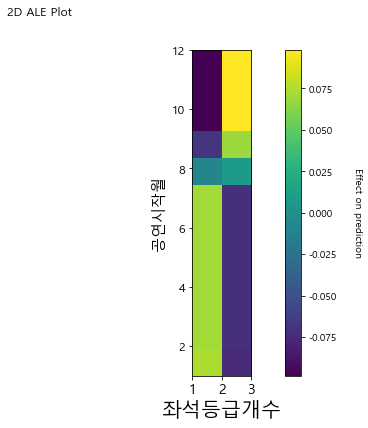

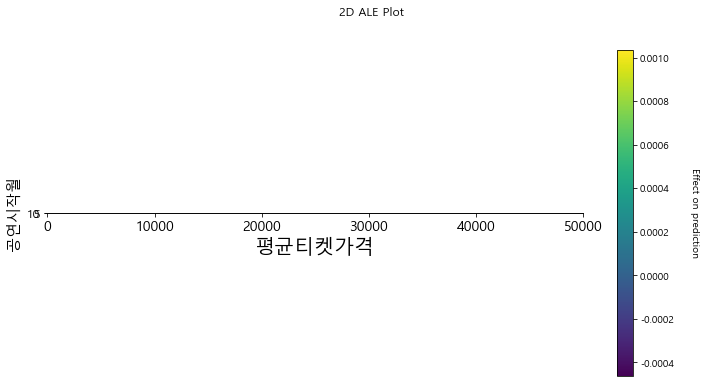

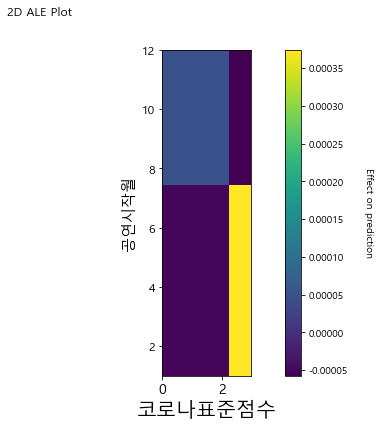

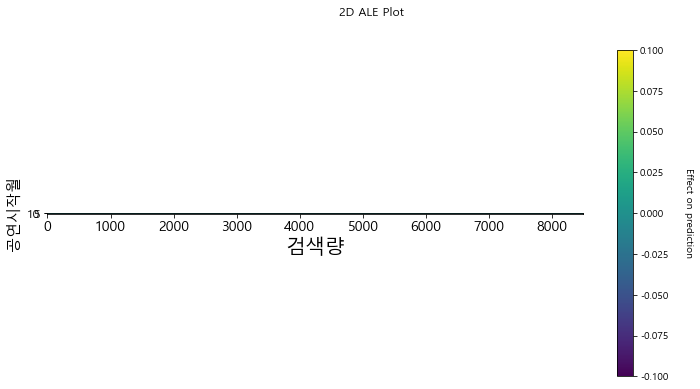

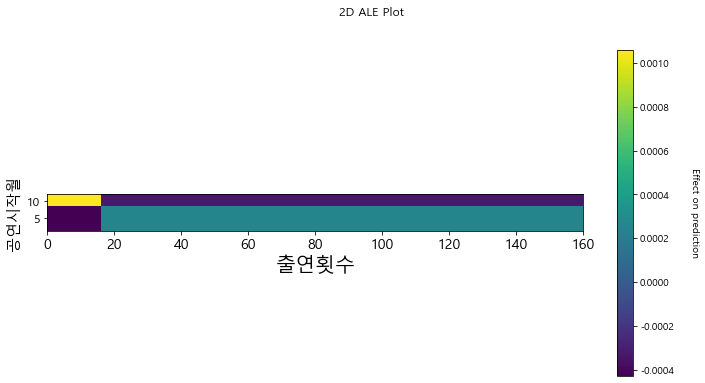

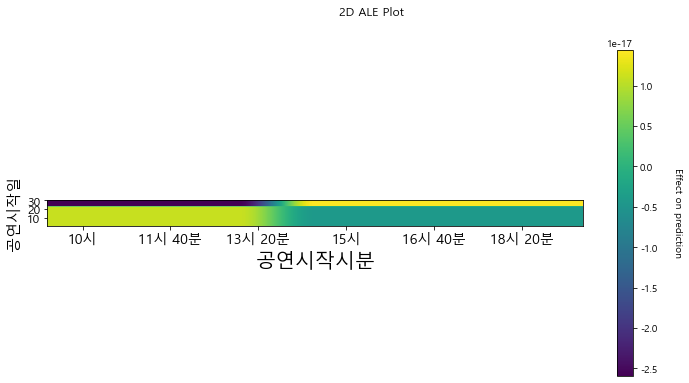

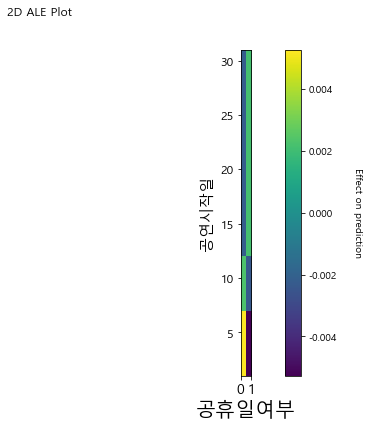

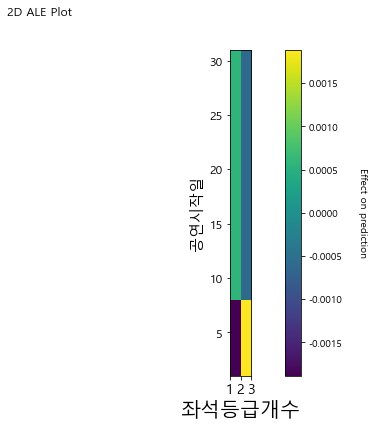

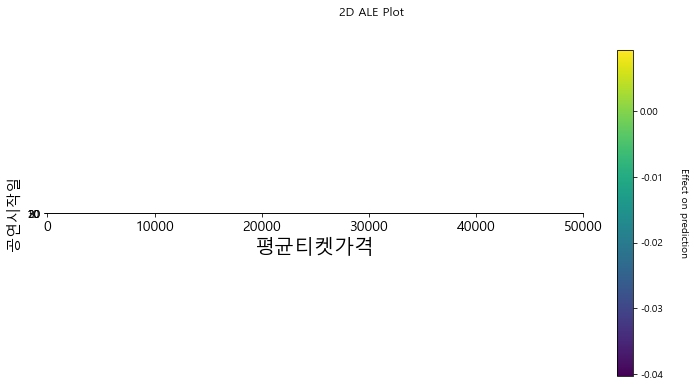

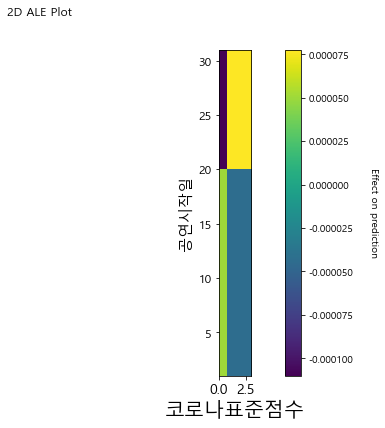

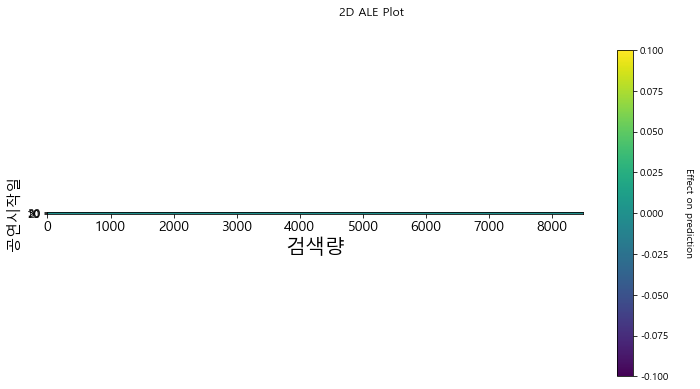

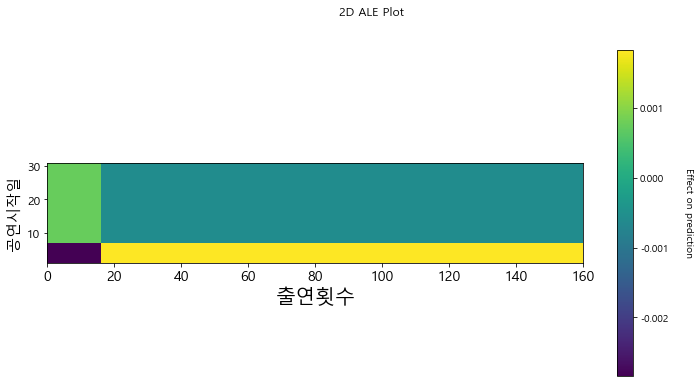

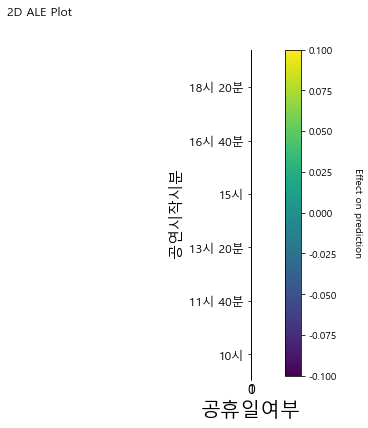

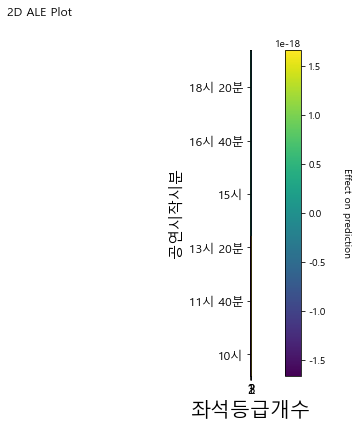

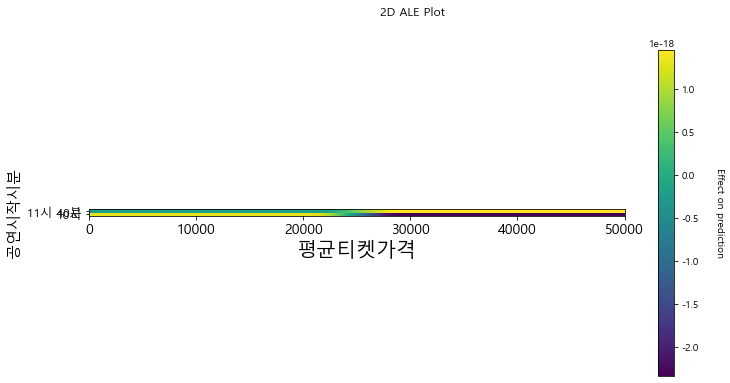

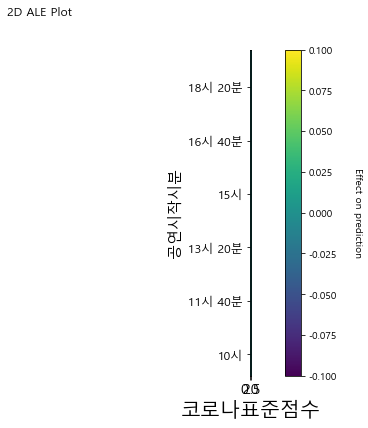

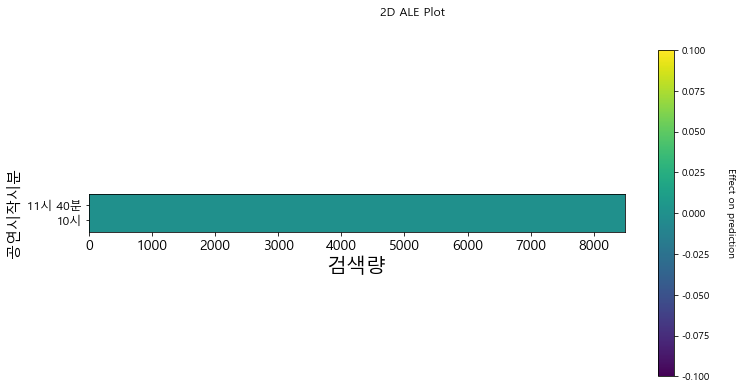

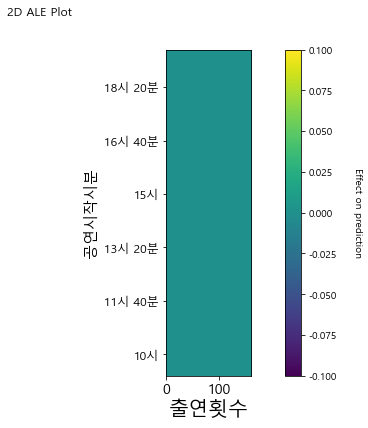

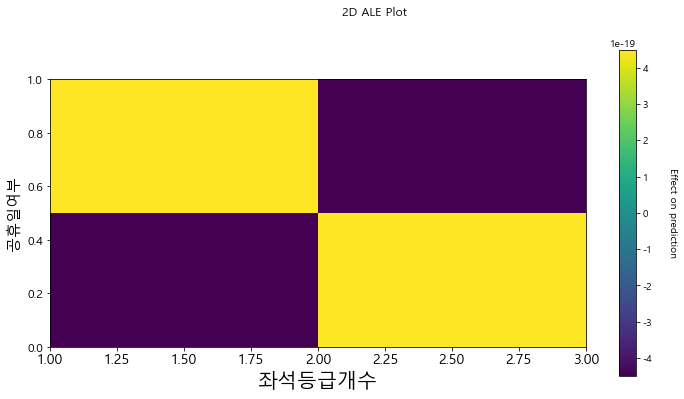

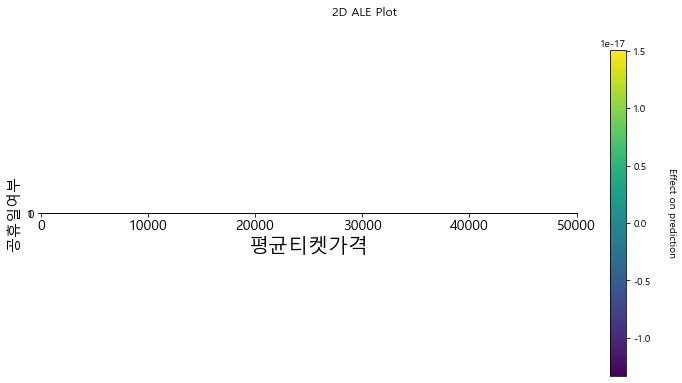

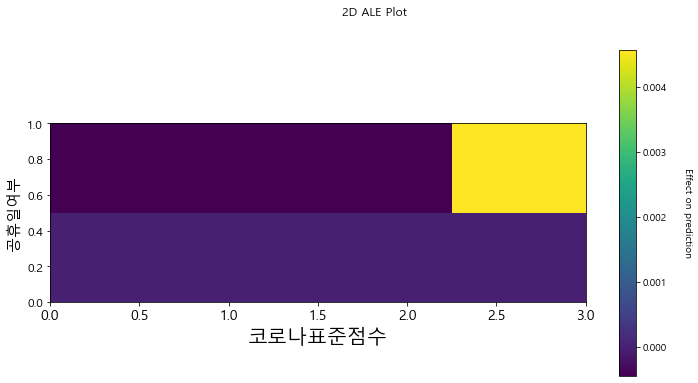

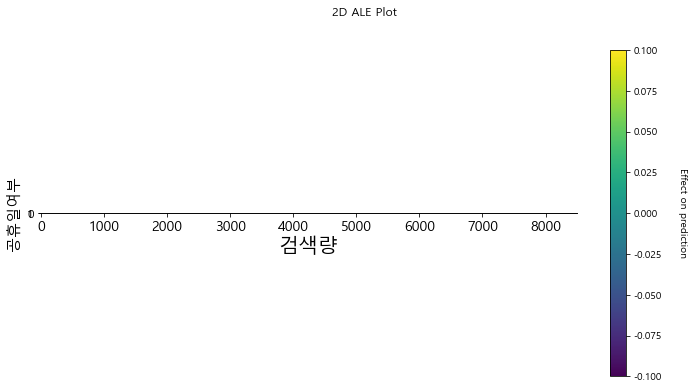

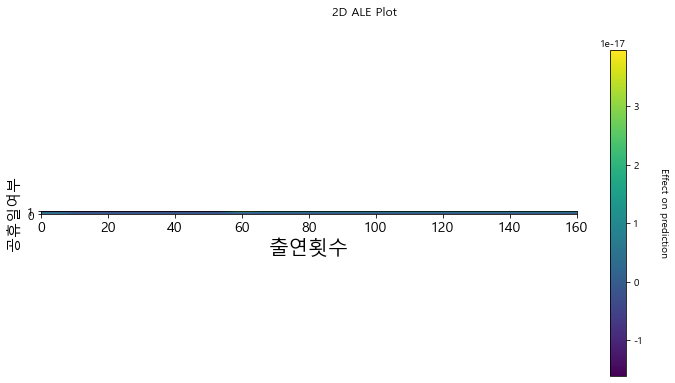

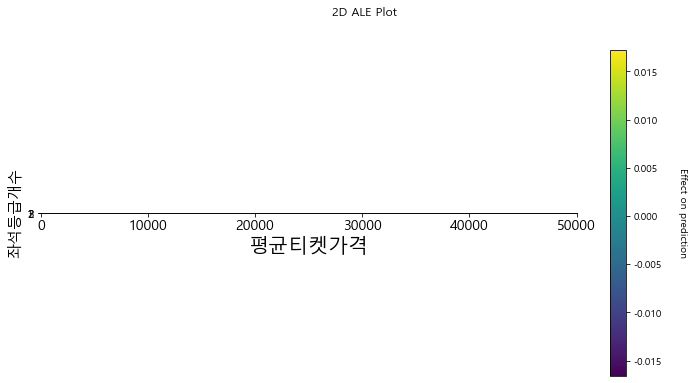

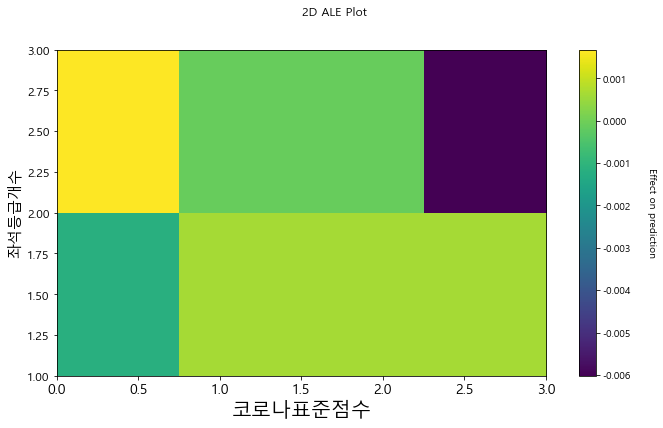

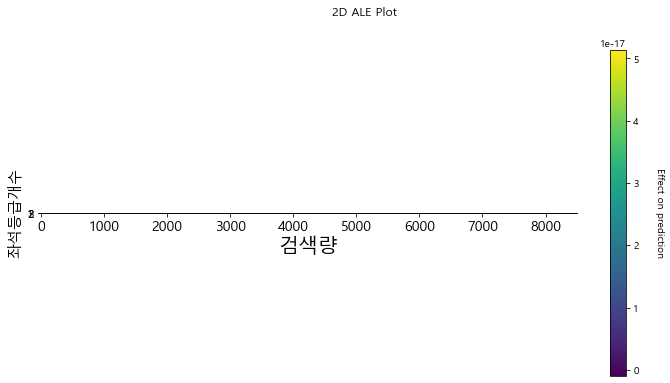

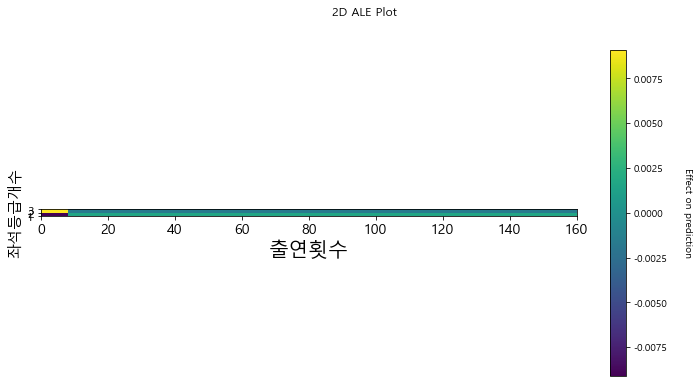

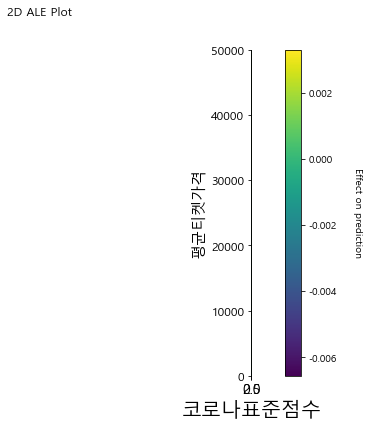

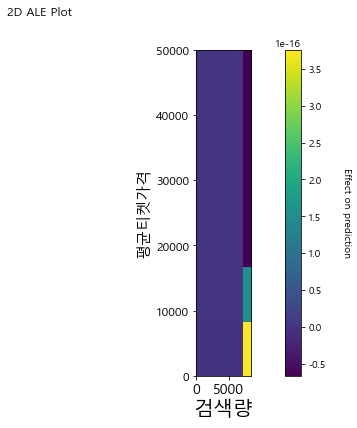

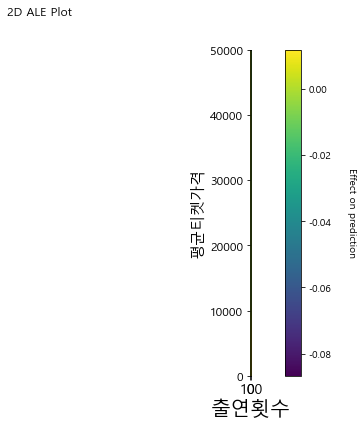

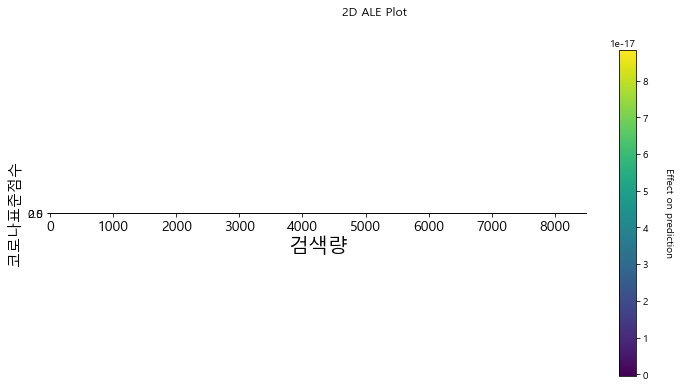

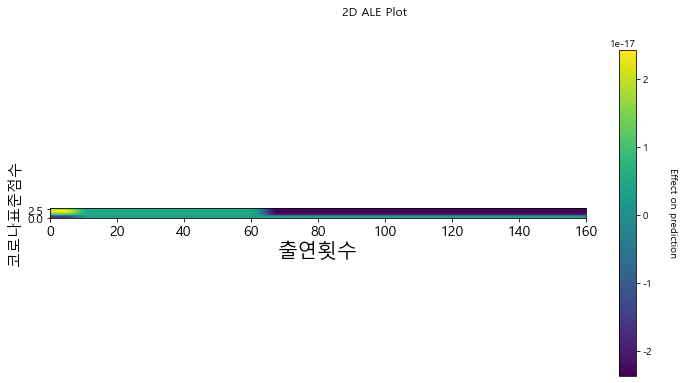

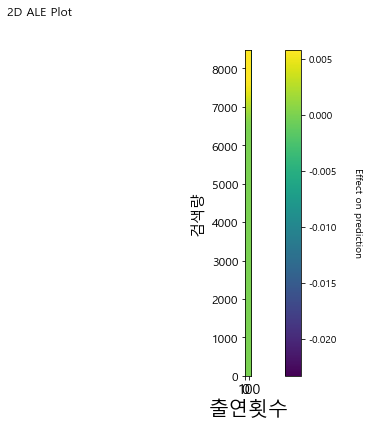

In [38]:
label_mapping = {'전체 관람가':0, '12개월 이상': 1, '24개월 이상':2, '36개월 이상':3, '48개월 이상':4, '만 4세 이상':4, '만 5세 이상':5, 
            '만 6세 이상':6, '만 7세 이상':7, '만 8세 이상':8, '만 11세 이상':9, '만 13세 이상': 10}
reverse_mapping = {v: k for k, v in label_mapping.items()}

for combo in combinations(lst, 2):
    fig, ax = plt.subplots(figsize=(12, 6))  # 여기서 figsize를 변경하여 그림의 크기를 조절합니다.
    
    ale_eff = ale(
        X=data,
        model=loaded_model,
        feature=[combo[0], combo[1]],
        grid_size=50,
        plot=True,
        fig=fig,
        ax=ax
    )
    if combo[0] == '관람연령':
        ax.set_yticks(list(reverse_mapping.keys()))
        ax.set_yticklabels(list(reverse_mapping.values()), fontsize=12)
    if combo[0] == '공연시작시분':
        values = ax.get_yticks().astype(int)
        hours = values // 60
        minutes = values % 60
        time_labels = [f"{h}시 {m}분" if m != 0 else f"{h}시" for h, m in zip(hours, minutes)]
        ax.set_yticklabels(time_labels, fontsize=12)

    if combo[1] == '공연시작시분':
        values = ax.get_xticks().astype(int)
        hours = values // 60
        minutes = values % 60
        time_labels = [f"{h}시 {m}분" if m != 0 else f"{h}시" for h, m in zip(hours, minutes)]
        ax.set_xticklabels(time_labels, fontsize=12)

    if combo[1] == '소요시간':
        ax.set_xlabel('소요시간(분)', fontsize=20)
        
    if combo[0] == '소요시간':
        ax.set_ylabel('소요시간(분)', fontsize=17)
        
        # x축 라벨의 글꼴 크기 변경
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(15)
    
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=12)
    
    plt.show()  # 각 플롯을 별도로 보려면 이 코드를 사용하세요.
    
    fig.savefig(f'../plots/대구콘서트하우스/ale_plot_2D_x({combo[1]})_y({combo[0]}).jpg', dpi=300, format='jpg', bbox_inches='tight')